# (Ax = b) | xi > 0

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import os, pickle, random
from sklearn.cluster import KMeans
from scipy.sparse import rand
import scipy
from scipy.optimize import lsq_linear
import matplotlib.pyplot as plt

### Pulling data subset and cleaning

In [ ]:
data = pickle.load(open( "data2007.pickle", "rb" ))[-500:]
data = data # subset
data = data.clip(upper=.05) # bounding single day gain
data = data.clip(lower=-.05) # bounding single day loss
data = data.replace([np.inf, -np.inf], np.nan) # removing any inf value
data = data.dropna(axis='columns') # dropping any columns with nan

for x in list(data): # removing columns without starting data
    if data.iloc[0][x] == 0 and data.iloc[1][x] == 0  and data.iloc[1][x] == 0:
        data = data.drop(x,axis=1)

In [ ]:
'''# taking 30 moving averages (probably inefficient method)
# emphesizes large ups/downs

roll = pd.DataFrame(columns=list(data))
for i in range(6,len(data)-6):
    roll.loc[i] = [np.nanmean([(1+y)**1 for y in list(data[x][i-0:i+1])]) for x in (list(data))]
roll.head()'''

In [ ]:
roll = data + 1

### Useful functions!

In [2]:
# Ensures all stock have the same variance (while maintaning form)

def fixvar(vals):
    Dval = 0.000001*len(vals)
    var = np.nanvar(vals)
    ratio = (Dval/var)**.5
    mean = np.nanmean(vals)
    transformed = [(x-mean)*ratio + mean for x in vals]
    return(transformed)

### Let the transformation begin...

In [ ]:
tickers = list(roll)

# applying fixvar to all stocks
rollvar = pd.DataFrame()
for x in tickers:
    rollvar[x] = fixvar(list(roll[x]))

plt.figure(figsize=(12,8))
plt.plot(list(rollvar['AAPL']),color='blue',linestyle=':')
plt.plot(list(roll['AAPL']),color='blue')
plt.plot(list(rollvar['GLD']),color='green',linestyle= ':')
plt.plot(list(roll['GLD']),color='green')

In [ ]:
A = np.array(rollvar)
A[np.isnan(A)]=1
b = np.array([len(A[0]) for i in range(len(rollvar))])

vals = np.array(scipy.optimize.nnls(A, b)[0])
v = [x/len(list(roll)) for x in np.dot(A,vals)]

In [ ]:
weights = pd.DataFrame()
weights['Stock'] = list(rollvar)
weights['Weight'] = vals
weights = weights.sort_values(by='Weight',ascending=False)

weights = weights[weights['Weight'] > 0]
weights.head(len(weights))

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(v,linewidth=5, linestyle="-",c='black')
k = 0
for s in np.array(list(weights['Stock'])):
    #print(vals[list(roll).index(s)])
    plt.plot(list(rollvar[s]),linewidth=vals[list(rollvar).index(s)]/20,linestyle='-',alpha=.25,c='blue')
    k += 1
plt.show()

plt.figure(figsize=(12,8))
plt.plot(list(rollvar['SPY']),color='blue',label='SPY')
plt.plot(list(v),color='black',linewidth=5,label='Portfolio')
plt.legend()
plt.show()

In [ ]:
test = pickle.load(open( "data2007_real.pickle", "rb" ))[-500:]
test = test.replace(0, np.nan)
test = test.replace([np.inf, -np.inf], np.nan)
test = test.dropna(axis='columns')
dfm = test.apply(lambda x: x/list(x)[0], axis=0)
dfm.head()

In [ ]:
portfolio = pd.DataFrame()
for i in range(len(weights)):
    try:
        portfolio[weights.iloc[i]['Stock']] = [weights.iloc[i]['Weight']*x for x in dfm[weights.iloc[i]['Stock']]]
    except:
        pass
portfolio = portfolio.dropna(axis=0)

In [ ]:
dfm = dfm.clip(upper=5)
dfm = dfm.clip(lower=.2)
evaluation = portfolio.sum(axis=1)
evaluation = [x/evaluation[0] for x in evaluation]

plt.figure(figsize=(15,10))
plt.plot(evaluation,linewidth=5,color='black')
plt.plot(list(dfm.mean(axis=1)),color='blue',linewidth=1)
plt.plot(list(dfm['SPY']),color='g')

2000-01-03 00:00:00 2000-12-27 00:00:00
2000-12-29 00:00:00 2001-02-12 00:00:00
['NEM', 'MNST', 'FLIR', 'HFC', 'PFE', 'PG', 'ANSS', 'AOS', 'BKNG', 'O']


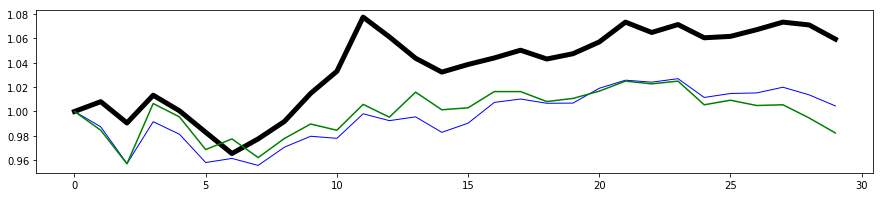

2000-02-01 00:00:00 2001-01-26 00:00:00
2001-01-30 00:00:00 2001-03-13 00:00:00
['NEM', 'MNST', 'PG', 'FLIR', 'KMX', 'ANSS', 'JKHY', 'EIX', 'EXC', 'HOLX']


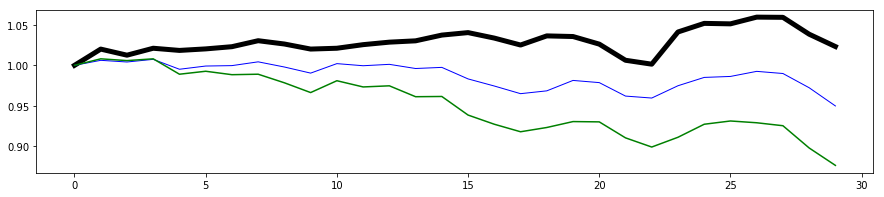

2000-03-01 00:00:00 2001-02-26 00:00:00
2001-02-28 00:00:00 2001-04-10 00:00:00
['PG', 'NEM', 'MNST', 'FLIR', 'KMX', 'HOLX', 'ANSS', 'EXC', 'REG', 'BLK']


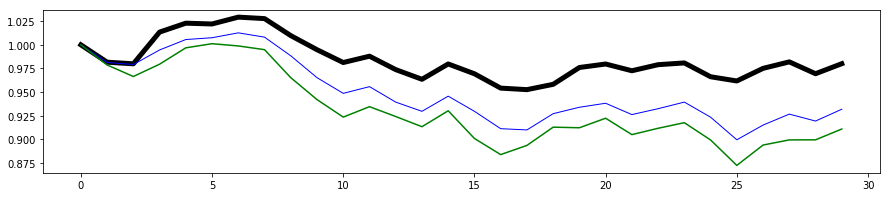

2000-03-29 00:00:00 2001-03-26 00:00:00
2001-03-28 00:00:00 2001-05-09 00:00:00
['MNST', 'NEM', 'FLIR', 'PG', 'ARE', 'ANSS', 'KMX', 'HOLX', 'EXC', 'EIX']


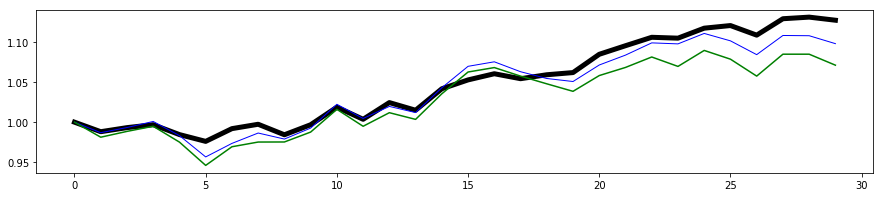

2000-04-27 00:00:00 2001-04-24 00:00:00
2001-04-26 00:00:00 2001-06-07 00:00:00
['NEM', 'ANSS', 'EIX', 'FLIR', 'MNST', 'PG', 'SPGI', 'EXC', 'ARE', 'KMX']


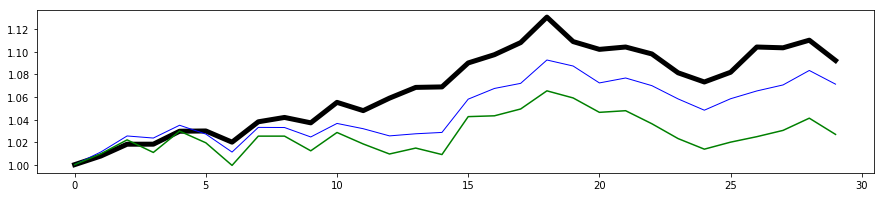

2000-05-25 00:00:00 2001-05-22 00:00:00
2001-05-24 00:00:00 2001-07-06 00:00:00
['EIX', 'ANSS', 'NEM', 'EXC', 'KMX', 'FLIR', 'CTSH', 'VTR', 'PFE', 'MCHP']


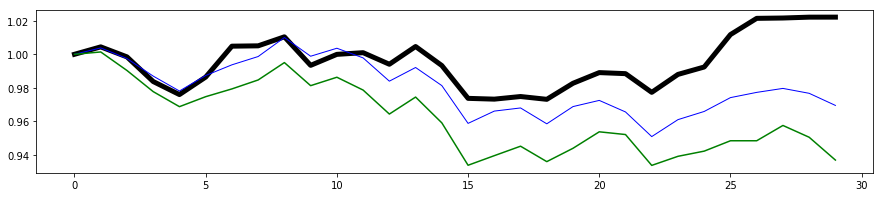

2000-06-23 00:00:00 2001-06-20 00:00:00
2001-06-22 00:00:00 2001-08-03 00:00:00
['ANSS', 'MNST', 'EIX', 'NEM', 'PFE', 'CTSH', 'ARE', 'HOLX', 'KMX', 'FLIR']


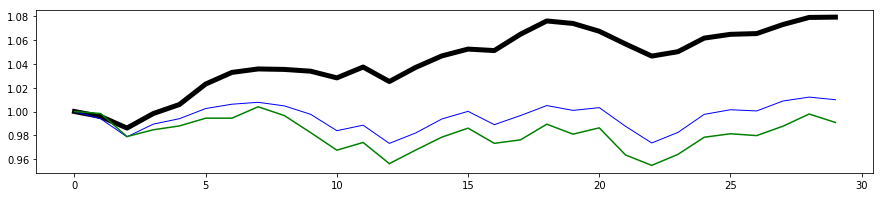

2000-07-24 00:00:00 2001-07-19 00:00:00
2001-07-23 00:00:00 2001-08-31 00:00:00
['MNST', 'EIX', 'EXC', 'ANSS', 'ARE', 'CTSH', 'NEM', 'PFE', 'HOLX', 'CAH']


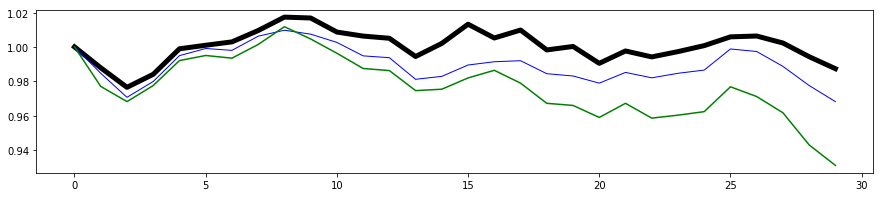

2000-08-21 00:00:00 2001-08-16 00:00:00
2001-08-20 00:00:00 2001-10-05 00:00:00
['NEM', 'MNST', 'KMX', 'EIX', 'ANSS', 'ARE', 'ILMN', 'EXC', 'RTN', 'CTSH']


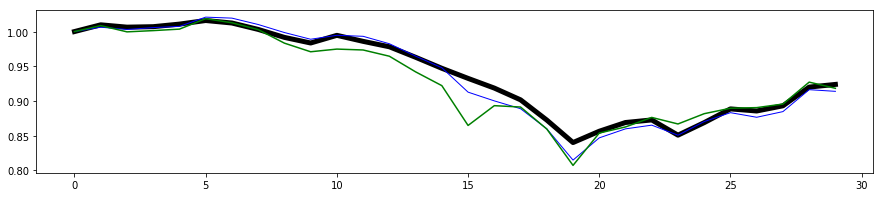

2000-09-19 00:00:00 2001-09-20 00:00:00
2001-09-24 00:00:00 2001-11-02 00:00:00
['NEM', 'KMX', 'EIX', 'MNST', 'ANSS', 'ARE', 'ED', 'ILMN', 'HOLX', 'VAR']


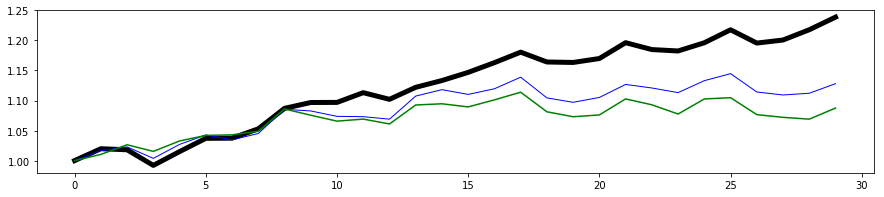

2000-10-17 00:00:00 2001-10-18 00:00:00
2001-10-22 00:00:00 2001-12-03 00:00:00
['NEM', 'KMX', 'EIX', 'HOLX', 'ANSS', 'ILMN', 'VAR', 'HST', 'EQIX', 'AIV']


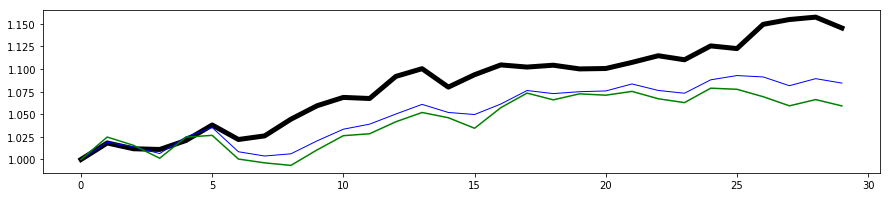

2000-11-14 00:00:00 2001-11-15 00:00:00
2001-11-19 00:00:00 2002-01-02 00:00:00
['NEM', 'HOLX', 'HST', 'EQIX', 'PSA', 'EIX', 'ANSS', 'KMX', 'SO', 'TSCO']


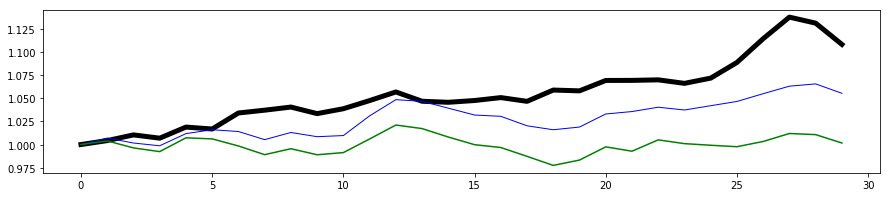

2000-12-13 00:00:00 2001-12-14 00:00:00
2001-12-18 00:00:00 2002-01-31 00:00:00
['NEM', 'EQIX', 'GRMN', 'HOLX', 'HST', 'ANSS', 'MNST', 'SO', 'PSA', 'TSCO']


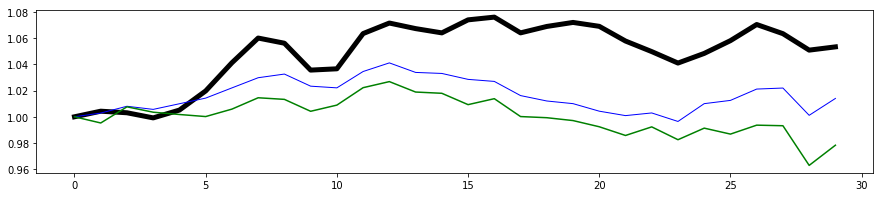

2001-01-12 00:00:00 2002-01-15 00:00:00
2002-01-17 00:00:00 2002-03-01 00:00:00
['NEM', 'HST', 'GRMN', 'HOLX', 'KMX', 'EQIX', 'ED', 'TSCO', 'RTN', 'KMB']


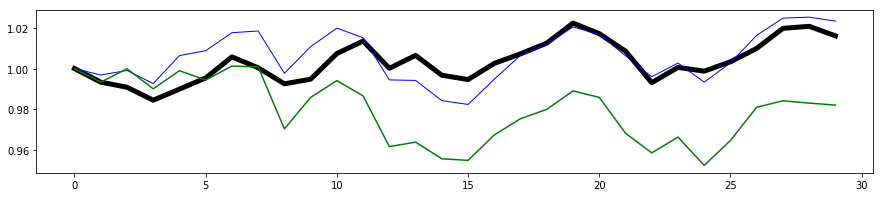

2001-02-12 00:00:00 2002-02-13 00:00:00
2002-02-15 00:00:00 2002-04-01 00:00:00
['NEM', 'HOLX', 'HST', 'TSCO', 'UHS', 'TAP', 'STZ', 'EQIX', 'KMX', 'GRMN']


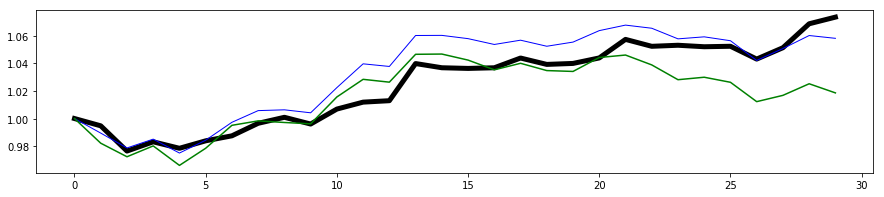

2001-03-13 00:00:00 2002-03-14 00:00:00
2002-03-18 00:00:00 2002-04-29 00:00:00
['NEM', 'UHS', 'HST', 'TSCO', 'STZ', 'HOLX', 'PBCT', 'GRMN', 'TAP', 'KMX']


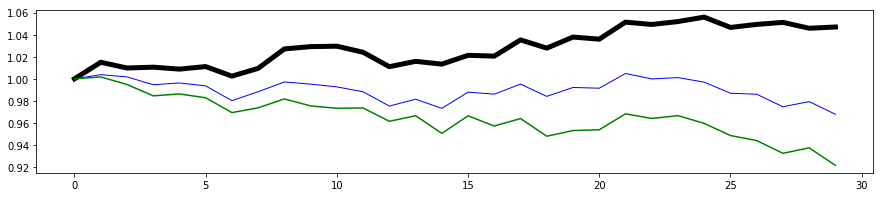

2001-04-10 00:00:00 2002-04-12 00:00:00
2002-04-16 00:00:00 2002-05-28 00:00:00
['NEM', 'UHS', 'HST', 'PBCT', 'GRMN', 'EQIX', 'TSCO', 'ILMN', 'SBAC', 'MNST']


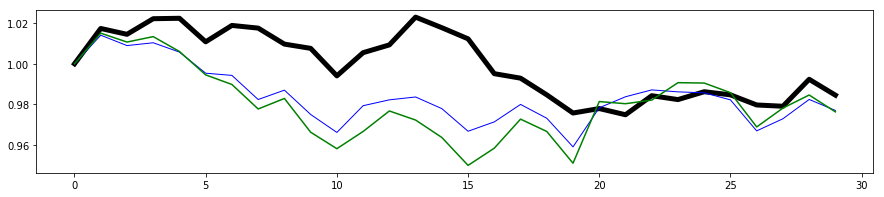

2001-05-09 00:00:00 2002-05-10 00:00:00
2002-05-14 00:00:00 2002-06-25 00:00:00
['NEM', 'UHS', 'HST', 'PBCT', 'GRMN', 'TSCO', 'EQIX', 'MNST', 'HOLX', 'HCP']


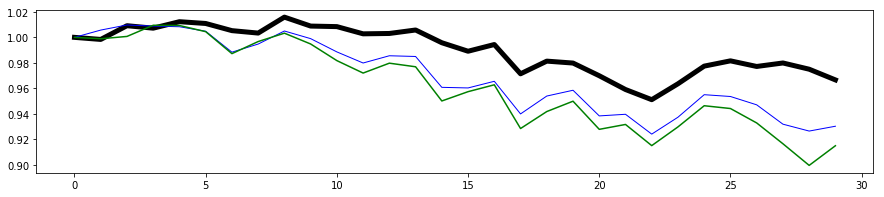

2001-06-07 00:00:00 2002-06-10 00:00:00
2002-06-12 00:00:00 2002-07-24 00:00:00
['NEM', 'HOLX', 'HCP', 'HST', 'TSCO', 'EQIX', 'PBCT', 'UHS', 'GRMN', 'MNST']


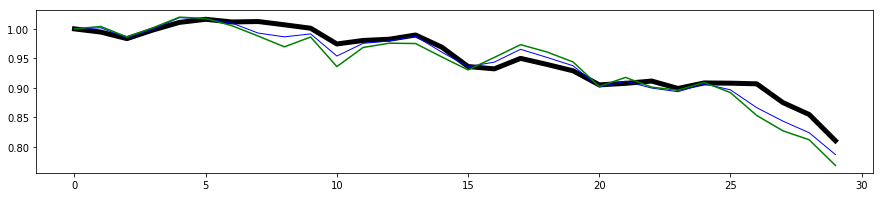

2001-07-06 00:00:00 2002-07-09 00:00:00
2002-07-11 00:00:00 2002-08-21 00:00:00
['NEM', 'HCP', 'SJM', 'EQIX', 'ALGN', 'KIM', 'FIS', 'HST', 'PBCT', 'MDLZ']


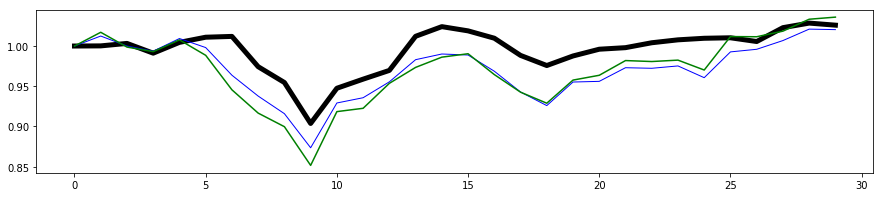

2001-08-03 00:00:00 2002-08-06 00:00:00
2002-08-08 00:00:00 2002-09-19 00:00:00
['NEM', 'ALGN', 'EQIX', 'MCD', 'SJM', 'HCP', 'ADS', 'MDLZ', 'HOLX', 'MO']


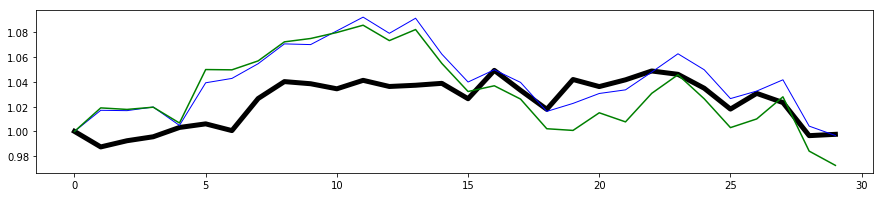

2001-08-31 00:00:00 2002-09-04 00:00:00
2002-09-06 00:00:00 2002-10-17 00:00:00
['NEM', 'EQIX', 'ALGN', 'MCD', 'HCP', 'MDLZ', 'ADS', 'FE', 'MO', 'TSCO']


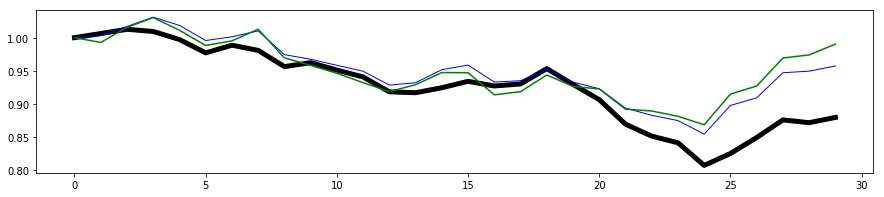

2001-10-05 00:00:00 2002-10-02 00:00:00
2002-10-04 00:00:00 2002-11-14 00:00:00
['NEM', 'EQIX', 'ALGN', 'MNST', 'ADS', 'MCD', 'MDLZ', 'MO', 'CCI', 'FLIR']


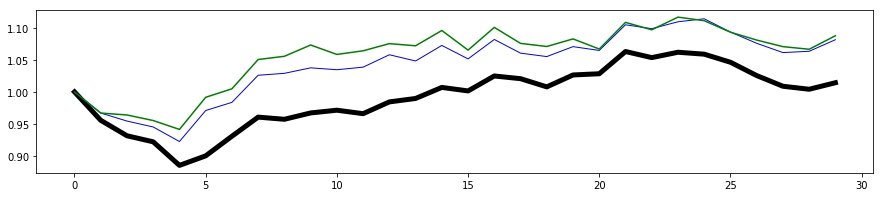

2001-11-02 00:00:00 2002-10-30 00:00:00
2002-11-01 00:00:00 2002-12-13 00:00:00
['NEM', 'MNST', 'EQIX', 'ALGN', 'MDLZ', 'HCP', 'ADS', 'MO', 'BLK', 'HSY']


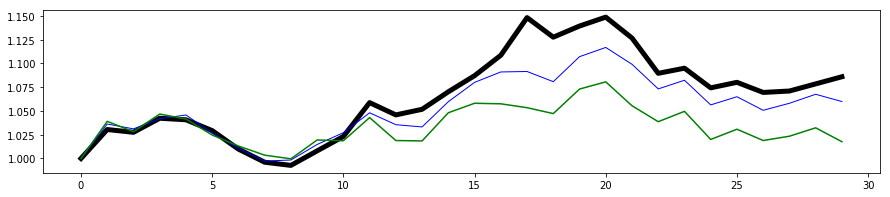

2001-12-03 00:00:00 2002-11-27 00:00:00
2002-12-02 00:00:00 2003-01-14 00:00:00
['NEM', 'MNST', 'EQIX', 'HCP', 'ALGN', 'HSY', 'MDLZ', 'CCI', 'MO', 'ZBH']


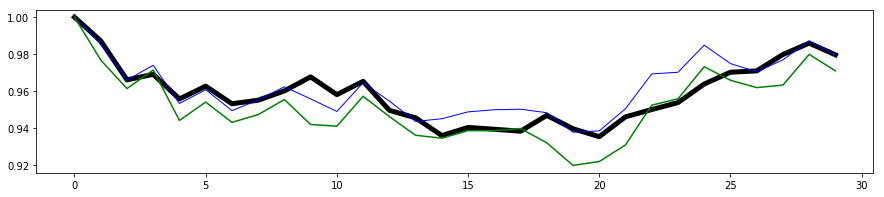

2002-01-02 00:00:00 2002-12-27 00:00:00
2002-12-31 00:00:00 2003-02-12 00:00:00
['NEM', 'MNST', 'EQIX', 'ALGN', 'MDLZ', 'CCI', 'HSY', 'ILMN', 'HCP', 'ZBH']


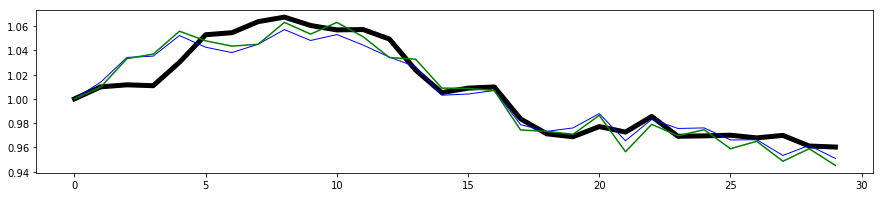

2002-01-31 00:00:00 2003-01-28 00:00:00
2003-01-30 00:00:00 2003-03-13 00:00:00
['NEM', 'MNST', 'EQIX', 'ALGN', 'HCP', 'ILMN', 'CCI', 'ZBH', 'MDLZ', 'HSY']


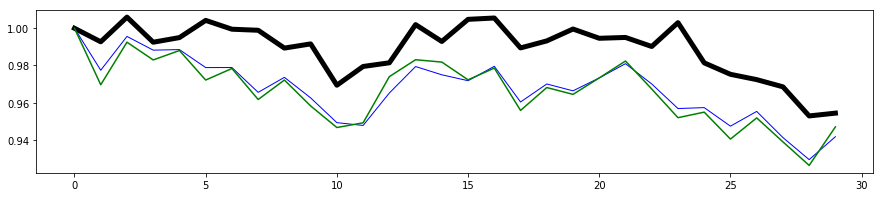

2002-03-01 00:00:00 2003-02-26 00:00:00
2003-02-28 00:00:00 2003-04-10 00:00:00
['NEM', 'EQIX', 'MNST', 'ALGN', 'MDLZ', 'HCP', 'CCI', 'HSY', 'ILMN', 'MCD']


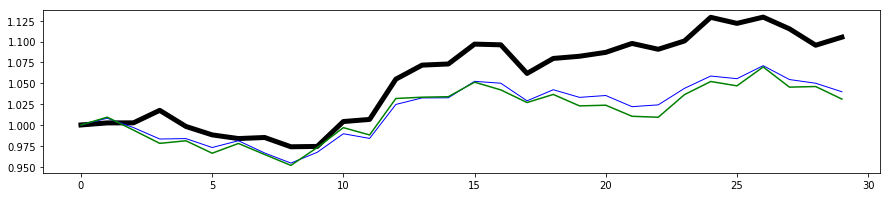

2002-04-01 00:00:00 2003-03-26 00:00:00
2003-03-28 00:00:00 2003-05-09 00:00:00
['NEM', 'MNST', 'EQIX', 'MO', 'CCI', 'HCP', 'MCD', 'ALGN', 'ISRG', 'MDLZ']


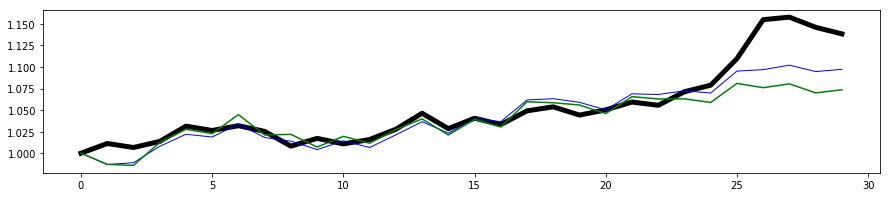

2002-04-29 00:00:00 2003-04-24 00:00:00
2003-04-28 00:00:00 2003-06-09 00:00:00
['NEM', 'MNST', 'EQIX', 'MO', 'MCD', 'CCI', 'ABMD', 'ISRG', 'ZBH', 'ALGN']


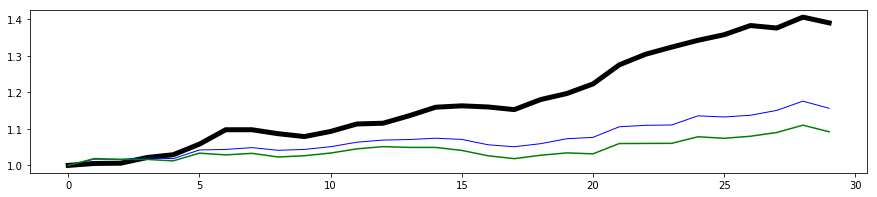

2002-05-28 00:00:00 2003-05-22 00:00:00
2003-05-27 00:00:00 2003-07-08 00:00:00
['NEM', 'NFLX', 'MNST', 'EQIX', 'CCI', 'MO', 'ABMD', 'ISRG', 'MDLZ', 'ZBH']


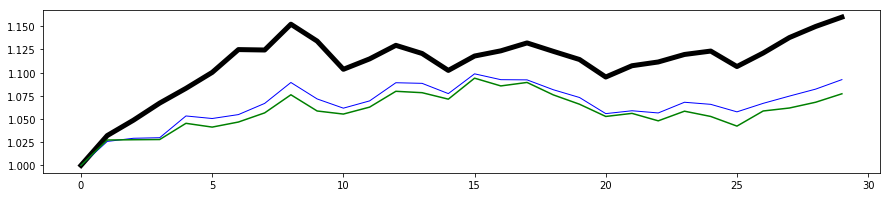

2002-06-25 00:00:00 2003-06-20 00:00:00
2003-06-24 00:00:00 2003-08-05 00:00:00
['NEM', 'MNST', 'NFLX', 'EQIX', 'ZBH', 'MO', 'CCI', 'ABMD', 'ISRG', 'MCD']


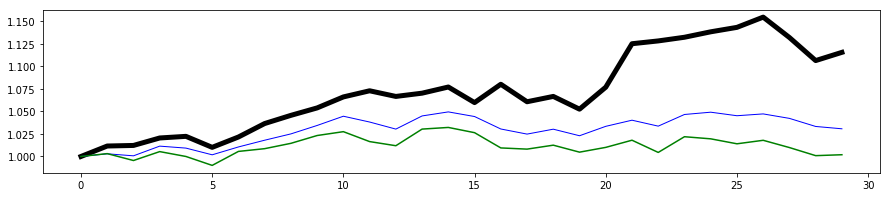

2002-07-24 00:00:00 2003-07-21 00:00:00
2003-07-23 00:00:00 2003-09-03 00:00:00
['NEM', 'MNST', 'EQIX', 'NFLX', 'ZBH', 'NDAQ', 'STZ', 'ILMN', 'MO', 'ISRG']


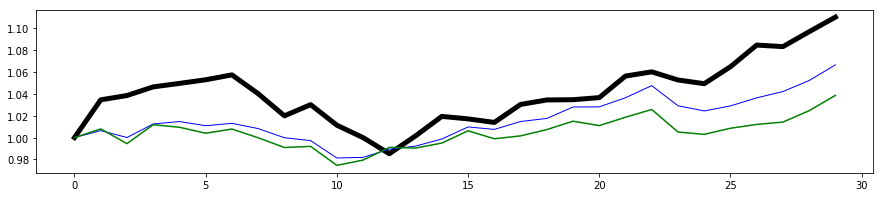

2002-08-21 00:00:00 2003-08-18 00:00:00
2003-08-20 00:00:00 2003-10-01 00:00:00
['TLT', 'NEM', 'ILMN', 'NDAQ', 'ZBH', 'MNST', 'STZ', 'HCP', 'TSCO', 'SBAC']


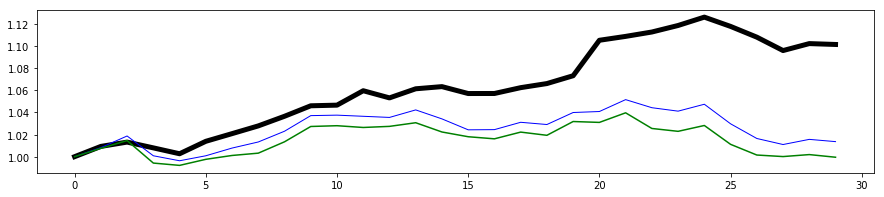

2002-09-19 00:00:00 2003-09-16 00:00:00
2003-09-18 00:00:00 2003-10-29 00:00:00
['TLT', 'NEM', 'ILMN', 'NDAQ', 'ZBH', 'MNST', 'STZ', 'HFC', 'SBAC', 'BLK']


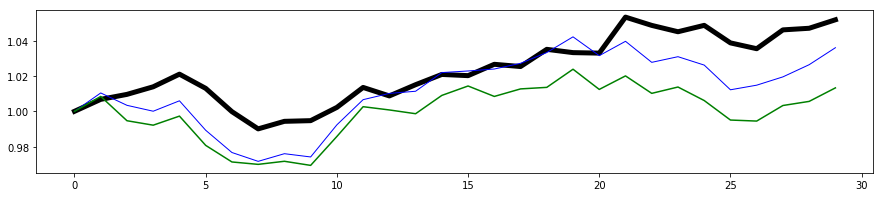

2002-10-17 00:00:00 2003-10-14 00:00:00
2003-10-16 00:00:00 2003-11-26 00:00:00
['TLT', 'ILMN', 'MNST', 'NEM', 'NDAQ', 'HFC', 'EQIX', 'STZ', 'ZBH', 'ABMD']


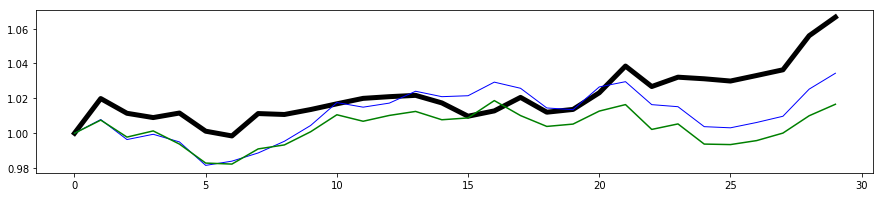

2002-11-14 00:00:00 2003-11-11 00:00:00
2003-11-13 00:00:00 2003-12-26 00:00:00
['TLT', 'NDAQ', 'MNST', 'ILMN', 'SBAC', 'HFC', 'NEM', 'EQIX', 'ABMD', 'STZ']


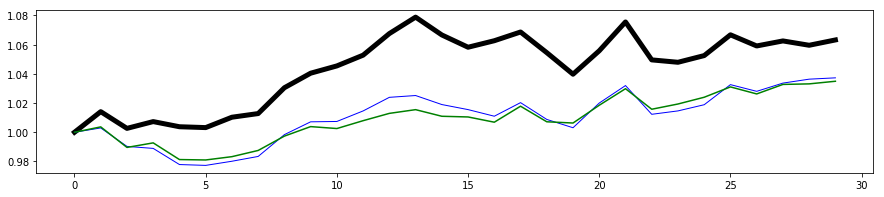

2002-12-13 00:00:00 2003-12-10 00:00:00
2003-12-12 00:00:00 2004-01-27 00:00:00
['TLT', 'NDAQ', 'MNST', 'SBAC', 'ILMN', 'HFC', 'NEM', 'ABMD', 'STZ', 'EQIX']


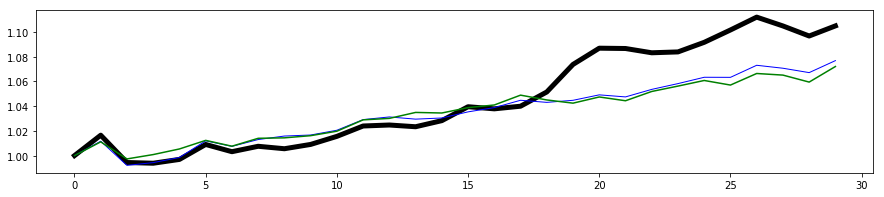

2003-01-14 00:00:00 2004-01-09 00:00:00
2004-01-13 00:00:00 2004-02-25 00:00:00
['TLT', 'NDAQ', 'NEM', 'HFC', 'ABMD', 'WYNN', 'SBAC', 'CME', 'ILMN', 'APA']


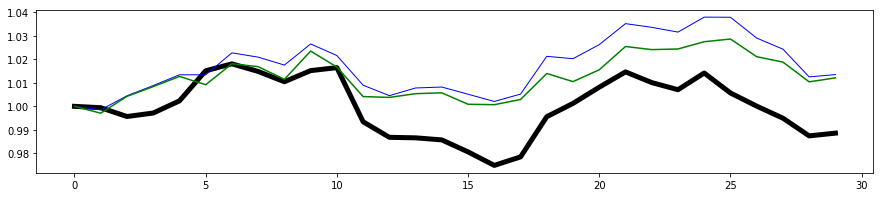

2003-02-12 00:00:00 2004-02-09 00:00:00
2004-02-11 00:00:00 2004-03-24 00:00:00
['TLT', 'HFC', 'MNST', 'NDAQ', 'NEM', 'ILMN', 'WYNN', 'SBAC', 'REG', 'DRI']


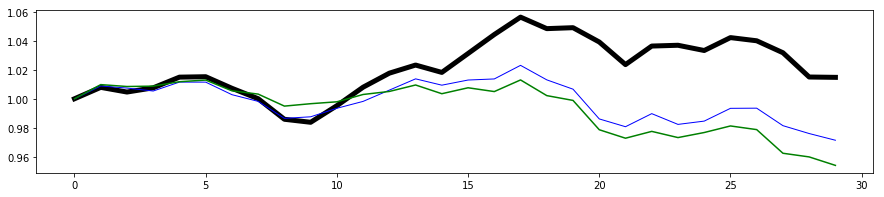

2003-03-13 00:00:00 2004-03-09 00:00:00
2004-03-11 00:00:00 2004-04-22 00:00:00
['TLT', 'MNST', 'ILMN', 'HFC', 'IDXX', 'MTD', 'WYNN', 'NEM', 'DVN', 'ABMD']


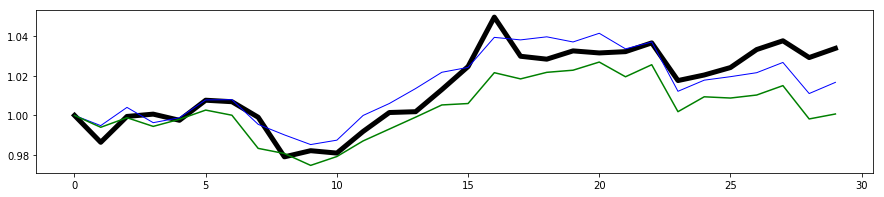

2003-04-10 00:00:00 2004-04-06 00:00:00
2004-04-08 00:00:00 2004-05-20 00:00:00
['TLT', 'MNST', 'ILMN', 'HFC', 'NDAQ', 'SBAC', 'MTD', 'ABMD', 'REG', 'TAP']


2003-05-09 00:00:00 2004-05-05 00:00:00
2004-05-07 00:00:00 2004-06-21 00:00:00
['TLT', 'MNST', 'HFC', 'ILMN', 'NDAQ', 'TAP', 'CL', 'MTD', 'SBAC', 'TSN']


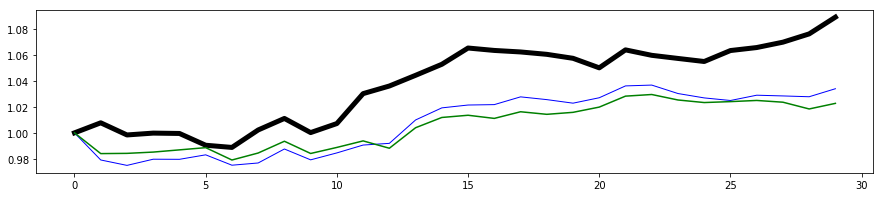

2003-06-09 00:00:00 2004-06-03 00:00:00
2004-06-07 00:00:00 2004-07-20 00:00:00
['TLT', 'MNST', 'ILMN', 'HFC', 'NDAQ', 'CL', 'MTD', 'TAP', 'STX', 'KSS']


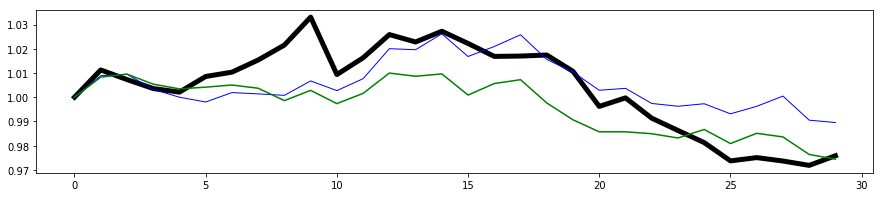

2003-07-08 00:00:00 2004-07-02 00:00:00
2004-07-07 00:00:00 2004-08-17 00:00:00
['TLT', 'MNST', 'ILMN', 'HFC', 'NDAQ', 'MTD', 'TAP', 'ABMD', 'CL', 'IDXX']


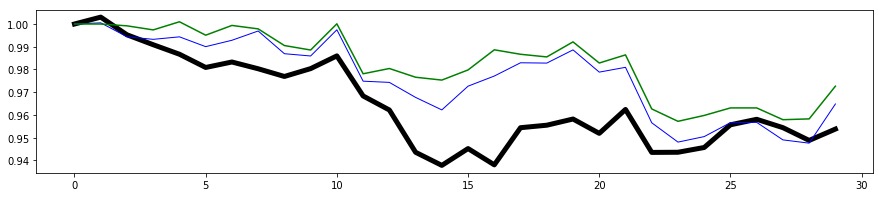

2003-08-05 00:00:00 2004-08-02 00:00:00
2004-08-04 00:00:00 2004-09-15 00:00:00
['TLT', 'NDAQ', 'MNST', 'ILMN', 'HFC', 'DRI', 'CL', 'TAP', 'MYL', 'WBA']


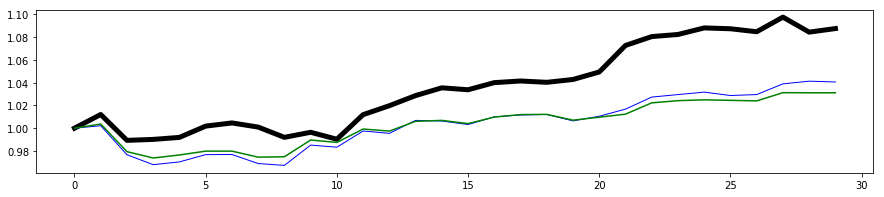

2003-09-03 00:00:00 2004-08-30 00:00:00
2004-09-01 00:00:00 2004-10-13 00:00:00
['TLT', 'MNST', 'NDAQ', 'TAP', 'HFC', 'ILMN', 'ABMD', 'MYL', 'PSA', 'CTL']


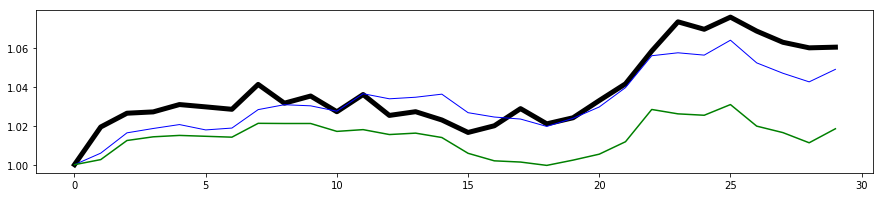

2003-10-01 00:00:00 2004-09-28 00:00:00
2004-09-30 00:00:00 2004-11-10 00:00:00
['TLT', 'MNST', 'TAP', 'MYL', 'HFC', 'WYNN', 'PBCT', 'KSS', 'CL', 'ABMD']


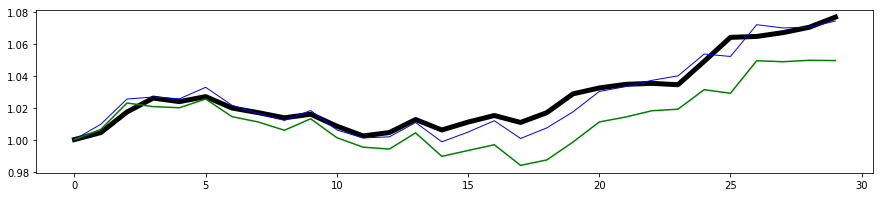

2003-10-29 00:00:00 2004-10-26 00:00:00
2004-10-28 00:00:00 2004-12-09 00:00:00
['TLT', 'MNST', 'NDAQ', 'TAP', 'HFC', 'WYNN', 'PBCT', 'LKQ', 'KSS', 'GIS']


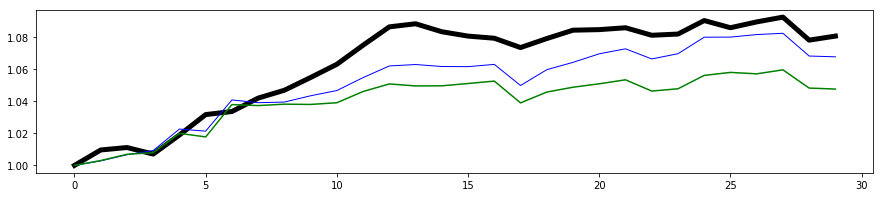

2003-11-26 00:00:00 2004-11-23 00:00:00
2004-11-26 00:00:00 2005-01-07 00:00:00
['TLT', 'MNST', 'TAP', 'NDAQ', 'MYL', 'WYNN', 'CTL', 'IRM', 'CL', 'LKQ']


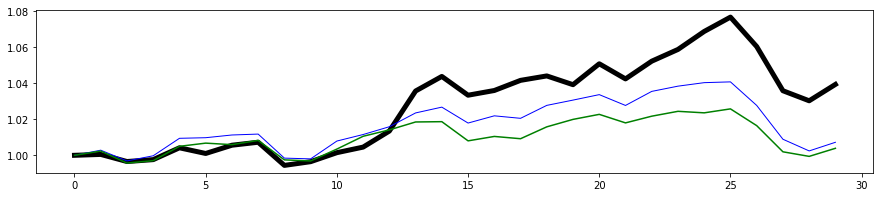

2003-12-26 00:00:00 2004-12-22 00:00:00
2004-12-27 00:00:00 2005-02-07 00:00:00
['TLT', 'MNST', 'NDAQ', 'TAP', 'CL', 'CTL', 'IRM', 'MYL', 'WMT', 'KSS']


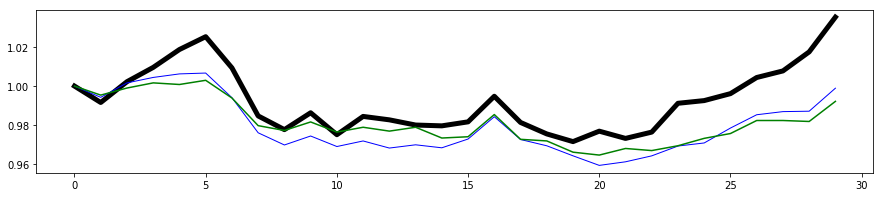

2004-01-27 00:00:00 2005-01-21 00:00:00
2005-01-25 00:00:00 2005-03-08 00:00:00
['TLT', 'MNST', 'NRG', 'CL', 'MYL', 'NFLX', 'TAP', 'CTL', 'ABMD', 'ILMN']


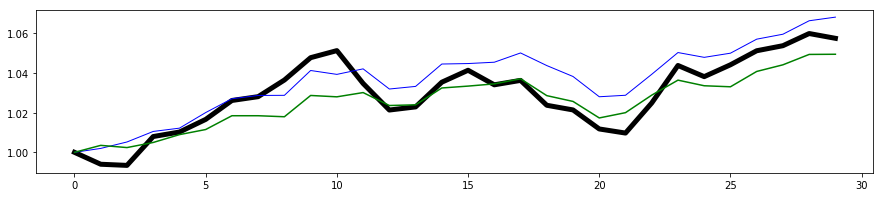

2004-02-25 00:00:00 2005-02-18 00:00:00
2005-02-23 00:00:00 2005-04-06 00:00:00
['TLT', 'MNST', 'NRG', 'AIZ', 'NDAQ', 'MYL', 'CL', 'PFE', 'NFLX', 'DVA']


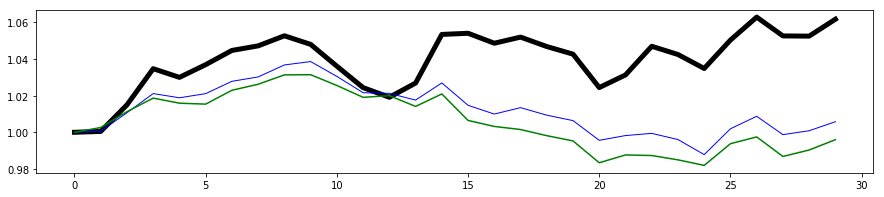

2004-03-24 00:00:00 2005-03-21 00:00:00
2005-03-23 00:00:00 2005-05-04 00:00:00
['TLT', 'MNST', 'MYL', 'NRG', 'NDAQ', 'AIZ', 'DVA', 'MMC', 'TAP', 'CL']


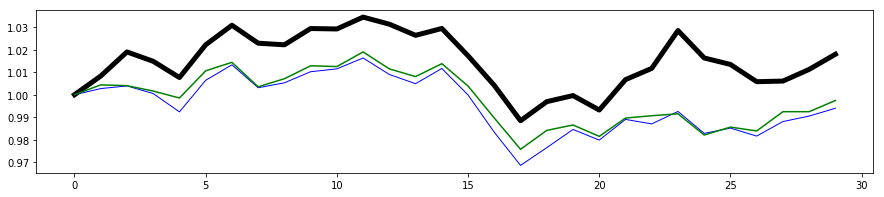

2004-04-22 00:00:00 2005-04-19 00:00:00
2005-04-21 00:00:00 2005-06-02 00:00:00
['TLT', 'MNST', 'MYL', 'NDAQ', 'NRG', 'TAP', 'AIZ', 'ILMN', 'WLTW', 'VLO']


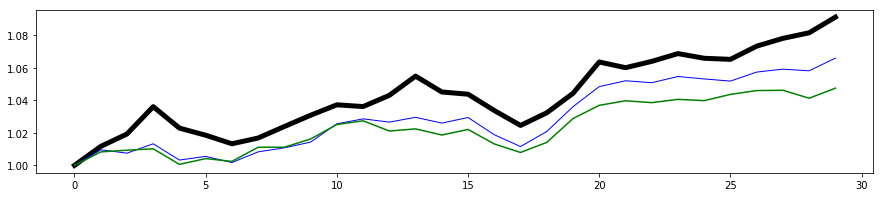

2004-05-20 00:00:00 2005-05-17 00:00:00
2005-05-19 00:00:00 2005-06-30 00:00:00
['TLT', 'MYL', 'NDAQ', 'MNST', 'AIZ', 'NFLX', 'FLIR', 'WLTW', 'TAP', 'CCI']


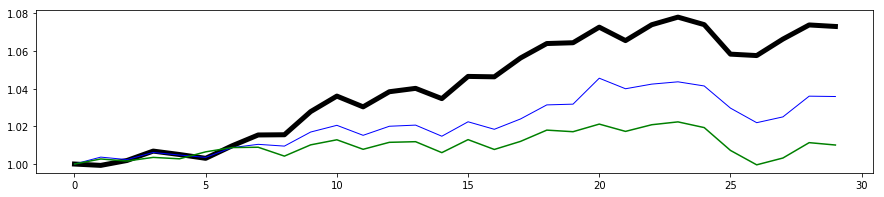

2004-06-21 00:00:00 2005-06-15 00:00:00
2005-06-17 00:00:00 2005-07-29 00:00:00
['TLT', 'MYL', 'ABT', 'NFLX', 'NDAQ', 'CCI', 'BSX', 'WLTW', 'TAP', 'MNST']


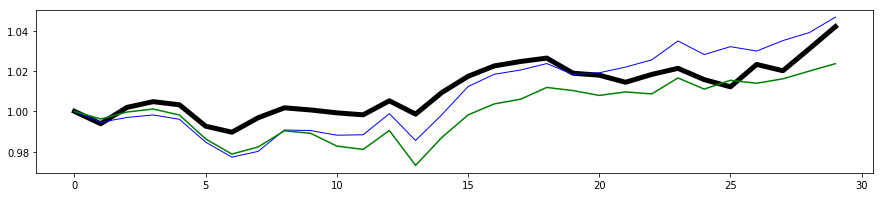

2004-07-20 00:00:00 2005-07-14 00:00:00
2005-07-18 00:00:00 2005-08-26 00:00:00
['TLT', 'CCI', 'WLTW', 'MYL', 'NDAQ', 'FTI', 'BSX', 'FLIR', 'NFLX', 'MRK']


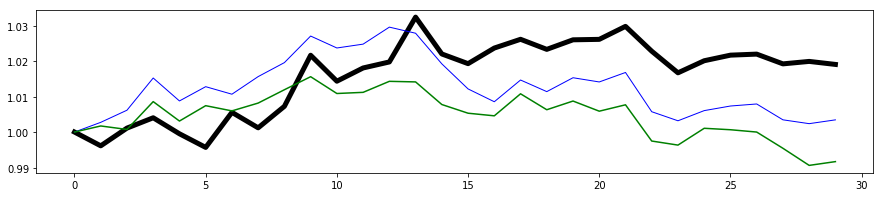

2004-08-17 00:00:00 2005-08-11 00:00:00
2005-08-15 00:00:00 2005-09-26 00:00:00
['TLT', 'NFLX', 'WLTW', 'FLIR', 'MYL', 'FTI', 'MRK', 'ILMN', 'IPG', 'NDAQ']


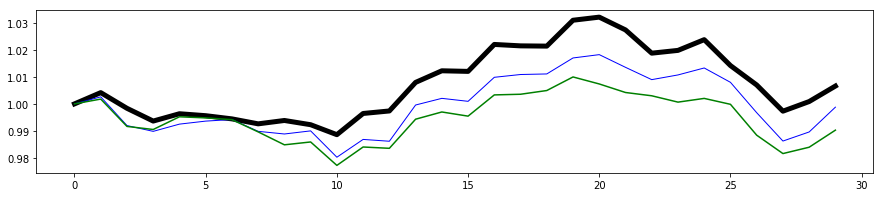

2004-09-15 00:00:00 2005-09-09 00:00:00
2005-09-13 00:00:00 2005-10-24 00:00:00
['TLT', 'NFLX', 'FTI', 'CCI', 'MRK', 'ILMN', 'GOOG', 'FLIR', 'MYL', 'WLTW']


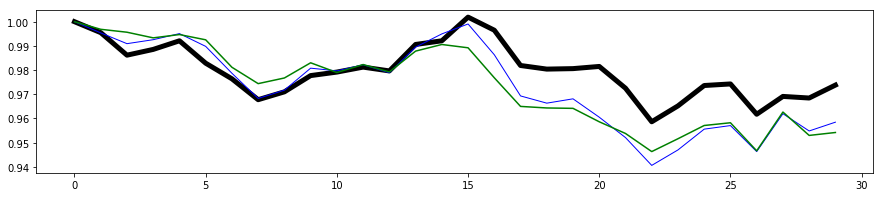

2004-10-13 00:00:00 2005-10-07 00:00:00
2005-10-11 00:00:00 2005-11-21 00:00:00
['TLT', 'WLTW', 'ILMN', 'NFLX', 'MYL', 'CCI', 'CRM', 'GOOG', 'IPG', 'NDAQ']


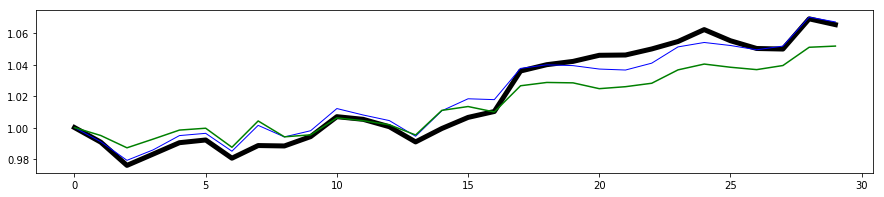

2004-11-10 00:00:00 2005-11-04 00:00:00
2005-11-08 00:00:00 2005-12-20 00:00:00
['TLT', 'MYL', 'CCI', 'MKTX', 'ILMN', 'WLTW', 'FLIR', 'NDAQ', 'IPG', 'EQIX']


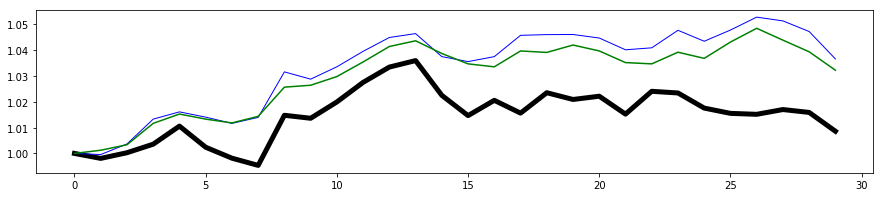

2004-12-09 00:00:00 2005-12-05 00:00:00
2005-12-07 00:00:00 2006-01-20 00:00:00
['GLD', 'TLT', 'ILMN', 'MYL', 'IPG', 'CCI', 'MKTX', 'FLIR', 'WLTW', 'BKNG']


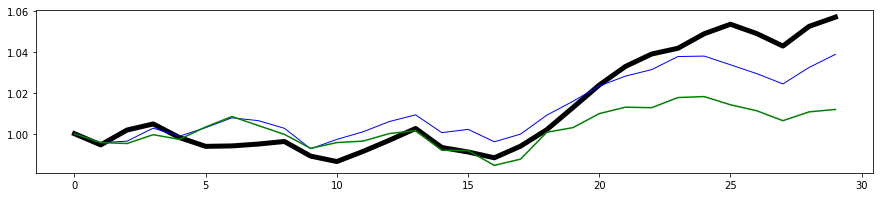

2005-01-07 00:00:00 2006-01-04 00:00:00
2006-01-06 00:00:00 2006-02-17 00:00:00
['GLD', 'TLT', 'MKTX', 'IPG', 'MYL', 'ILMN', 'CCI', 'MRK', 'BKNG', 'NDAQ']


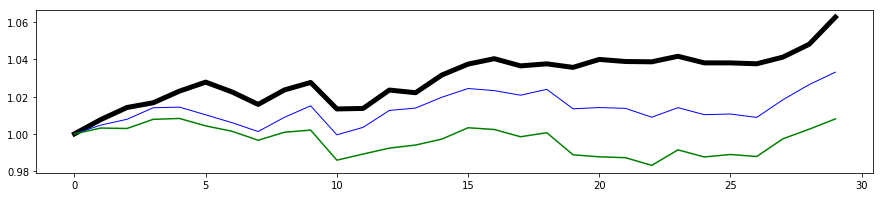

2005-02-07 00:00:00 2006-02-02 00:00:00
2006-02-06 00:00:00 2006-03-20 00:00:00
['TLT', 'GLD', 'MYL', 'IPG', 'ILMN', 'XRX', 'MKTX', 'NDAQ', 'MRK', 'ACN']


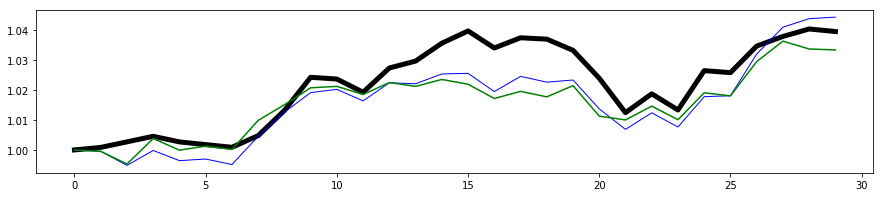

2005-03-08 00:00:00 2006-03-03 00:00:00
2006-03-07 00:00:00 2006-04-18 00:00:00
['TLT', 'GLD', 'MYL', 'ILMN', 'IPG', 'MKTX', 'MRK', 'CCI', 'NDAQ', 'XRX']


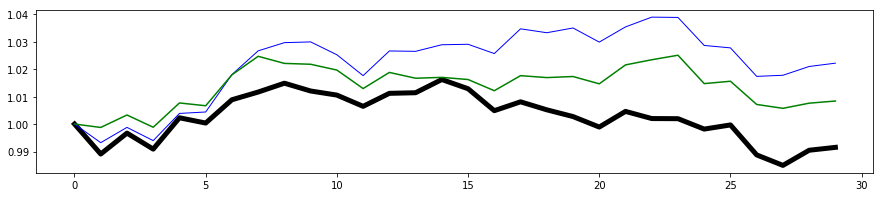

2005-04-06 00:00:00 2006-03-31 00:00:00
2006-04-04 00:00:00 2006-05-16 00:00:00
['TLT', 'MYL', 'MDT', 'GLD', 'ACN', 'XRX', 'MOS', 'BHGE', 'MRK', 'HRL']


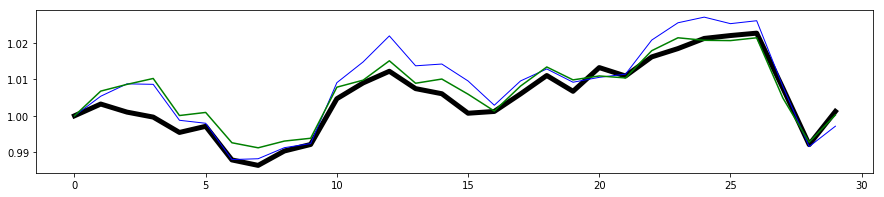

2005-05-04 00:00:00 2006-05-01 00:00:00
2006-05-03 00:00:00 2006-06-14 00:00:00
['TLT', 'MOS', 'MYL', 'MDT', 'IPG', 'ACN', 'CCI', 'GLD', 'HRL', 'FLIR']


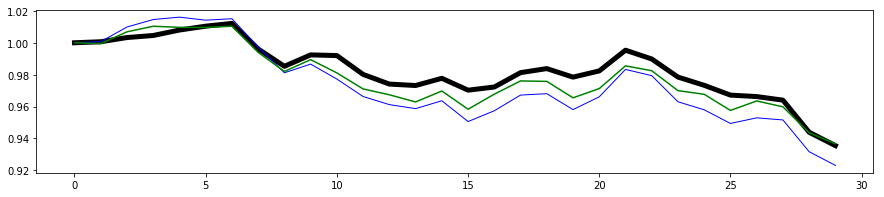

2005-06-02 00:00:00 2006-05-30 00:00:00
2006-06-01 00:00:00 2006-07-13 00:00:00
['TLT', 'MOS', 'MDT', 'IPG', 'MYL', 'DLR', 'AIZ', 'FLIR', 'ACN', 'AOS']


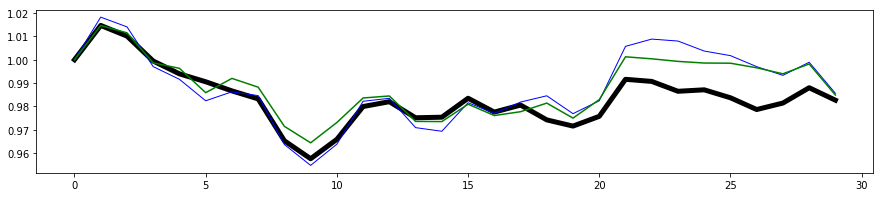

2005-06-30 00:00:00 2006-06-27 00:00:00
2006-06-29 00:00:00 2006-08-10 00:00:00
['TLT', 'MDT', 'MOS', 'AIZ', 'ACN', 'DLR', 'MYL', 'IPG', 'DGX', 'TTWO']


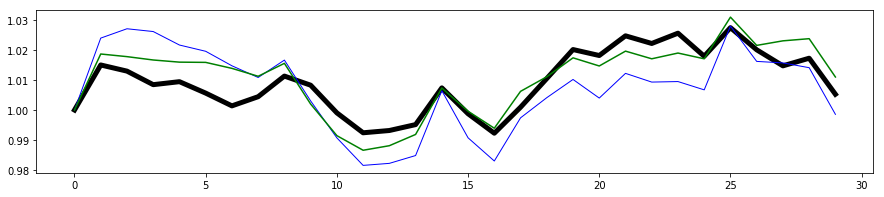

2005-07-29 00:00:00 2006-07-26 00:00:00
2006-07-28 00:00:00 2006-09-08 00:00:00
['TLT', 'MDT', 'EXPE', 'DLR', 'PEP', 'AIZ', 'NRG', 'MOS', 'AOS', 'GPN']


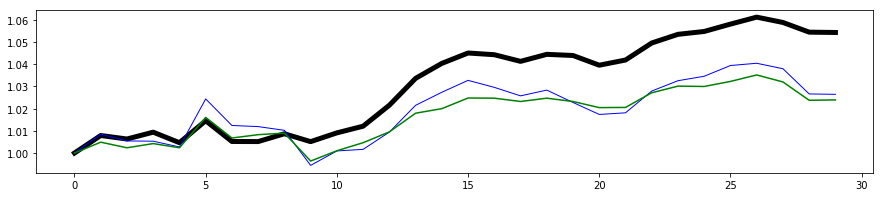

2005-08-26 00:00:00 2006-08-23 00:00:00
2006-08-25 00:00:00 2006-10-06 00:00:00
['TLT', 'EXPE', 'MDT', 'AIZ', 'DLR', 'PEP', 'WCG', 'F', 'GIS', 'NRG']


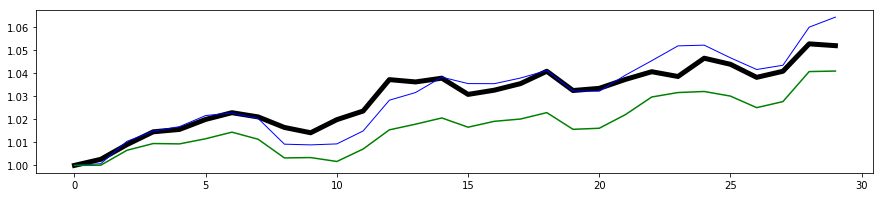

2005-09-26 00:00:00 2006-09-21 00:00:00
2006-09-25 00:00:00 2006-11-03 00:00:00
['TLT', 'MDT', 'EXPE', 'PEP', 'DLR', 'GIS', 'AIZ', 'AOS', 'WCG', 'F']


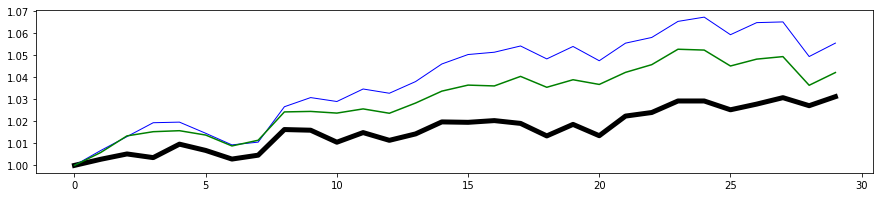

2005-10-24 00:00:00 2006-10-19 00:00:00
2006-10-23 00:00:00 2006-12-04 00:00:00
['TLT', 'EXPE', 'MDT', 'WCG', 'NRG', 'GIS', 'DLR', 'F', 'AIZ', 'KR']


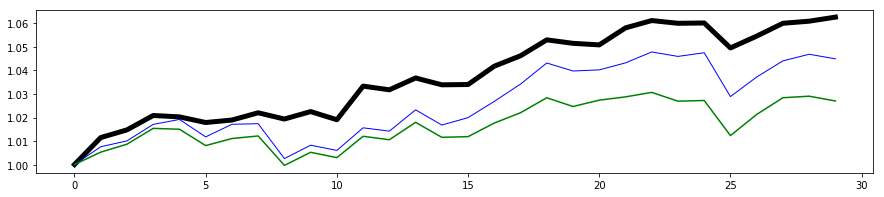

2005-11-21 00:00:00 2006-11-16 00:00:00
2006-11-20 00:00:00 2007-01-04 00:00:00
['TLT', 'EXPE', 'NRG', 'DLR', 'MDT', 'AOS', 'KR', 'GIS', 'UAA', 'AIZ']


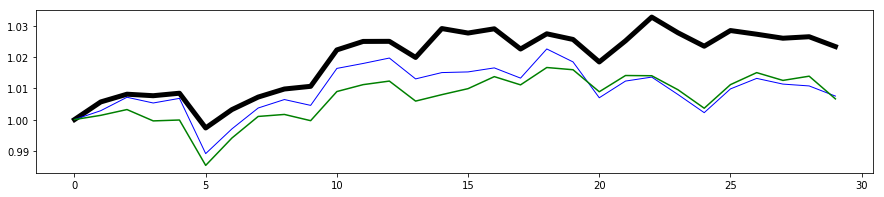

2005-12-20 00:00:00 2006-12-15 00:00:00
2006-12-19 00:00:00 2007-02-02 00:00:00
['TLT', 'EXPE', 'DLR', 'NRG', 'MDT', 'GIS', 'TAP', 'AIZ', 'HUM', 'BAX']


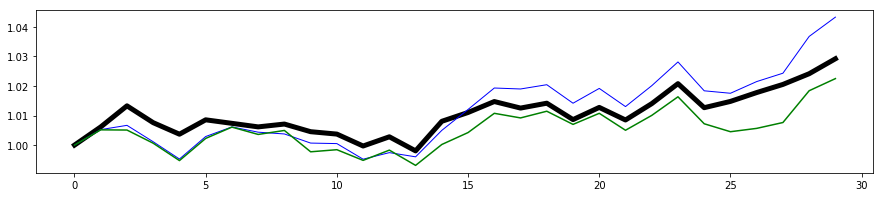

2006-01-20 00:00:00 2007-01-18 00:00:00
2007-01-22 00:00:00 2007-03-05 00:00:00
['TLT', 'EXPE', 'DLR', 'NRG', 'HUM', 'MDT', 'AIZ', 'AOS', 'CAG', 'GLD']


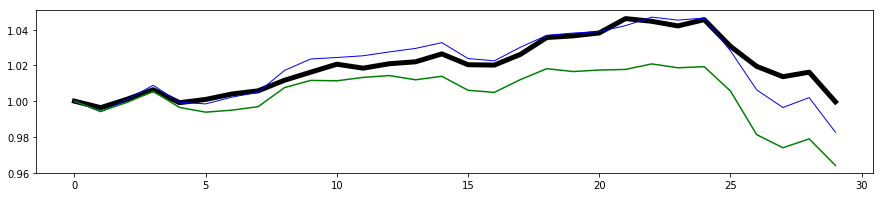

2006-02-17 00:00:00 2007-02-15 00:00:00
2007-02-20 00:00:00 2007-04-02 00:00:00
['TLT', 'HUM', 'PEP', 'EXPE', 'GLD', 'MDT', 'F', 'DLR', 'CAG', 'NFLX']


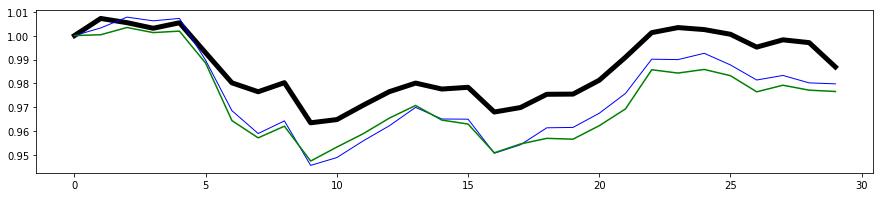

2006-03-20 00:00:00 2007-03-16 00:00:00
2007-03-20 00:00:00 2007-05-01 00:00:00
['TLT', 'TDG', 'NRG', 'TAP', 'HUM', 'WCG', 'GLD', 'MDT', 'KR', 'EXPE']


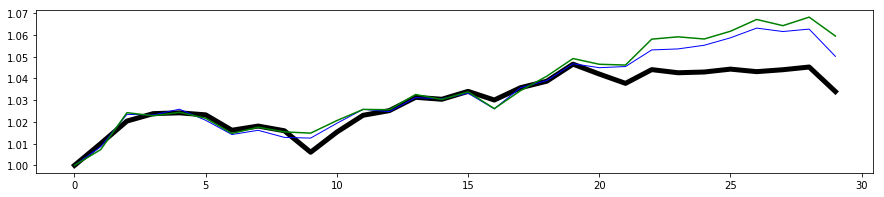

2006-04-18 00:00:00 2007-04-16 00:00:00
2007-04-18 00:00:00 2007-05-30 00:00:00
['TLT', 'USO', 'TAP', 'NRG', 'WCG', 'TDG', 'UAL', 'HUM', 'MO', 'TTWO']


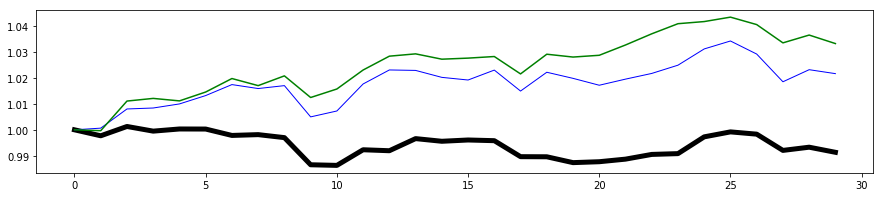

2006-05-16 00:00:00 2007-05-14 00:00:00
2007-05-16 00:00:00 2007-06-27 00:00:00
['TLT', 'USO', 'TAP', 'MDLZ', 'NRG', 'MO', 'WCG', 'MYL', 'CMS', 'HUM']


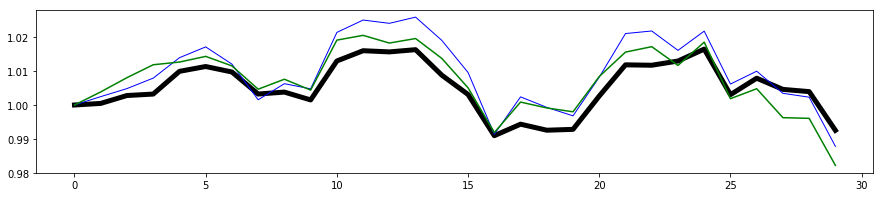

2006-06-14 00:00:00 2007-06-12 00:00:00
2007-06-14 00:00:00 2007-07-26 00:00:00
['TLT', 'USO', 'TAP', 'MDLZ', 'TDG', 'NFLX', 'CMS', 'NRG', 'AGN', 'KR']


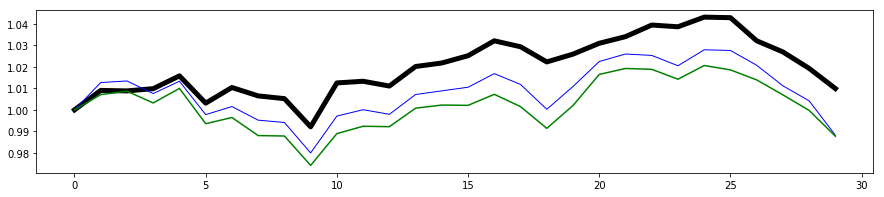

2006-07-13 00:00:00 2007-07-11 00:00:00
2007-07-13 00:00:00 2007-08-23 00:00:00
['USO', 'TLT', 'TAP', 'WCG', 'MDLZ', 'CMS', 'CL', 'RCL', 'WLTW', 'UHS']


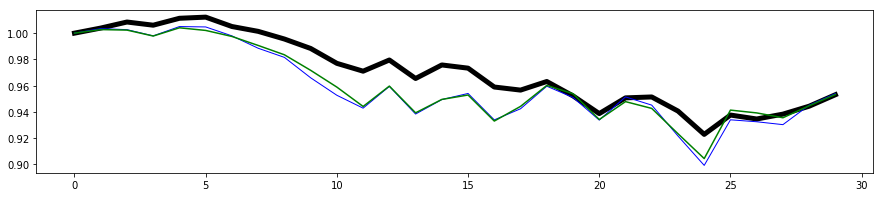

2006-08-10 00:00:00 2007-08-08 00:00:00
2007-08-10 00:00:00 2007-09-21 00:00:00
['TLT', 'USO', 'TAP', 'DGX', 'AAL', 'PBCT', 'RCL', 'TDG', 'WLTW', 'PGR']


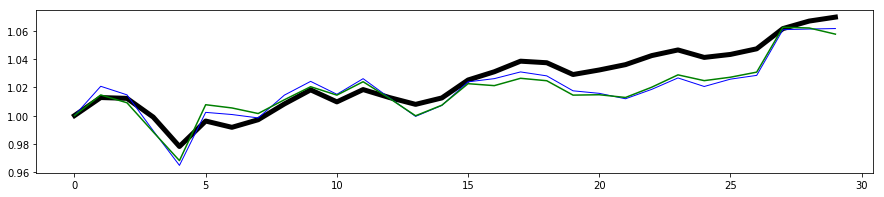

2006-09-08 00:00:00 2007-09-06 00:00:00
2007-09-10 00:00:00 2007-10-19 00:00:00
['TLT', 'USO', 'TAP', 'DGX', 'PGR', 'IDXX', 'UHS', 'PBCT', 'AGN', 'RCL']


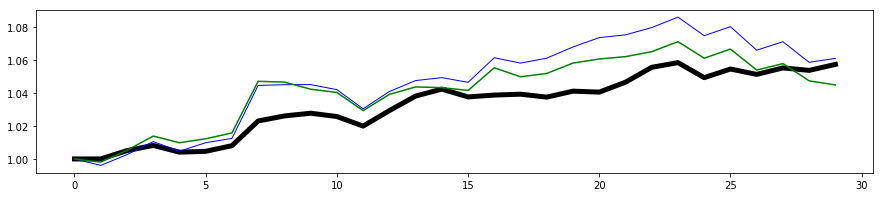

2006-10-06 00:00:00 2007-10-04 00:00:00
2007-10-08 00:00:00 2007-11-16 00:00:00
['TLT', 'USO', 'TAP', 'IDXX', 'UHS', 'ACN', 'DGX', 'PGR', 'AMD', 'TDG']


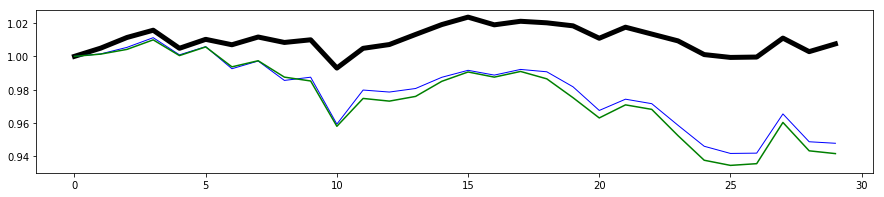

2006-11-03 00:00:00 2007-11-01 00:00:00
2007-11-05 00:00:00 2007-12-17 00:00:00
['TLT', 'USO', 'DGX', 'IDXX', 'TAP', 'PGR', 'UHS', 'ACN', 'COO', 'EW']


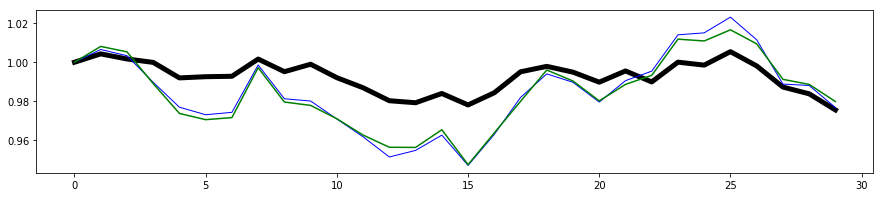

2006-12-04 00:00:00 2007-11-30 00:00:00
2007-12-04 00:00:00 2008-01-16 00:00:00
['TLT', 'USO', 'DGX', 'ACN', 'TAP', 'PGR', 'COO', 'ABC', 'UHS', 'TDG']


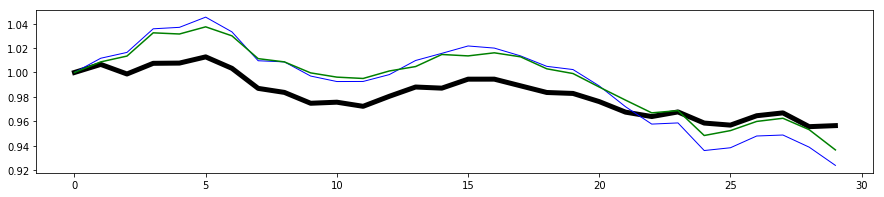

2007-01-04 00:00:00 2007-12-31 00:00:00
2008-01-03 00:00:00 2008-02-14 00:00:00
['TLT', 'USO', 'IPGP', 'DGX', 'ACN', 'COO', 'ABC', 'PGR', 'MDLZ', 'AJG']


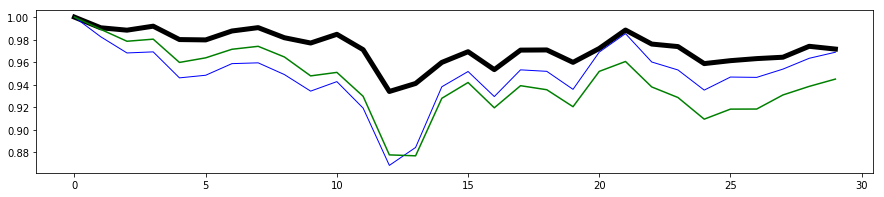

2007-02-02 00:00:00 2008-01-30 00:00:00
2008-02-01 00:00:00 2008-03-14 00:00:00
['TLT', 'USO', 'IPGP', 'COO', 'ACN', 'WAT', 'ABC', 'LKQ', 'VAR', 'WLTW']


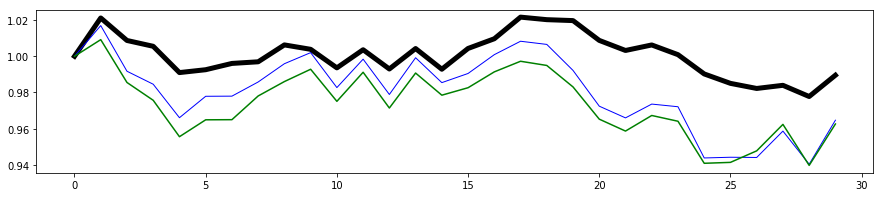

2007-03-05 00:00:00 2008-02-28 00:00:00
2008-03-03 00:00:00 2008-04-14 00:00:00
['TLT', 'USO', 'IPGP', 'COO', 'CERN', 'ABC', 'WLTW', 'LKQ', 'IDXX', 'ACN']


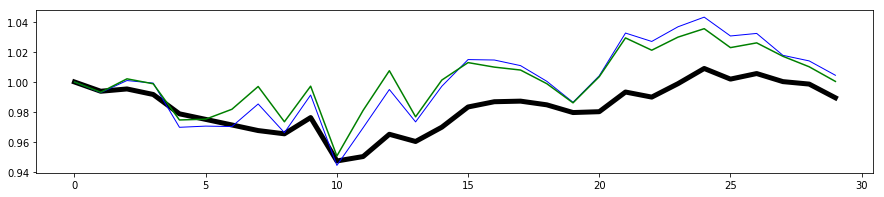

2007-04-02 00:00:00 2008-03-28 00:00:00
2008-04-01 00:00:00 2008-05-12 00:00:00
['TLT', 'USO', 'IPGP', 'ABC', 'WAT', 'LKQ', 'UHS', 'TDG', 'BR', 'WLTW']


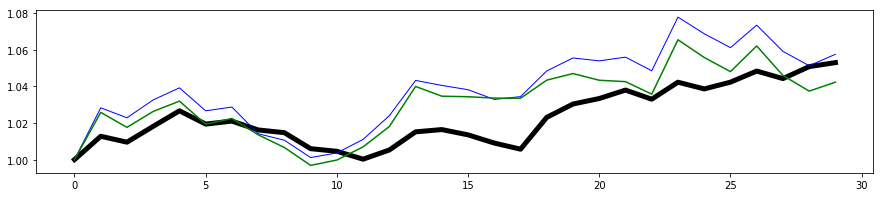

2007-05-01 00:00:00 2008-04-25 00:00:00
2008-04-29 00:00:00 2008-06-10 00:00:00
['TLT', 'USO', 'IPGP', 'ABC', 'LKQ', 'WAT', 'UHS', 'BIIB', 'GLD', 'AGN']


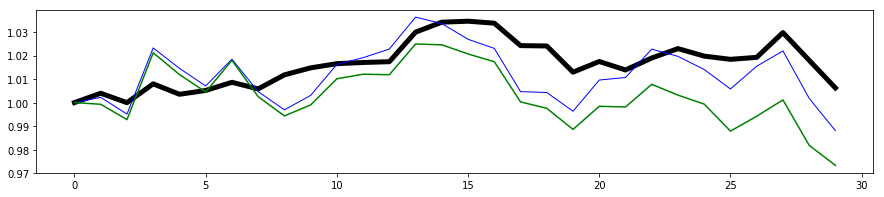

2007-05-30 00:00:00 2008-05-23 00:00:00
2008-05-28 00:00:00 2008-07-09 00:00:00
['TLT', 'USO', 'ABC', 'IPGP', 'GLD', 'COO', 'LKQ', 'AGN', 'MXIM', 'UHS']


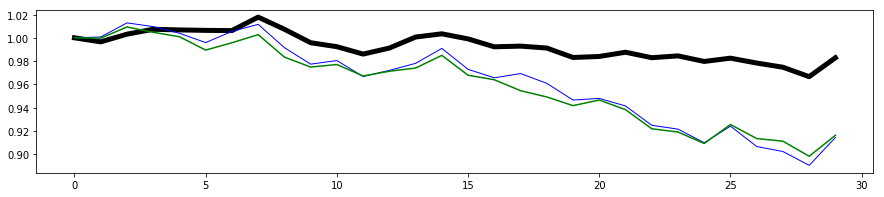

2007-06-27 00:00:00 2008-06-23 00:00:00
2008-06-25 00:00:00 2008-08-06 00:00:00
['TLT', 'USO', 'IPGP', 'LKQ', 'GLD', 'ABC', 'AGN', 'COO', 'MXIM', 'HFC']


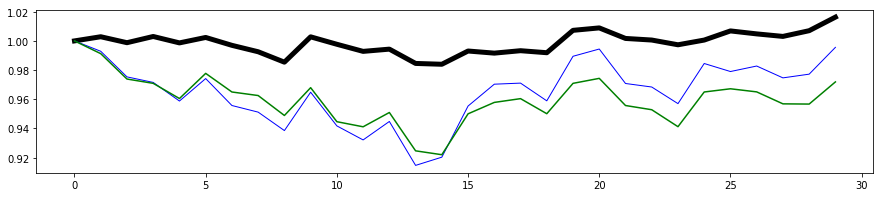

2007-07-26 00:00:00 2008-07-22 00:00:00
2008-07-24 00:00:00 2008-09-04 00:00:00
['TLT', 'USO', 'ABC', 'LKQ', 'HFC', 'IPGP', 'VAR', 'GLD', 'AGN', 'COO']


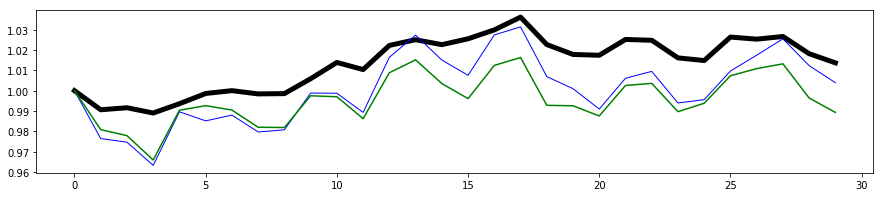

2007-08-23 00:00:00 2008-08-19 00:00:00
2008-08-21 00:00:00 2008-10-02 00:00:00
['TLT', 'USO', 'COO', 'ABC', 'GLD', 'LKQ', 'AGN', 'MXIM', 'HFC', 'IPGP']


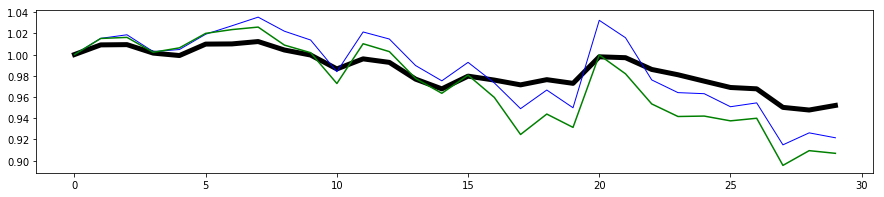

2007-09-21 00:00:00 2008-09-17 00:00:00
2008-09-19 00:00:00 2008-10-30 00:00:00
['TLT', 'USO', 'GLD', 'ATVI', 'COO', 'IPGP', 'LKQ', 'MXIM', 'AAL', 'HBI']


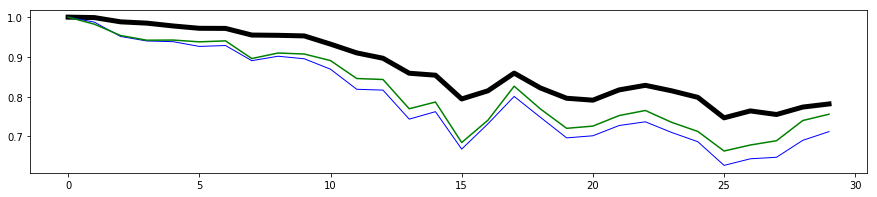

2007-10-19 00:00:00 2008-10-15 00:00:00
2008-10-17 00:00:00 2008-11-28 00:00:00
['TLT', 'GLD', 'USO', 'DAL', 'HFC', 'ATVI', 'LKQ', 'FITB', 'IPGP', 'CAG']


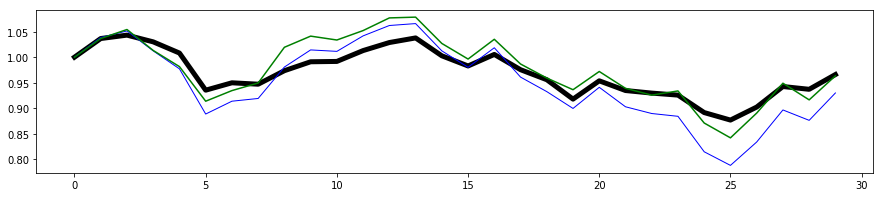

2007-11-16 00:00:00 2008-11-12 00:00:00
2008-11-14 00:00:00 2008-12-29 00:00:00
['TLT', 'GLD', 'MKTX', 'DHI', 'AES', 'USO', 'WYNN', 'PRGO', 'UHS', 'ALXN']


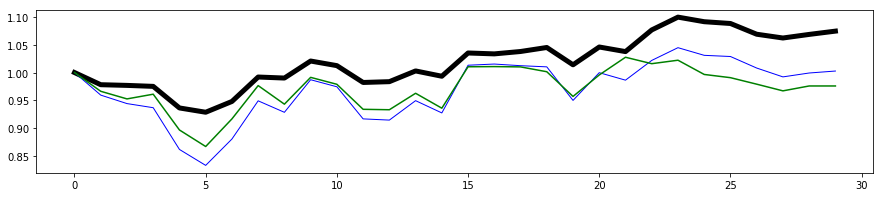

2007-12-17 00:00:00 2008-12-11 00:00:00
2008-12-15 00:00:00 2009-01-28 00:00:00
['TLT', 'GLD', 'AES', 'DHI', 'USO', 'ALXN', 'PRGO', 'KR', 'IPGP', 'ZION']


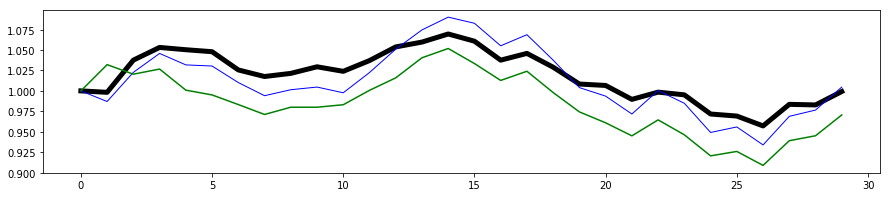

2008-01-16 00:00:00 2009-01-12 00:00:00
2009-01-14 00:00:00 2009-02-26 00:00:00
['TLT', 'GLD', 'KR', 'USO', 'AES', 'PRGO', 'LKQ', 'DHI', 'ATVI', 'ALXN']


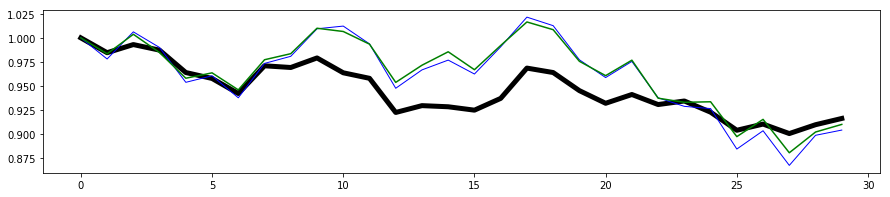

2008-02-14 00:00:00 2009-02-10 00:00:00
2009-02-12 00:00:00 2009-03-26 00:00:00
['TLT', 'GLD', 'USO', 'KR', 'FITB', 'AES', 'DHI', 'ALXN', 'F', 'CLX']


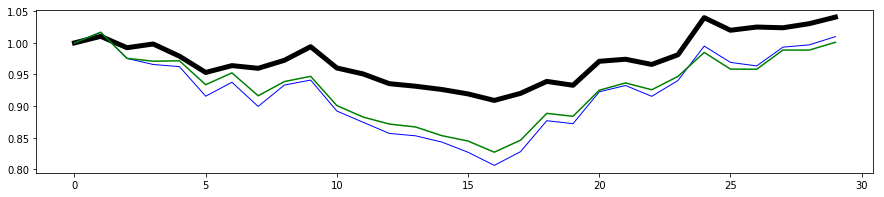

2008-03-14 00:00:00 2009-03-11 00:00:00
2009-03-13 00:00:00 2009-04-24 00:00:00
['TLT', 'GLD', 'USO', 'FITB', 'KR', 'ATVI', 'AES', 'DHI', 'CLX', 'COO']


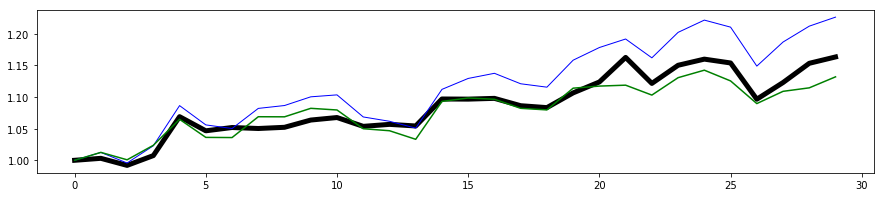

2008-04-14 00:00:00 2009-04-08 00:00:00
2009-04-13 00:00:00 2009-05-22 00:00:00
['TLT', 'GLD', 'SLV', 'FITB', 'DLTR', 'USO', 'HES', 'ATVI', 'KR', 'AES']


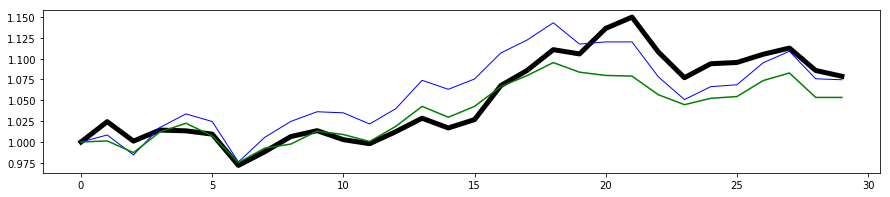

2008-05-12 00:00:00 2009-05-07 00:00:00
2009-05-11 00:00:00 2009-06-22 00:00:00
['TLT', 'GLD', 'SLV', 'AWK', 'USO', 'DLTR', 'FITB', 'ATVI', 'F', 'STI']


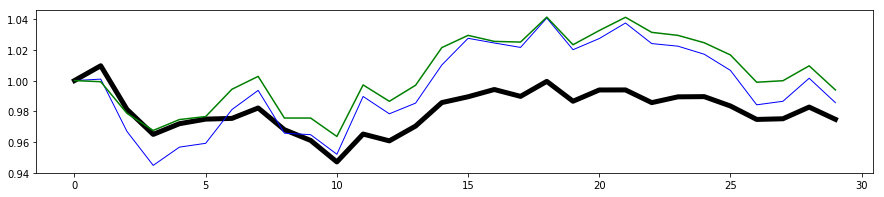

2008-06-10 00:00:00 2009-06-05 00:00:00
2009-06-09 00:00:00 2009-07-21 00:00:00
['TLT', 'GLD', 'DLTR', 'SLV', 'USO', 'AWK', 'ATVI', 'STI', 'HES', 'ABMD']


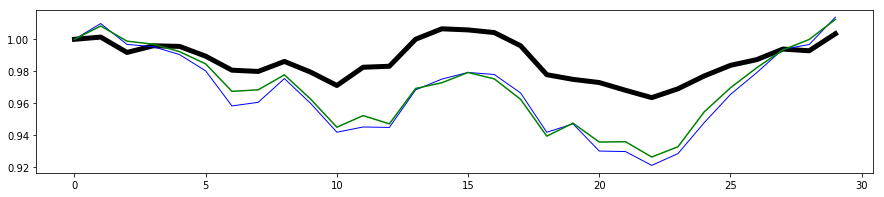

2008-07-09 00:00:00 2009-07-06 00:00:00
2009-07-08 00:00:00 2009-08-18 00:00:00
['TLT', 'GLD', 'DLTR', 'SLV', 'AWK', 'USO', 'MGM', 'ABMD', 'AMD', 'F']


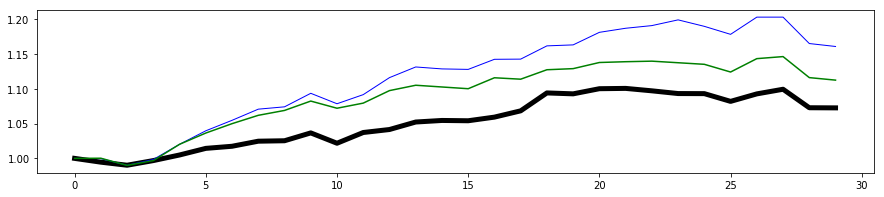

2008-08-06 00:00:00 2009-08-03 00:00:00
2009-08-05 00:00:00 2009-09-16 00:00:00
['TLT', 'GLD', 'DLTR', 'AWK', 'SLV', 'ABMD', 'MGM', 'USO', 'STI', 'AMD']


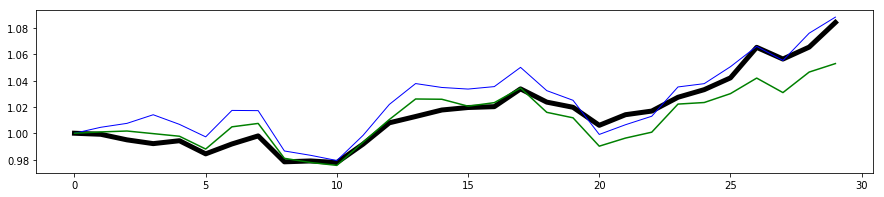

2008-09-04 00:00:00 2009-08-31 00:00:00
2009-09-02 00:00:00 2009-10-14 00:00:00
['TLT', 'GLD', 'DLTR', 'ATVI', 'AMD', 'SLV', 'ABMD', 'AWK', 'STI', 'MGM']


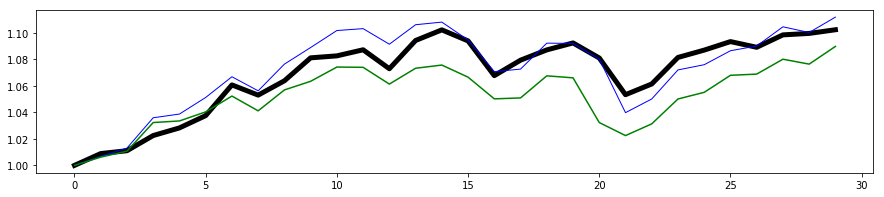

2008-10-02 00:00:00 2009-09-29 00:00:00
2009-10-01 00:00:00 2009-11-11 00:00:00
['TLT', 'GLD', 'DLTR', 'MKC', 'ATVI', 'SLV', 'STI', 'ABMD', 'USO', 'AMD']


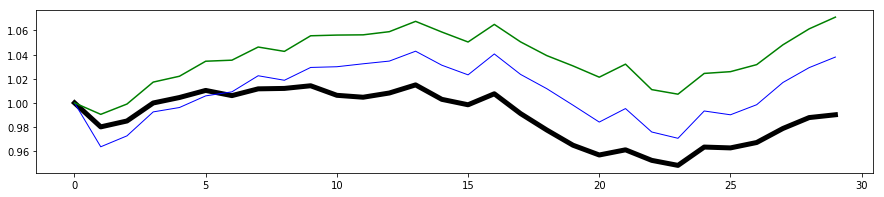

2008-10-30 00:00:00 2009-10-27 00:00:00
2009-10-29 00:00:00 2009-12-10 00:00:00
['TLT', 'MKC', 'DLTR', 'USO', 'SLV', 'ATVI', 'MO', 'LKQ', 'ADM', 'ABMD']


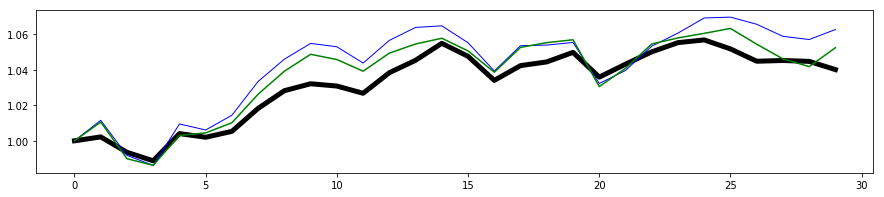

2008-11-28 00:00:00 2009-11-24 00:00:00
2009-11-27 00:00:00 2010-01-11 00:00:00
['TLT', 'GLD', 'ATVI', 'MKC', 'LKQ', 'MO', 'USO', 'ABMD', 'DLTR', 'NRG']


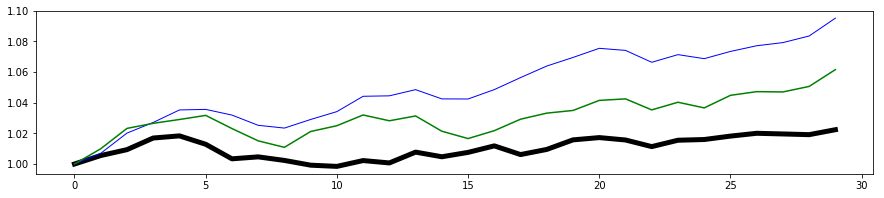

2008-12-29 00:00:00 2009-12-23 00:00:00
2009-12-28 00:00:00 2010-02-09 00:00:00
['TLT', 'GLD', 'DLTR', 'MKC', 'MO', 'ATVI', 'NRG', 'GIS', 'ABMD', 'MA']


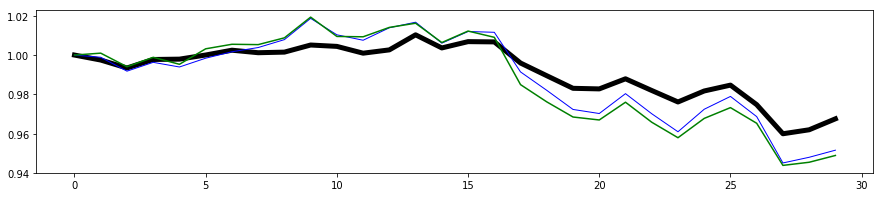

2009-01-28 00:00:00 2010-01-25 00:00:00
2010-01-27 00:00:00 2010-03-10 00:00:00
['TLT', 'GLD', 'DLTR', 'NRG', 'ATVI', 'MKC', 'GIS', 'LKQ', 'ABMD', 'MA']


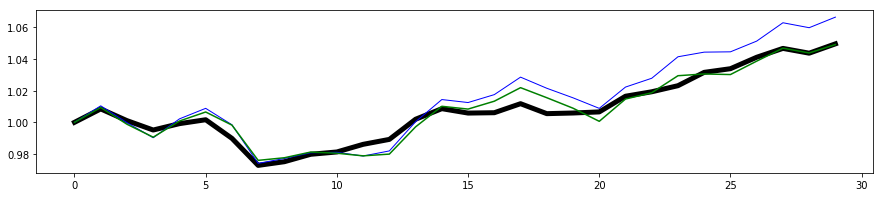

2009-02-26 00:00:00 2010-02-23 00:00:00
2010-02-25 00:00:00 2010-04-08 00:00:00
['TLT', 'GLD', 'DLTR', 'NRG', 'ATVI', 'GIS', 'ABMD', 'LKQ', 'MKC', 'MDLZ']


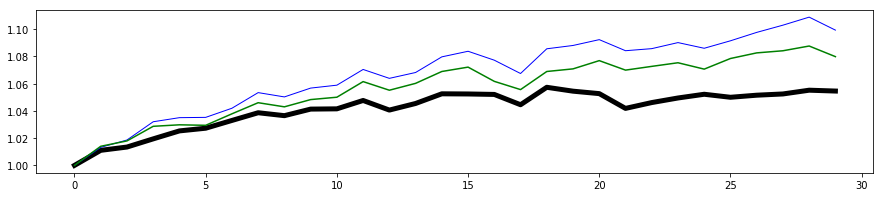

2009-03-26 00:00:00 2010-03-23 00:00:00
2010-03-25 00:00:00 2010-05-06 00:00:00
['TLT', 'WLTW', 'MA', 'DLTR', 'UNH', 'GLD', 'TTWO', 'AMZN', 'AAP', 'NRG']


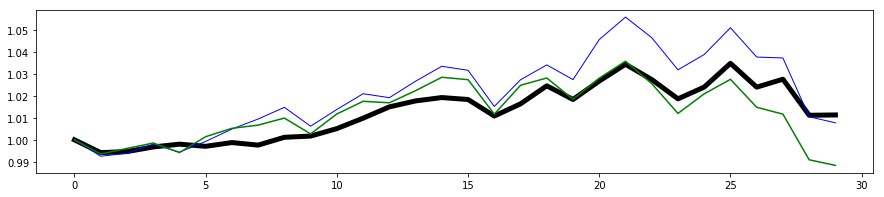

2009-04-24 00:00:00 2010-04-21 00:00:00
2010-04-23 00:00:00 2010-06-04 00:00:00
['TLT', 'TTWO', 'AAP', 'MDLZ', 'WLTW', 'ADM', 'UNH', 'TMUS', 'AMZN', 'MA']


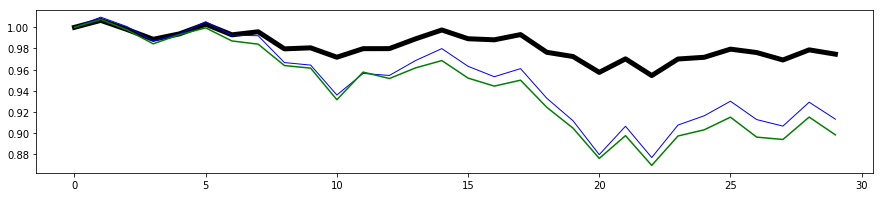

2009-05-22 00:00:00 2010-05-19 00:00:00
2010-05-21 00:00:00 2010-07-02 00:00:00
['TLT', 'MDLZ', 'TTWO', 'AAP', 'ADM', 'AMZN', 'AIG', 'TMUS', 'NRG', 'RMD']


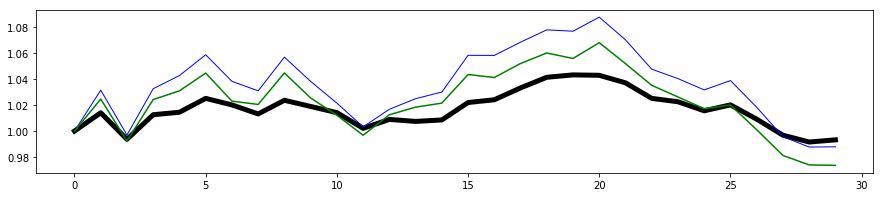

2009-06-22 00:00:00 2010-06-17 00:00:00
2010-06-21 00:00:00 2010-08-02 00:00:00
['TLT', 'MDLZ', 'GLD', 'HSY', 'RMD', 'TTWO', 'MA', 'AIG', 'NVR', 'ATVI']


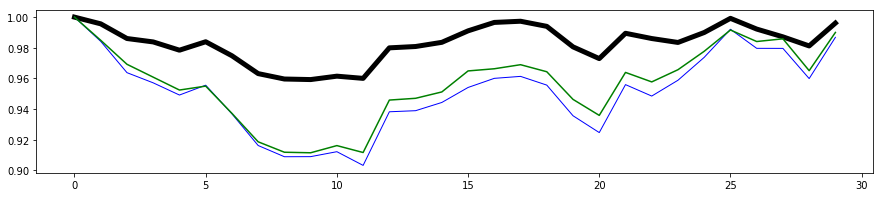

2009-07-21 00:00:00 2010-07-16 00:00:00
2010-07-20 00:00:00 2010-08-30 00:00:00
['TLT', 'GLD', 'MDLZ', 'RMD', 'MA', 'HSY', 'LUV', 'HRL', 'AAP', 'MNST']


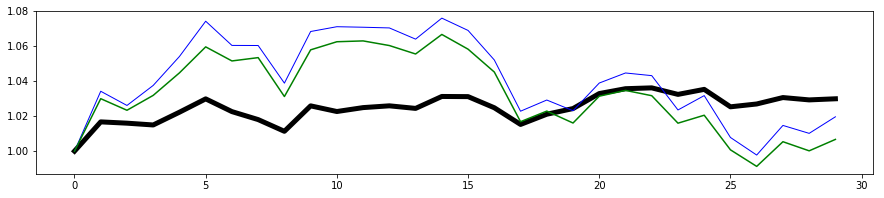

2009-08-18 00:00:00 2010-08-13 00:00:00
2010-08-17 00:00:00 2010-09-28 00:00:00
['TLT', 'GLD', 'MDLZ', 'RMD', 'TTWO', 'HSY', 'AAP', 'AMZN', 'AVGO', 'LDOS']


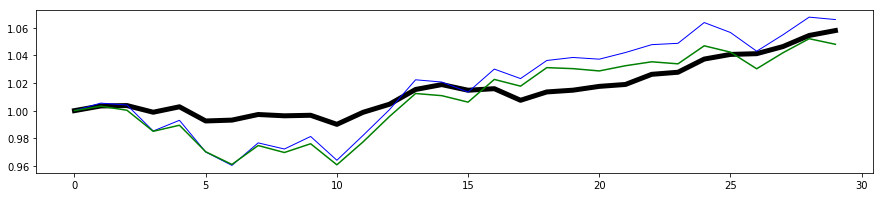

2009-09-16 00:00:00 2010-09-13 00:00:00
2010-09-15 00:00:00 2010-10-26 00:00:00
['TLT', 'TTWO', 'RMD', 'HSY', 'GLD', 'MDLZ', 'LDOS', 'AIG', 'AMZN', 'KR']


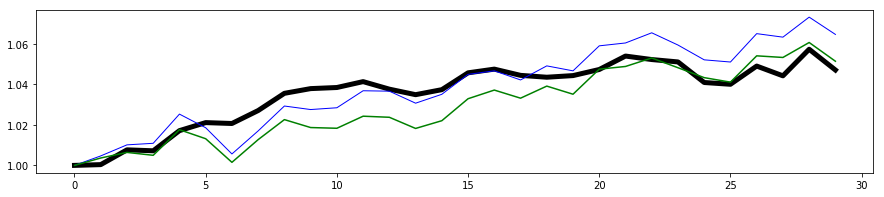

2009-10-14 00:00:00 2010-10-11 00:00:00
2010-10-13 00:00:00 2010-11-23 00:00:00
['TLT', 'VRSK', 'RMD', 'MDLZ', 'MOS', 'AIG', 'CHD', 'HSY', 'TTWO', 'BKNG']


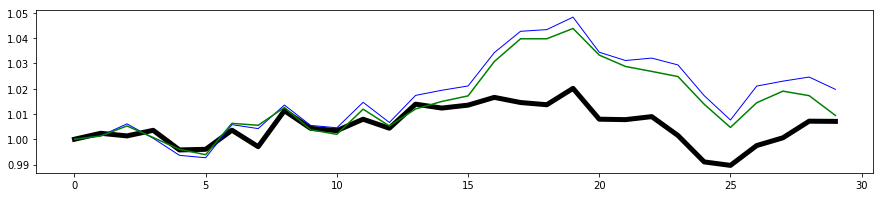

2009-11-11 00:00:00 2010-11-08 00:00:00
2010-11-10 00:00:00 2010-12-22 00:00:00
['TLT', 'VRSK', 'MOS', 'AIG', 'RMD', 'LDOS', 'KR', 'EW', 'UNH', 'AVGO']


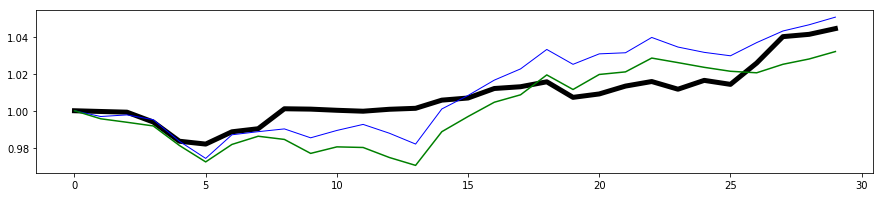

2009-12-10 00:00:00 2010-12-07 00:00:00
2010-12-09 00:00:00 2011-01-21 00:00:00
['TLT', 'VRSK', 'FTNT', 'LDOS', 'KR', 'AIG', 'MOS', 'RMD', 'BIIB', 'EW']


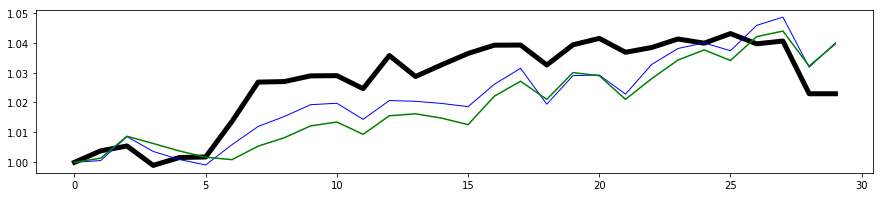

2010-01-11 00:00:00 2011-01-05 00:00:00
2011-01-07 00:00:00 2011-02-18 00:00:00
['TLT', 'FTNT', 'VRSK', 'LDOS', 'RMD', 'EW', 'KR', 'NKTR', 'MOS', 'AIG']


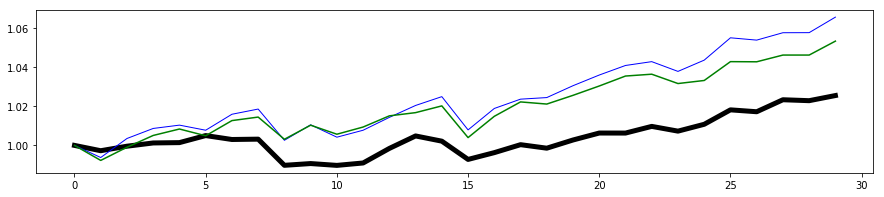

2010-02-09 00:00:00 2011-02-03 00:00:00
2011-02-07 00:00:00 2011-03-21 00:00:00
['TLT', 'CHTR', 'FTNT', 'BIIB', 'LDOS', 'MOS', 'DLTR', 'AIG', 'EW', 'FE']


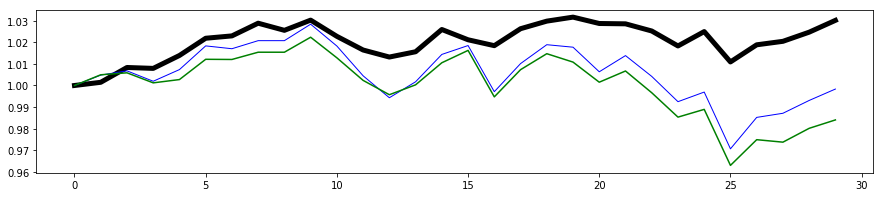

2010-03-10 00:00:00 2011-03-04 00:00:00
2011-03-08 00:00:00 2011-04-18 00:00:00
['TLT', 'CHTR', 'FTNT', 'BIIB', 'LDOS', 'FE', 'DG', 'RMD', 'EW', 'GLD']


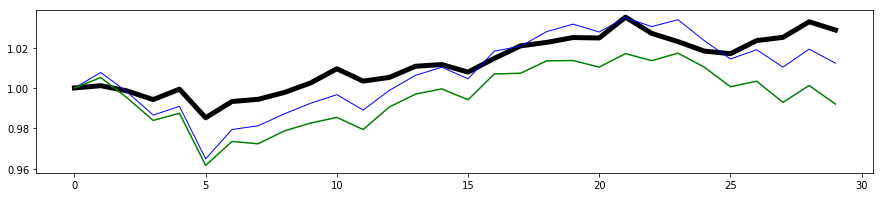

2010-04-08 00:00:00 2011-04-01 00:00:00
2011-04-05 00:00:00 2011-05-17 00:00:00
['TLT', 'FTNT', 'CHTR', 'LDOS', 'BIIB', 'FE', 'DG', 'RMD', 'EW', 'GLD']


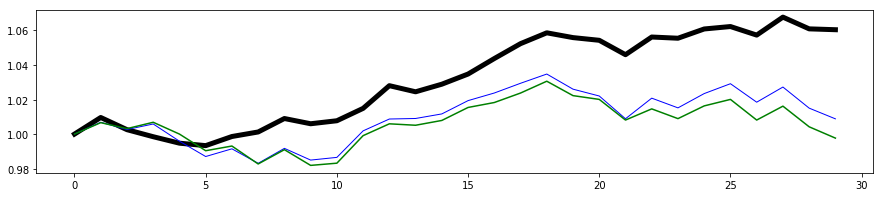

2010-05-06 00:00:00 2011-05-02 00:00:00
2011-05-04 00:00:00 2011-06-15 00:00:00
['TLT', 'CHTR', 'FTNT', 'EW', 'LDOS', 'BIIB', 'LYB', 'RMD', 'MOS', 'BMY']


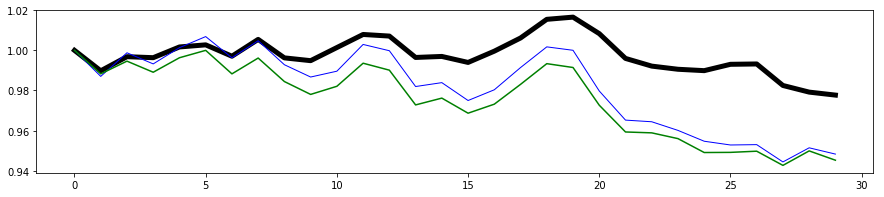

2010-06-04 00:00:00 2011-05-31 00:00:00
2011-06-02 00:00:00 2011-07-14 00:00:00
['TLT', 'CHTR', 'FTNT', 'LYB', 'NFLX', 'GILD', 'EW', 'USO', 'BIIB', 'BMY']


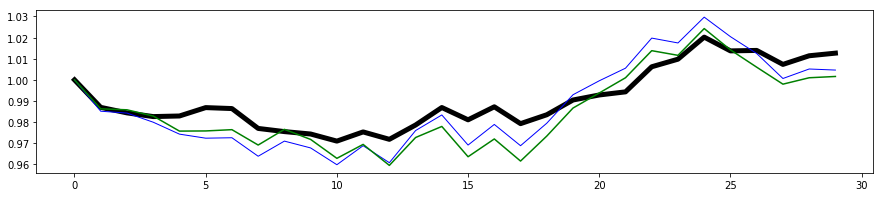

2010-07-02 00:00:00 2011-06-28 00:00:00
2011-06-30 00:00:00 2011-08-11 00:00:00
['TLT', 'CHTR', 'TSLA', 'CBOE', 'FTNT', 'EXC', 'GILD', 'NFLX', 'BIIB', 'USO']


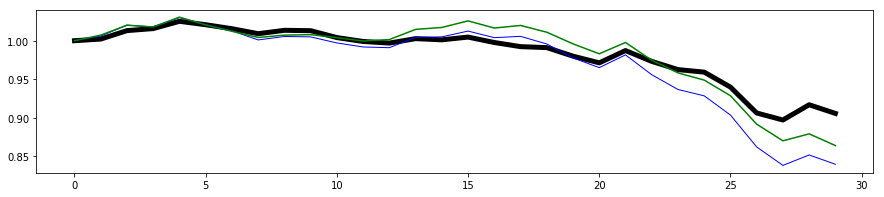

2010-08-02 00:00:00 2011-07-27 00:00:00
2011-07-29 00:00:00 2011-09-09 00:00:00
['TLT', 'CHTR', 'TSLA', 'EW', 'USO', 'EXC', 'FTNT', 'NFLX', 'GILD', 'BMY']


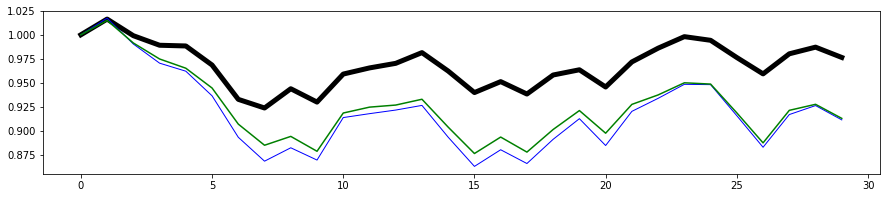

2010-08-30 00:00:00 2011-08-24 00:00:00
2011-08-26 00:00:00 2011-10-07 00:00:00
['TLT', 'GLD', 'EW', 'TSLA', 'VRSK', 'DG', 'BIIB', 'SO', 'FITB', 'EXC']


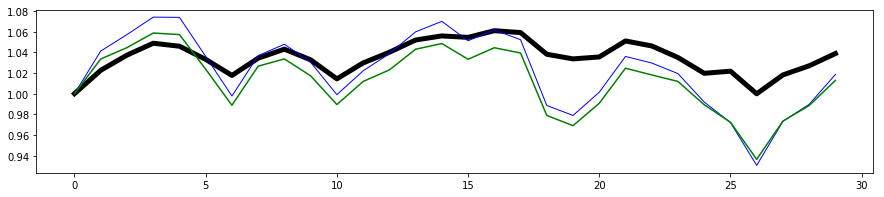

2010-09-28 00:00:00 2011-09-22 00:00:00
2011-09-26 00:00:00 2011-11-04 00:00:00
['TLT', 'GLD', 'EW', 'TSLA', 'MS', 'VRSK', 'EXC', 'NFLX', 'BIIB', 'DG']


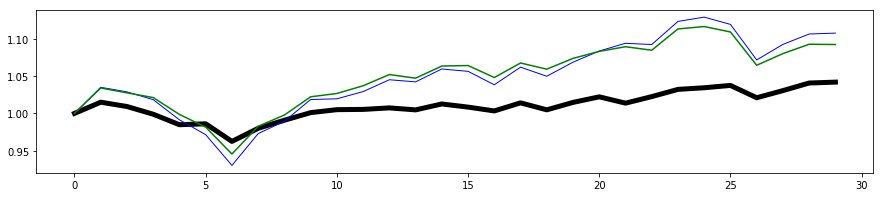

2010-10-26 00:00:00 2011-10-20 00:00:00
2011-10-24 00:00:00 2011-12-05 00:00:00
['TLT', 'GLD', 'MS', 'EW', 'EXC', 'VRSK', 'NFLX', 'USO', 'DG', 'TSLA']


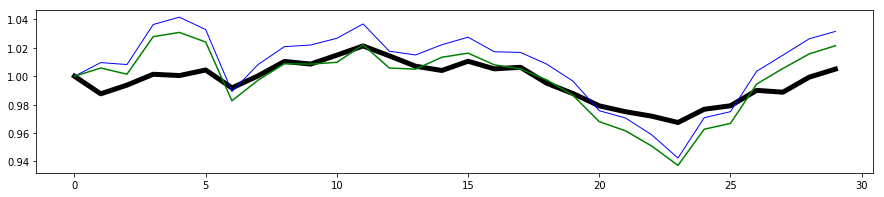

2010-11-23 00:00:00 2011-11-17 00:00:00
2011-11-21 00:00:00 2012-01-04 00:00:00
['TLT', 'GLD', 'MS', 'VRSK', 'BMY', 'EXC', 'USO', 'DG', 'EW', 'NVR']


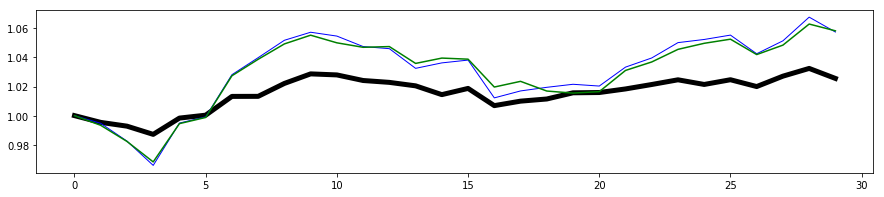

2010-12-22 00:00:00 2011-12-16 00:00:00
2011-12-20 00:00:00 2012-02-02 00:00:00
['TLT', 'GLD', 'EXC', 'VRSK', 'BMY', 'FLT', 'USO', 'MS', 'SO', 'GS']


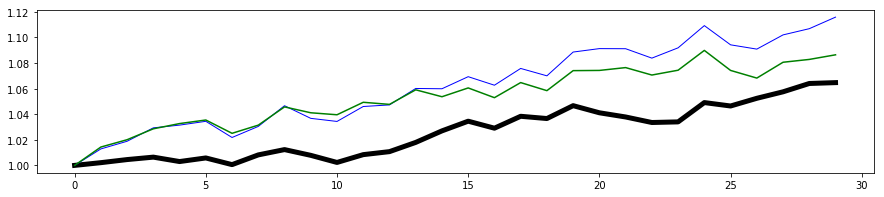

2011-01-21 00:00:00 2012-01-18 00:00:00
2012-01-20 00:00:00 2012-03-02 00:00:00
['TLT', 'GLD', 'VRSK', 'BMY', 'GS', 'USO', 'EXC', 'FLT', 'IPGP', 'CTL']


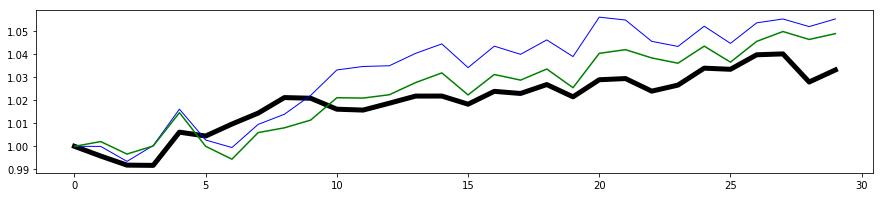

2011-02-18 00:00:00 2012-02-15 00:00:00
2012-02-17 00:00:00 2012-03-30 00:00:00
['TLT', 'GLD', 'BMY', 'SO', 'VRSK', 'NLSN', 'GS', 'KMI', 'CPB', 'DISH']


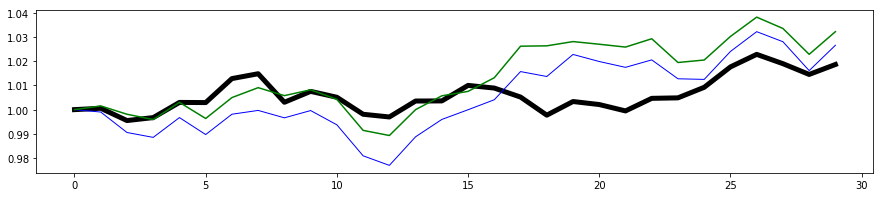

2011-03-21 00:00:00 2012-03-15 00:00:00
2012-03-19 00:00:00 2012-04-30 00:00:00
['TLT', 'GLD', 'NLSN', 'NVR', 'BMY', 'GS', 'CPB', 'VRSK', 'USO', 'DISH']


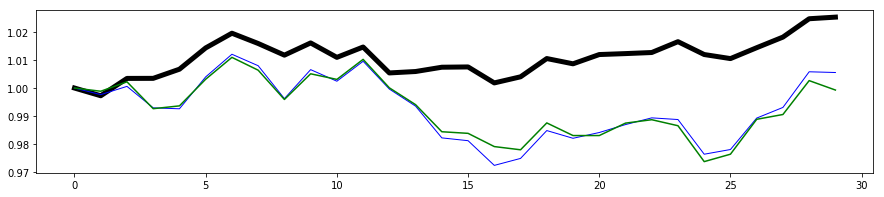

2011-04-18 00:00:00 2012-04-13 00:00:00
2012-04-17 00:00:00 2012-05-29 00:00:00
['TLT', 'GLD', 'NLSN', 'CPB', 'NVR', 'VRSK', 'LNC', 'BMY', 'SO', 'GS']


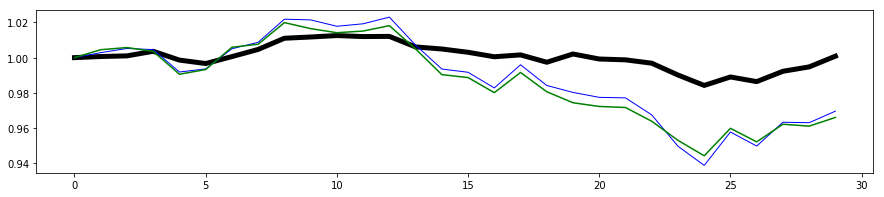

2011-05-17 00:00:00 2012-05-11 00:00:00
2012-05-15 00:00:00 2012-06-26 00:00:00
['TLT', 'GLD', 'NLSN', 'CPB', 'LNC', 'IPGP', 'NVR', 'SO', 'BMY', 'VRSK']


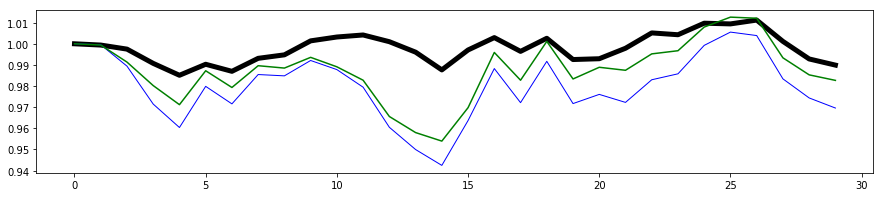

2011-06-15 00:00:00 2012-06-11 00:00:00
2012-06-13 00:00:00 2012-07-25 00:00:00
['TLT', 'GLD', 'NLSN', 'CPB', 'SO', 'IPGP', 'LNC', 'NVR', 'BMY', 'AAL']


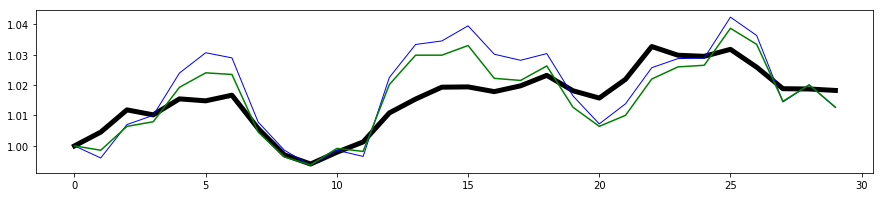

2011-07-14 00:00:00 2012-07-10 00:00:00
2012-07-12 00:00:00 2012-08-22 00:00:00
['TLT', 'GLD', 'NLSN', 'NVR', 'SO', 'LNC', 'CPB', 'BMY', 'IPGP', 'DISH']


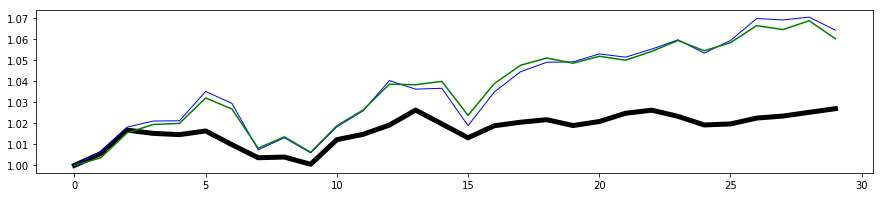

2011-08-11 00:00:00 2012-08-07 00:00:00
2012-08-09 00:00:00 2012-09-20 00:00:00
['TLT', 'NLSN', 'LNC', 'GLD', 'CTL', 'IPGP', 'NVR', 'CPB', 'DG', 'DUK']


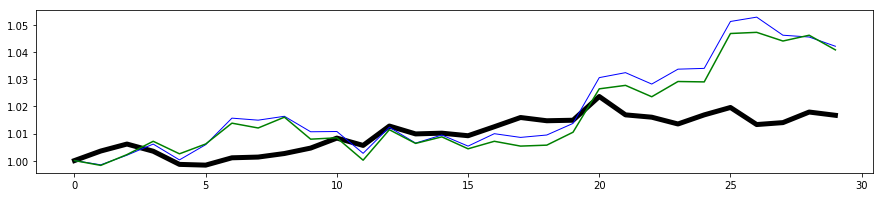

2011-09-09 00:00:00 2012-09-05 00:00:00
2012-09-07 00:00:00 2012-10-18 00:00:00
['TLT', 'NLSN', 'CPB', 'IPGP', 'DG', 'LNC', 'VZ', 'RE', 'AAL', 'IPG']


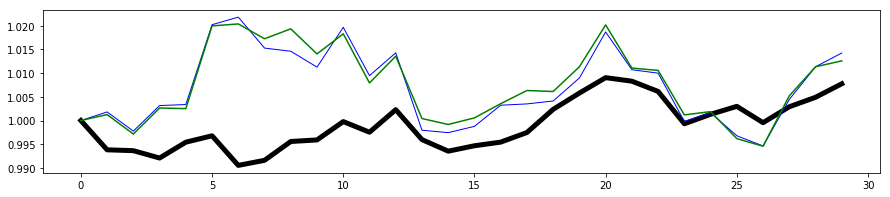

2011-10-07 00:00:00 2012-10-03 00:00:00
2012-10-05 00:00:00 2012-11-19 00:00:00
['TLT', 'NLSN', 'IPGP', 'CHD', 'ANTM', 'DISH', 'AAL', 'RE', 'HES', 'EXC']


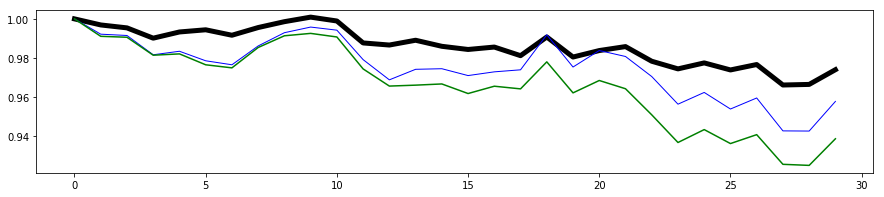

2011-11-04 00:00:00 2012-11-02 00:00:00
2012-11-06 00:00:00 2012-12-18 00:00:00
['TLT', 'NLSN', 'AAL', 'RE', 'PXD', 'COST', 'CPB', 'PFE', 'WLTW', 'DG']


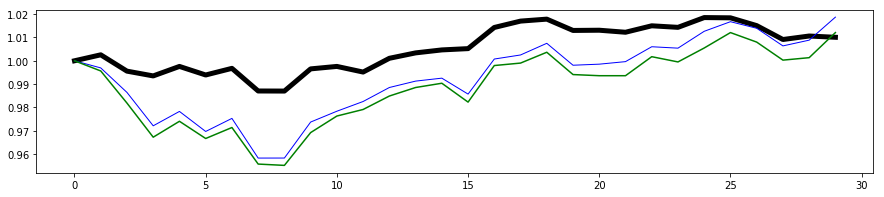

2011-12-05 00:00:00 2012-12-03 00:00:00
2012-12-05 00:00:00 2013-01-17 00:00:00
['TLT', 'NLSN', 'TMUS', 'PFE', 'AAL', 'COST', 'DLTR', 'ANTM', 'PXD', 'MNST']


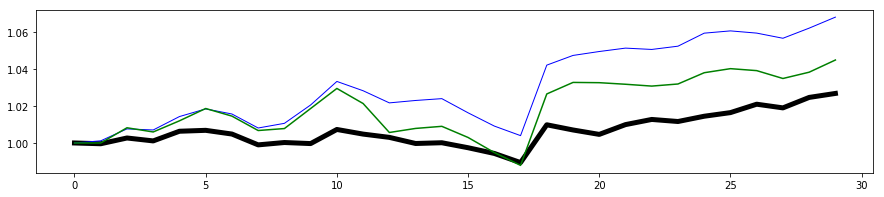

2012-01-04 00:00:00 2013-01-02 00:00:00
2013-01-04 00:00:00 2013-02-15 00:00:00
['TLT', 'NLSN', 'DLTR', 'ANTM', 'PFE', 'CNC', 'MNST', 'WLTW', 'DUK', 'ICE']


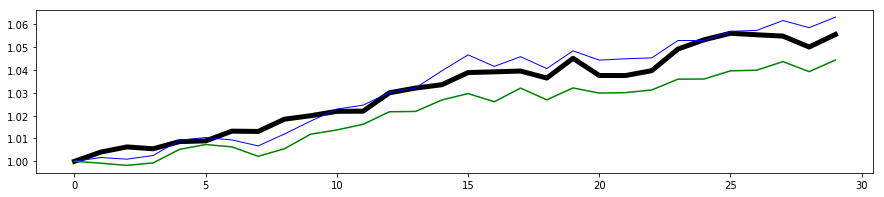

2012-02-02 00:00:00 2013-01-31 00:00:00
2013-02-04 00:00:00 2013-03-18 00:00:00
['TLT', 'NLSN', 'WLTW', 'ANTM', 'PFE', 'ILMN', 'DLTR', 'CNC', 'AAL', 'TMUS']


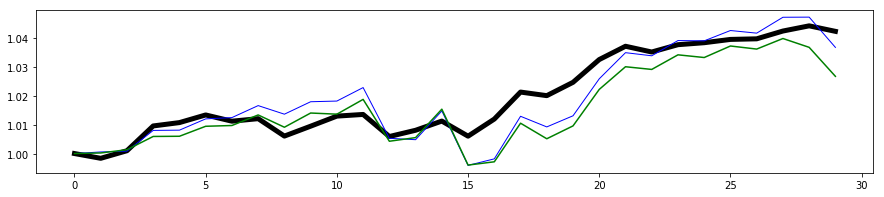

2012-03-02 00:00:00 2013-03-01 00:00:00
2013-03-05 00:00:00 2013-04-16 00:00:00
['TLT', 'ANTM', 'TMUS', 'NLSN', 'DLTR', 'MNST', 'PGR', 'PXD', 'AAL', 'VAR']


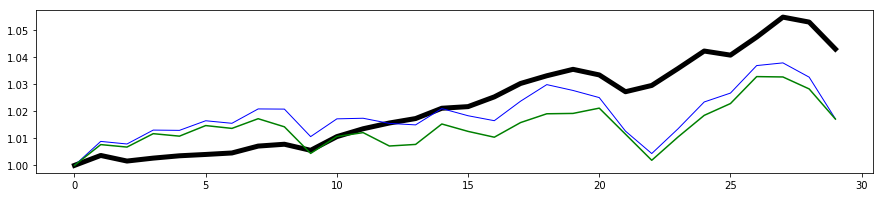

2012-03-30 00:00:00 2013-04-01 00:00:00
2013-04-03 00:00:00 2013-05-14 00:00:00
['TLT', 'PXD', 'TMUS', 'MNST', 'NLSN', 'DLTR', 'AAL', 'SPGI', 'CNC', 'FRC']


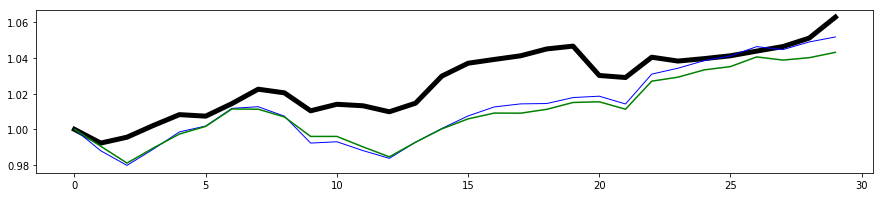

2012-04-30 00:00:00 2013-04-29 00:00:00
2013-05-01 00:00:00 2013-06-12 00:00:00
['TLT', 'TMUS', 'PXD', 'MNST', 'NFLX', 'NLSN', 'SPGI', 'COST', 'FRC', 'VZ']


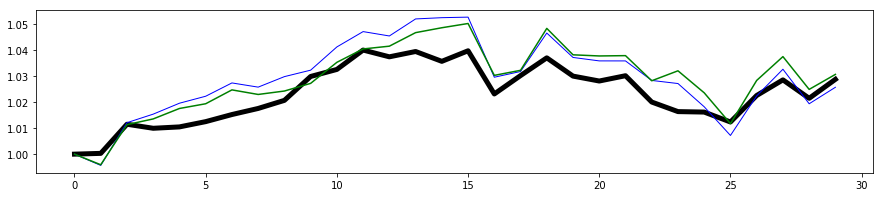

2012-05-29 00:00:00 2013-05-28 00:00:00
2013-05-30 00:00:00 2013-07-11 00:00:00
['TLT', 'MNST', 'PXD', 'TRIP', 'CNC', 'HFC', 'NLSN', 'TMUS', 'APA', 'TSLA']


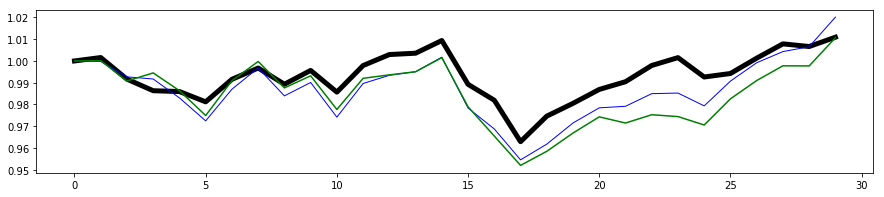

2012-06-26 00:00:00 2013-06-25 00:00:00
2013-06-27 00:00:00 2013-08-08 00:00:00
['TLT', 'MNST', 'TMUS', 'TDG', 'HFC', 'HUM', 'DISH', 'TSLA', 'TRIP', 'FB']


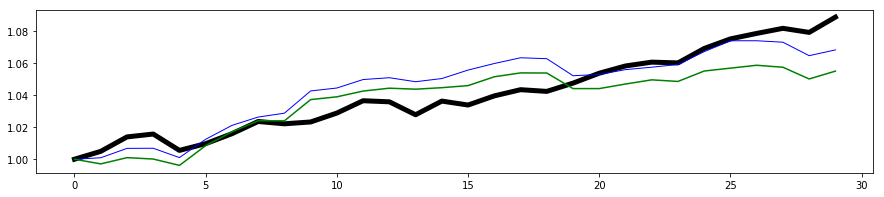

2012-07-25 00:00:00 2013-07-24 00:00:00
2013-07-26 00:00:00 2013-09-06 00:00:00
['TLT', 'TRIP', 'MNST', 'DISH', 'HFC', 'HUM', 'TMUS', 'SPGI', 'TDG', 'FRC']


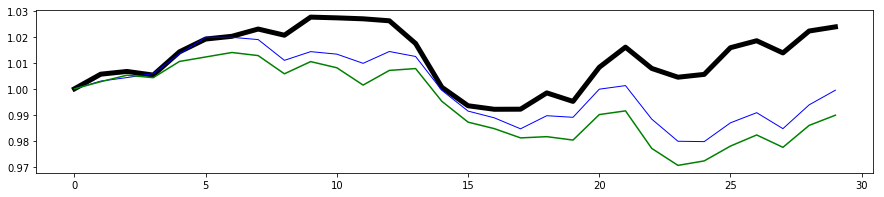

2012-08-22 00:00:00 2013-08-21 00:00:00
2013-08-23 00:00:00 2013-10-04 00:00:00
['TLT', 'DISH', 'MNST', 'FB', 'HUM', 'TRIP', 'KSS', 'HFC', 'TSLA', 'HPQ']


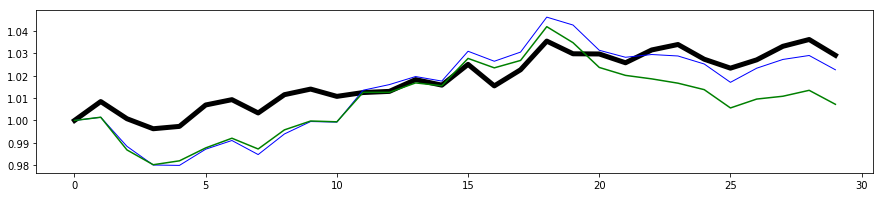

2012-09-20 00:00:00 2013-09-19 00:00:00
2013-09-23 00:00:00 2013-11-01 00:00:00
['TLT', 'HUM', 'MNST', 'DISH', 'TSLA', 'KSS', 'TDG', 'FB', 'CTSH', 'HPQ']


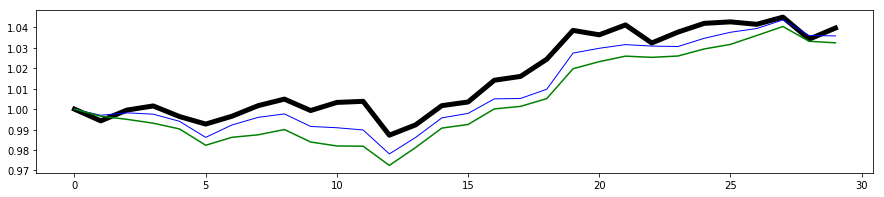

2012-10-18 00:00:00 2013-10-17 00:00:00
2013-10-21 00:00:00 2013-12-02 00:00:00
['TLT', 'MNST', 'TSLA', 'HUM', 'TDG', 'HPQ', 'DISH', 'KSS', 'AAPL', 'CTSH']


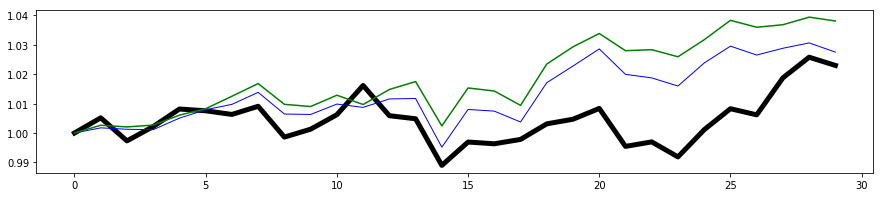

2012-11-19 00:00:00 2013-11-14 00:00:00
2013-11-18 00:00:00 2013-12-31 00:00:00
['TLT', 'TSLA', 'MNST', 'TDG', 'AAPL', 'HUM', 'HPQ', 'HFC', 'DISH', 'CTSH']


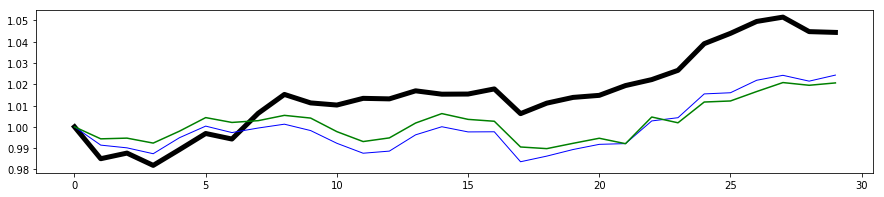

2012-12-18 00:00:00 2013-12-13 00:00:00
2013-12-17 00:00:00 2014-01-30 00:00:00
['TLT', 'TSLA', 'HUM', 'HPQ', 'HFC', 'TDG', 'HOLX', 'AAPL', 'CTSH', 'KSS']


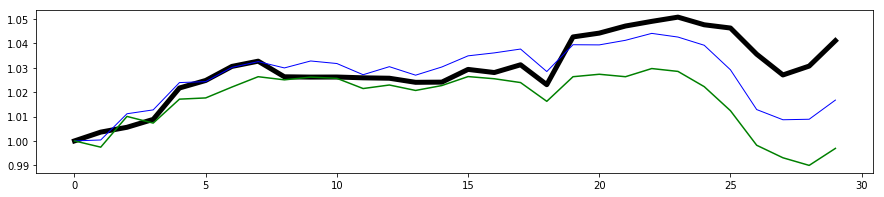

2013-01-17 00:00:00 2014-01-14 00:00:00
2014-01-16 00:00:00 2014-02-28 00:00:00
['TLT', 'TSLA', 'HFC', 'HUM', 'HPQ', 'TDG', 'AAPL', 'CTSH', 'MNST', 'DISH']


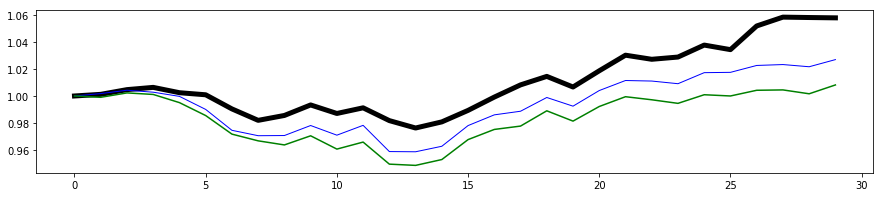

2013-02-15 00:00:00 2014-02-12 00:00:00
2014-02-14 00:00:00 2014-03-28 00:00:00
['TLT', 'TSLA', 'HFC', 'HUM', 'ZTS', 'AAPL', 'HPQ', 'TDG', 'CHTR', 'MNST']


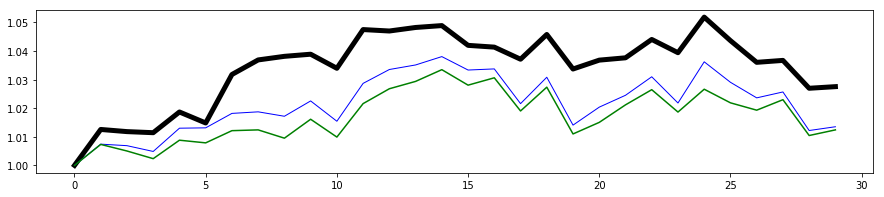

2013-03-18 00:00:00 2014-03-13 00:00:00
2014-03-17 00:00:00 2014-04-28 00:00:00
['TLT', 'AMCR', 'HFC', 'TSLA', 'ZTS', 'AAPL', 'CHTR', 'HUM', 'TDG', 'GLD']


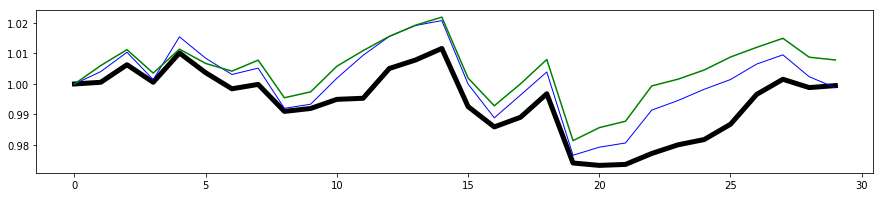

2013-04-16 00:00:00 2014-04-10 00:00:00
2014-04-14 00:00:00 2014-05-27 00:00:00
['TLT', 'HFC', 'ZTS', 'TDG', 'CHTR', 'GLD', 'HPQ', 'TSLA', 'HUM', 'AAPL']


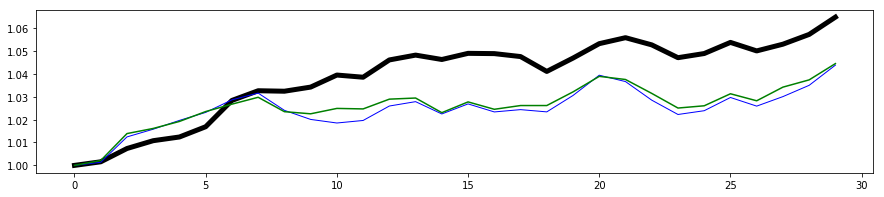

2013-05-14 00:00:00 2014-05-09 00:00:00
2014-05-13 00:00:00 2014-06-24 00:00:00
['TLT', 'HFC', 'ZTS', 'GLD', 'TDG', 'HPQ', 'CHTR', 'PEP', 'AAPL', 'TSLA']


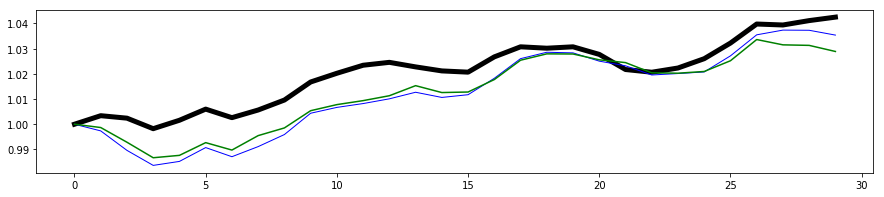

2013-06-12 00:00:00 2014-06-09 00:00:00
2014-06-11 00:00:00 2014-07-23 00:00:00
['TLT', 'COTY', 'GLD', 'HFC', 'HPQ', 'PEP', 'TDG', 'IQV', 'CHTR', 'AAPL']


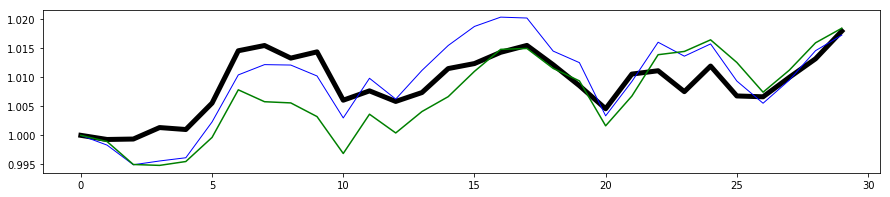

2013-07-11 00:00:00 2014-07-08 00:00:00
2014-07-10 00:00:00 2014-08-20 00:00:00
['TLT', 'COTY', 'AAPL', 'HPQ', 'GLD', 'USO', 'PEP', 'COG', 'HFC', 'IQV']


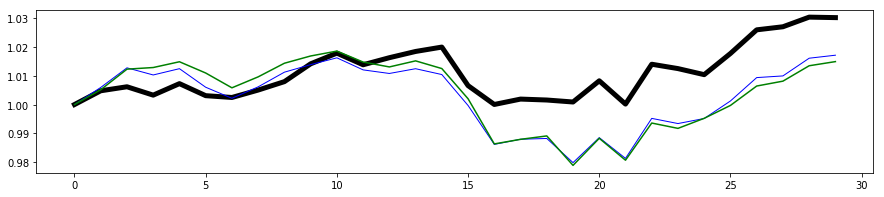

2013-08-08 00:00:00 2014-08-05 00:00:00
2014-08-07 00:00:00 2014-09-18 00:00:00
['TLT', 'COTY', 'GLD', 'HFC', 'HPQ', 'AAPL', 'IQV', 'COG', 'PEP', 'USO']


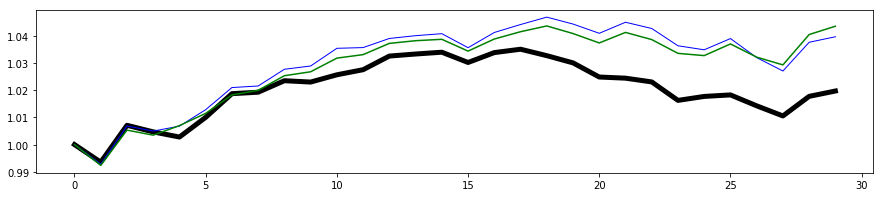

2013-09-06 00:00:00 2014-09-03 00:00:00
2014-09-05 00:00:00 2014-10-16 00:00:00
['TLT', 'HFC', 'IQV', 'GLD', 'PEP', 'COG', 'COTY', 'HPQ', 'ISRG', 'USO']


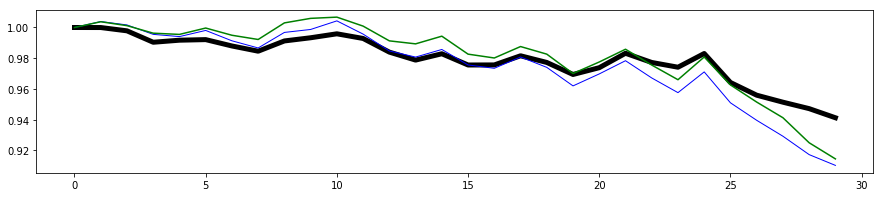

2013-10-04 00:00:00 2014-10-01 00:00:00
2014-10-03 00:00:00 2014-11-13 00:00:00
['TLT', 'GLD', 'HPQ', 'HFC', 'EW', 'IPGP', 'NVR', 'USO', 'PEP', 'ICE']


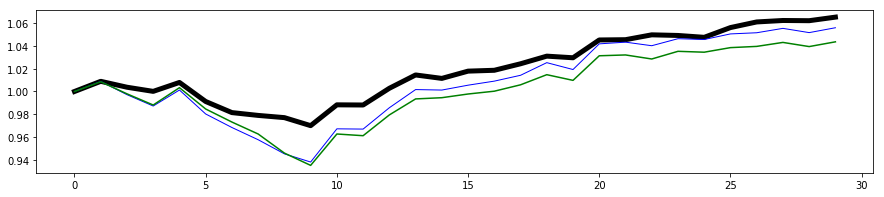

2013-11-01 00:00:00 2014-10-29 00:00:00
2014-10-31 00:00:00 2014-12-12 00:00:00
['TLT', 'ICE', 'GLD', 'COTY', 'IPGP', 'HFC', 'IQV', 'AVB', 'BBY', 'COG']


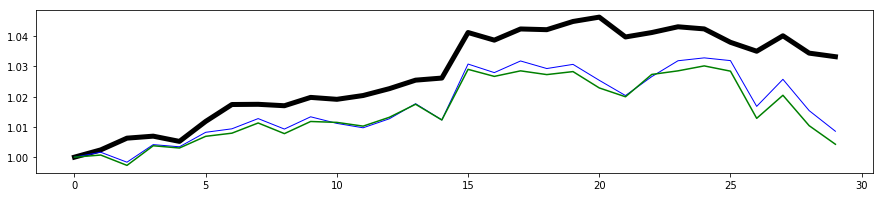

2013-12-02 00:00:00 2014-11-26 00:00:00
2014-12-01 00:00:00 2015-01-13 00:00:00
['TLT', 'COTY', 'USO', 'ICE', 'ETR', 'AVB', 'GLD', 'EW', 'ALLE', 'SYMC']


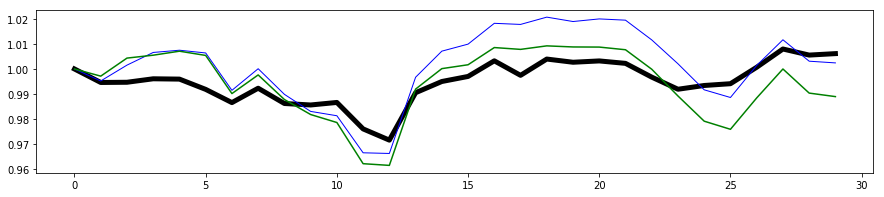

2013-12-31 00:00:00 2014-12-26 00:00:00
2014-12-30 00:00:00 2015-02-11 00:00:00
['TLT', 'AMCR', 'USO', 'AVB', 'COTY', 'GLD', 'PEP', 'ROST', 'ICE', 'ALLE']


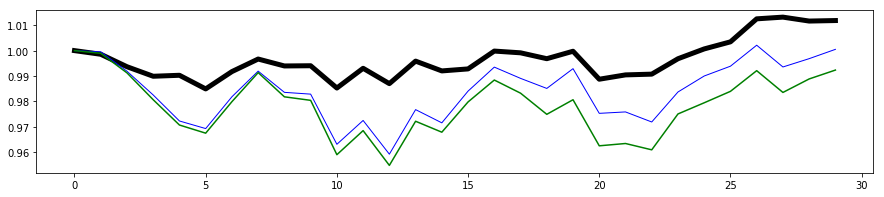

2014-01-30 00:00:00 2015-01-27 00:00:00
2015-01-29 00:00:00 2015-03-12 00:00:00
['TLT', 'AMCR', 'USO', 'COTY', 'AVB', 'GLD', 'ROST', 'CME', 'DLTR', 'IQV']


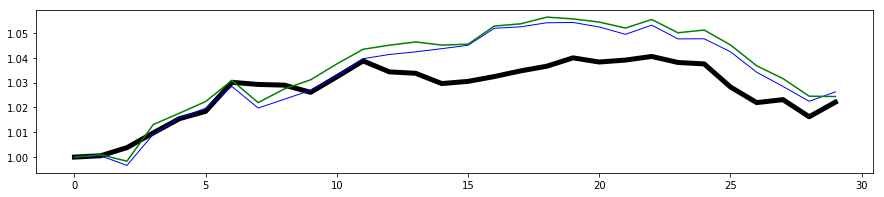

2014-02-28 00:00:00 2015-02-25 00:00:00
2015-02-27 00:00:00 2015-04-10 00:00:00
['TLT', 'USO', 'COTY', 'GLD', 'CLX', 'BMY', 'AVB', 'CBOE', 'LDOS', 'UAL']


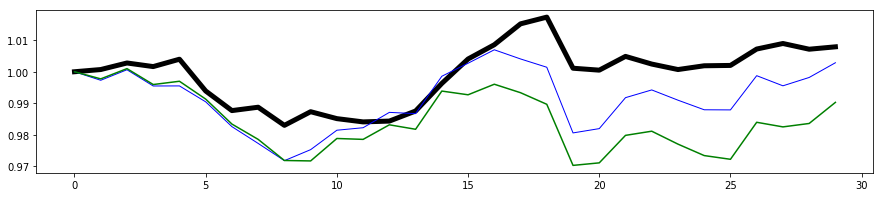

2014-03-28 00:00:00 2015-03-25 00:00:00
2015-03-27 00:00:00 2015-05-08 00:00:00
['TLT', 'USO', 'COTY', 'CBOE', 'GLD', 'CLX', 'DLTR', 'IQV', 'UAL', 'EXPD']


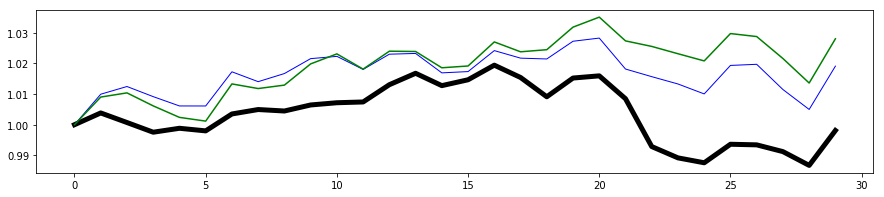

2014-04-28 00:00:00 2015-04-23 00:00:00
2015-04-27 00:00:00 2015-06-08 00:00:00
['TLT', 'USO', 'CBOE', 'COTY', 'UAL', 'MAC', 'GLD', 'WYNN', 'COO', 'CLX']


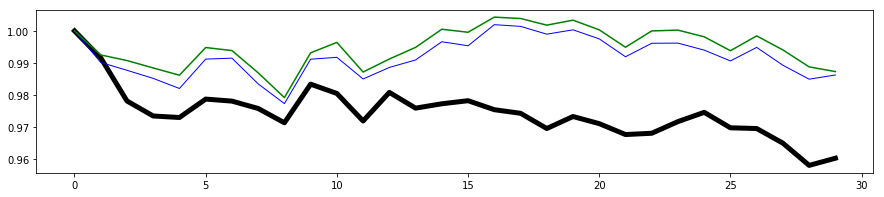

2014-05-27 00:00:00 2015-05-21 00:00:00
2015-05-26 00:00:00 2015-07-07 00:00:00
['TLT', 'USO', 'GLD', 'CBOE', 'WYNN', 'COTY', 'UAL', 'MAC', 'COO', 'KO']


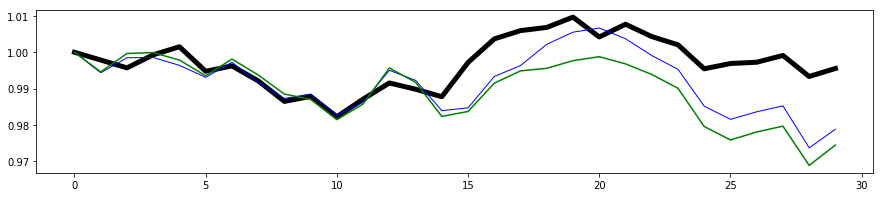

2014-06-24 00:00:00 2015-06-19 00:00:00
2015-06-23 00:00:00 2015-08-04 00:00:00
['TLT', 'USO', 'CBOE', 'ANET', 'WYNN', 'GLD', 'UAL', 'COTY', 'MAC', 'KO']


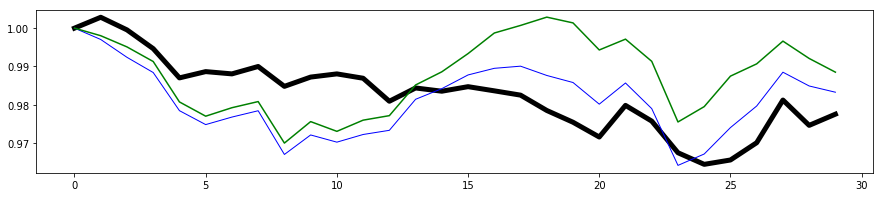

2014-07-23 00:00:00 2015-07-20 00:00:00
2015-07-22 00:00:00 2015-09-01 00:00:00
['TLT', 'USO', 'CBOE', 'UAL', 'WYNN', 'GLD', 'ANET', 'MAC', 'CMA', 'COTY']


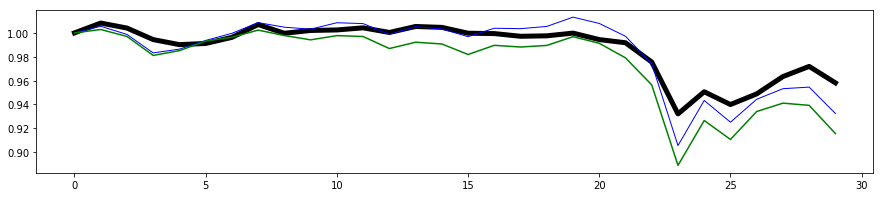

2014-08-20 00:00:00 2015-08-17 00:00:00
2015-08-19 00:00:00 2015-09-30 00:00:00
['TLT', 'USO', 'CBOE', 'GLD', 'WYNN', 'UAL', 'MAC', 'TAP', 'COTY', 'HAS']


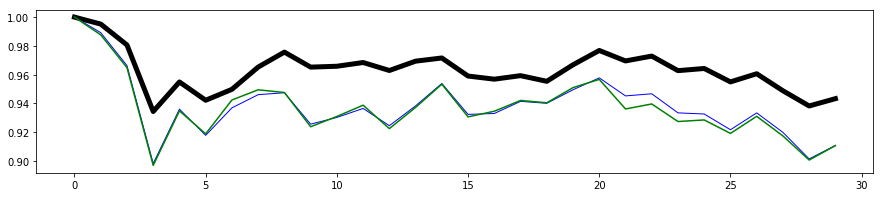

2014-09-18 00:00:00 2015-09-15 00:00:00
2015-09-17 00:00:00 2015-10-28 00:00:00
['TLT', 'USO', 'CBOE', 'UAL', 'GLD', 'WYNN', 'COTY', 'TAP', 'INFO', 'MAC']


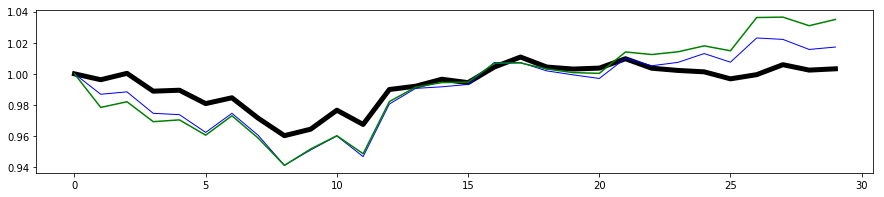

2014-10-16 00:00:00 2015-10-13 00:00:00
2015-10-15 00:00:00 2015-11-25 00:00:00
['TLT', 'USO', 'CBOE', 'ANET', 'GLD', 'TAP', 'SYF', 'COTY', 'MAC', 'INFO']


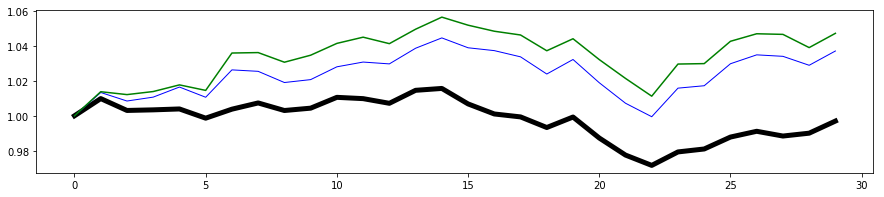

2014-11-13 00:00:00 2015-11-10 00:00:00
2015-11-12 00:00:00 2015-12-24 00:00:00
['TLT', 'USO', 'CBOE', 'GLD', 'SYF', 'ANET', 'TAP', 'EXPD', 'UAL', 'MO']


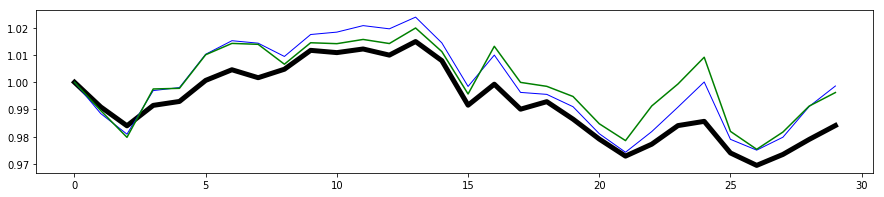

2014-12-12 00:00:00 2015-12-09 00:00:00
2015-12-11 00:00:00 2016-01-26 00:00:00
['TLT', 'USO', 'GLD', 'CBOE', 'ANET', 'MKTX', 'TAP', 'CF', 'COTY', 'SYF']


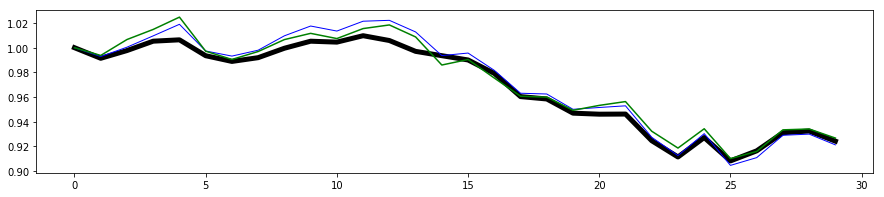

2015-01-13 00:00:00 2016-01-08 00:00:00
2016-01-12 00:00:00 2016-02-24 00:00:00
['TLT', 'USO', 'CBOE', 'ANET', 'GLD', 'CF', 'TAP', 'COTY', 'UAL', 'SYF']


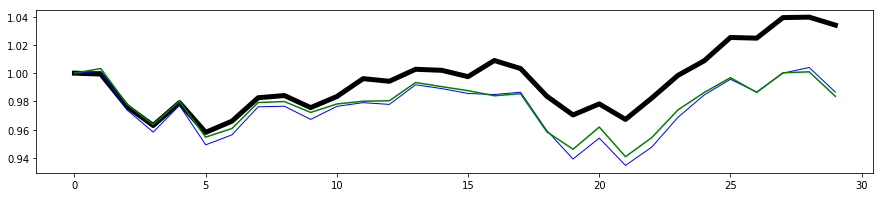

2015-02-11 00:00:00 2016-02-08 00:00:00
2016-02-10 00:00:00 2016-03-23 00:00:00
['TLT', 'GLD', 'USO', 'CF', 'CBOE', 'ANET', 'EA', 'RMD', 'SYF', 'TAP']


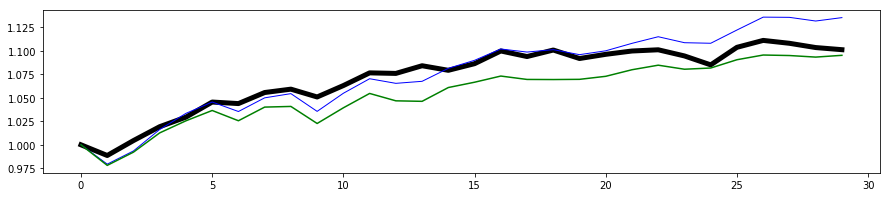

2015-03-12 00:00:00 2016-03-08 00:00:00
2016-03-10 00:00:00 2016-04-21 00:00:00
['TLT', 'GLD', 'USO', 'CBOE', 'CF', 'RMD', 'COTY', 'EA', 'ANET', 'NFLX']


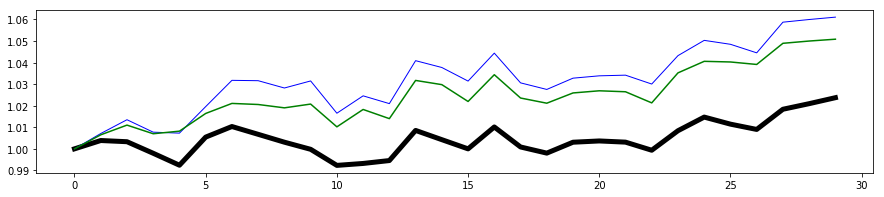

2015-04-10 00:00:00 2016-04-06 00:00:00
2016-04-08 00:00:00 2016-05-19 00:00:00
['TLT', 'GLD', 'EA', 'CBOE', 'CFG', 'CF', 'USO', 'CI', 'RMD', 'DLTR']


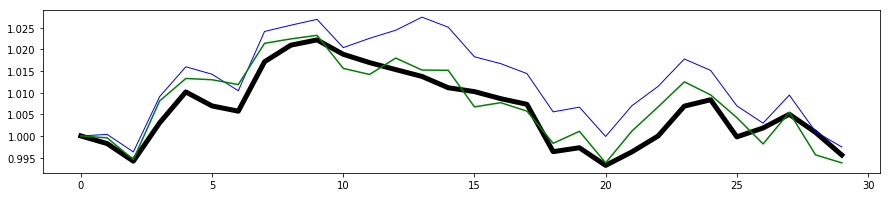

2015-05-08 00:00:00 2016-05-04 00:00:00
2016-05-06 00:00:00 2016-06-17 00:00:00
['TLT', 'GLD', 'CBOE', 'USO', 'RMD', 'CFG', 'CI', 'EA', 'DLTR', 'MO']


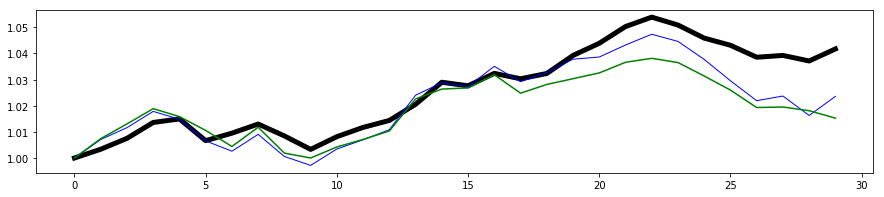

2015-06-08 00:00:00 2016-06-02 00:00:00
2016-06-06 00:00:00 2016-07-18 00:00:00
['TLT', 'GLD', 'USO', 'RMD', 'CFG', 'CBOE', 'EA', 'TGT', 'CF', 'DLTR']


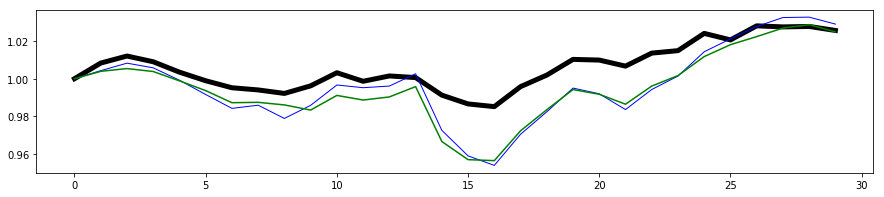

2015-07-07 00:00:00 2016-06-30 00:00:00
2016-07-05 00:00:00 2016-08-15 00:00:00
['TLT', 'GLD', 'USO', 'RMD', 'TGT', 'CFG', 'AMD', 'EA', 'CBOE', 'PRGO']


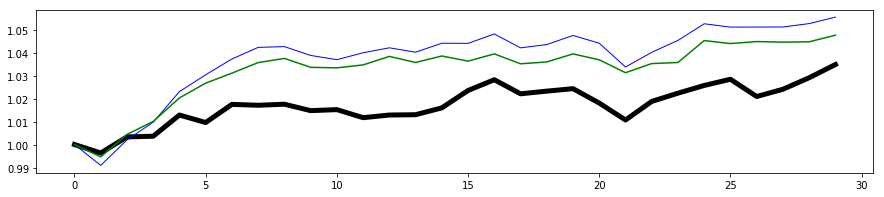

2015-08-04 00:00:00 2016-07-29 00:00:00
2016-08-02 00:00:00 2016-09-13 00:00:00
['TLT', 'GLD', 'USO', 'CFG', 'TGT', 'CBOE', 'RMD', 'MO', 'PRGO', 'AMD']


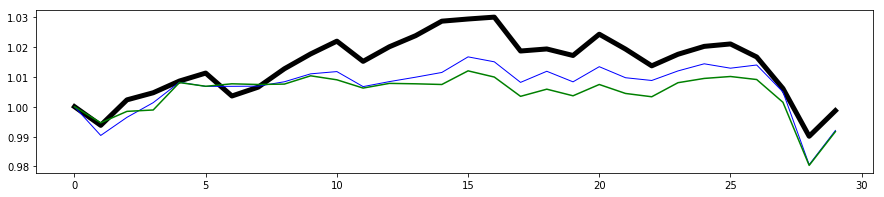

2015-09-01 00:00:00 2016-08-26 00:00:00
2016-08-30 00:00:00 2016-10-11 00:00:00
['TLT', 'GLD', 'CFG', 'USO', 'PRGO', 'RMD', 'CBOE', 'DLTR', 'CF', 'VLO']


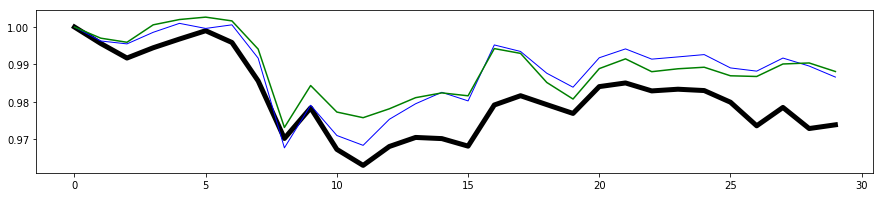

2015-09-30 00:00:00 2016-09-26 00:00:00
2016-09-28 00:00:00 2016-11-08 00:00:00
['TLT', 'GLD', 'CFG', 'KR', 'CF', 'PRGO', 'EA', 'USO', 'RMD', 'TGT']


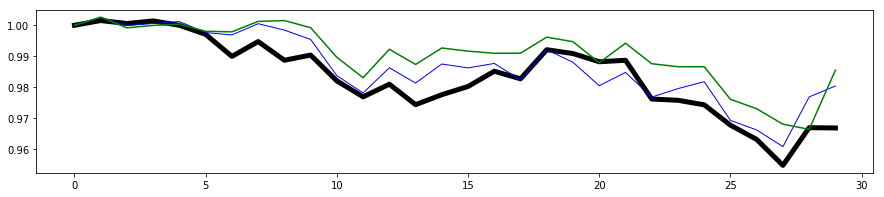

2015-10-28 00:00:00 2016-10-24 00:00:00
2016-10-26 00:00:00 2016-12-07 00:00:00
['TLT', 'GLD', 'KR', 'CFG', 'CBOE', 'EXR', 'CF', 'EA', 'TWTR', 'AGN']


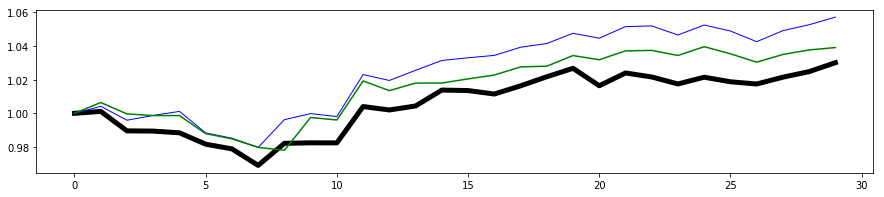

2015-11-25 00:00:00 2016-11-21 00:00:00
2016-11-23 00:00:00 2017-01-06 00:00:00
['TLT', 'GLD', 'KR', 'CFG', 'CBOE', 'AGN', 'TWTR', 'KSS', 'CF', 'CMG']


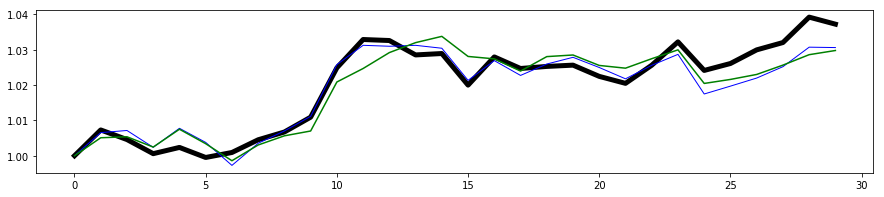

2015-12-24 00:00:00 2016-12-20 00:00:00
2016-12-22 00:00:00 2017-02-06 00:00:00
['TLT', 'GLD', 'KR', 'BAC', 'CMG', 'EVRG', 'CFG', 'AGN', 'CBOE', 'GWW']


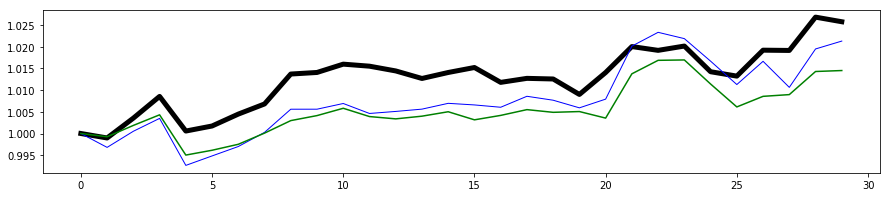

2016-01-26 00:00:00 2017-01-20 00:00:00
2017-01-24 00:00:00 2017-03-07 00:00:00
['TLT', 'GLD', 'KR', 'EVRG', 'CBOE', 'AGN', 'BAC', 'CFG', 'GWW', 'TWTR']


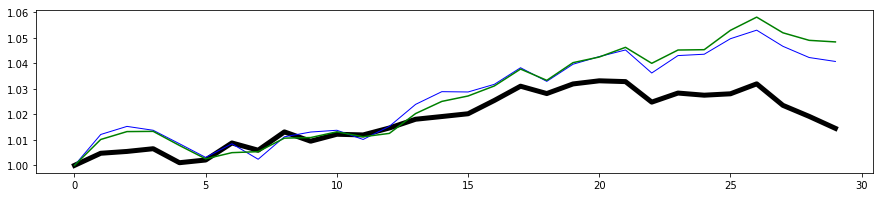

2016-02-24 00:00:00 2017-02-17 00:00:00
2017-02-22 00:00:00 2017-04-04 00:00:00
['TLT', 'KR', 'GLD', 'EVRG', 'BAC', 'CBOE', 'AGN', 'TWTR', 'MET', 'HUM']


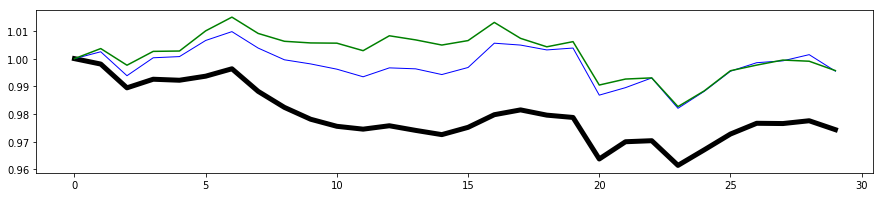

2016-03-23 00:00:00 2017-03-20 00:00:00
2017-03-22 00:00:00 2017-05-03 00:00:00
['TLT', 'GLD', 'KR', 'MET', 'NBL', 'CMG', 'EVRG', 'AGN', 'TWTR', 'HUM']


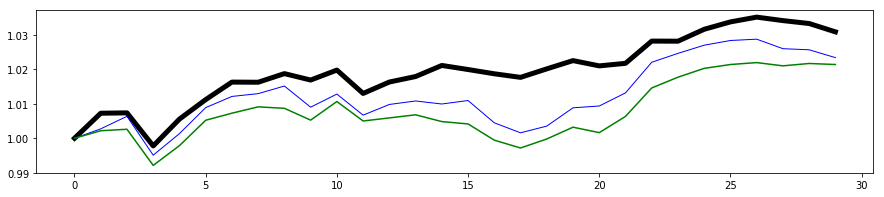

2016-04-21 00:00:00 2017-04-18 00:00:00
2017-04-20 00:00:00 2017-06-01 00:00:00
['GLD', 'TLT', 'KR', 'EVRG', 'HUM', 'MET', 'NBL', 'CHD', 'CBOE', 'SIVB']


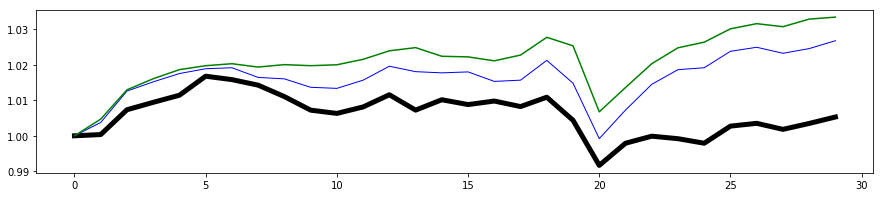

2016-05-19 00:00:00 2017-05-16 00:00:00
2017-05-18 00:00:00 2017-06-29 00:00:00
['GLD', 'KR', 'TLT', 'EVRG', 'HUM', 'MET', 'NBL', 'CHD', 'AMD', 'ESS']


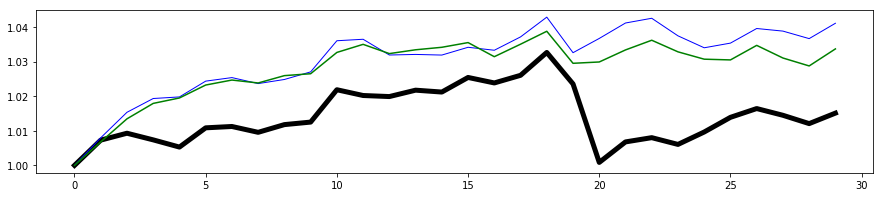

2016-06-17 00:00:00 2017-06-14 00:00:00
2017-06-16 00:00:00 2017-07-28 00:00:00
['TLT', 'KR', 'GLD', 'EVRG', 'HUM', 'NBL', 'MET', 'SIVB', 'CRM', 'EXR']


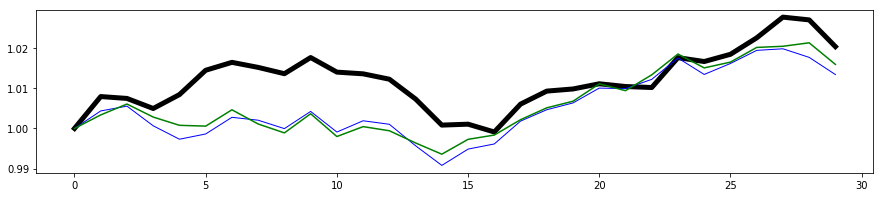

2016-07-18 00:00:00 2017-07-13 00:00:00
2017-07-17 00:00:00 2017-08-25 00:00:00
['TLT', 'GLD', 'KR', 'EVRG', 'MET', 'HUM', 'NBL', 'CRM', 'AMD', 'ALXN']


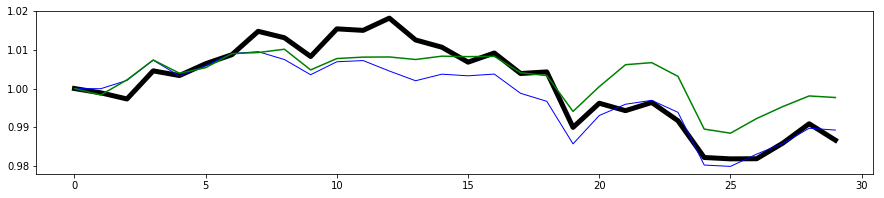

2016-08-15 00:00:00 2017-08-10 00:00:00
2017-08-14 00:00:00 2017-09-25 00:00:00
['TLT', 'GLD', 'KR', 'HUM', 'MET', 'EVRG', 'NBL', 'CMG', 'MYL', 'RE']


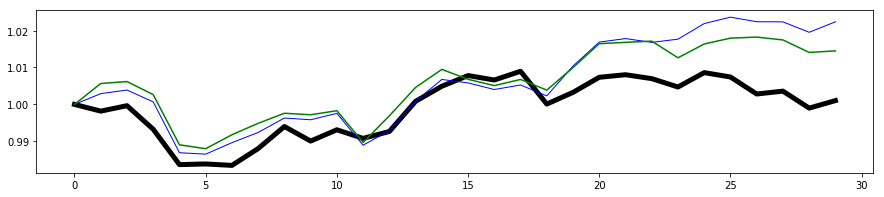

2016-09-13 00:00:00 2017-09-08 00:00:00
2017-09-12 00:00:00 2017-10-23 00:00:00
['TLT', 'GLD', 'KR', 'EVRG', 'NBL', 'USO', 'CMG', 'PGR', 'MYL', 'ADI']


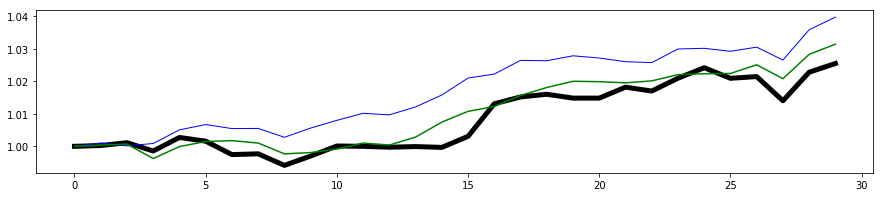

2016-10-11 00:00:00 2017-10-06 00:00:00
2017-10-10 00:00:00 2017-11-20 00:00:00
['TLT', 'GLD', 'NBL', 'MYL', 'KR', 'PGR', 'TRIP', 'USO', 'HII', 'CMG']


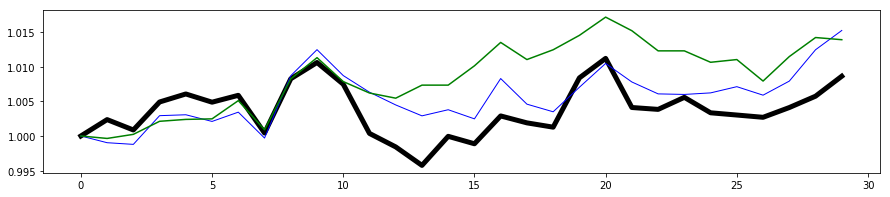

2016-11-08 00:00:00 2017-11-03 00:00:00
2017-11-07 00:00:00 2017-12-19 00:00:00
['TLT', 'GLD', 'USO', 'MYL', 'PGR', 'CMG', 'MCD', 'MO', 'RF', 'TRIP']


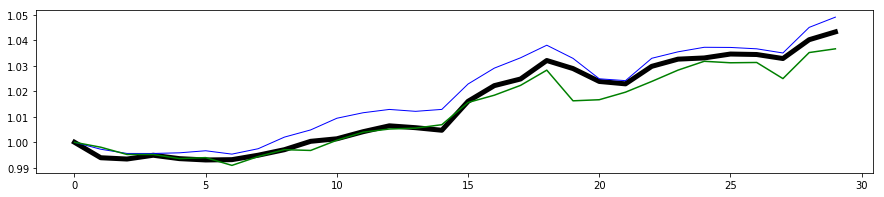

2016-12-07 00:00:00 2017-12-04 00:00:00
2017-12-06 00:00:00 2018-01-19 00:00:00
['TLT', 'CHD', 'MYL', 'USO', 'RF', 'MCD', 'TRIP', 'PGR', 'AMD', 'NBL']


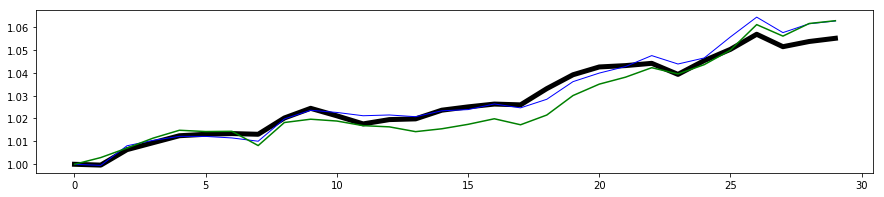

2017-01-06 00:00:00 2018-01-03 00:00:00
2018-01-05 00:00:00 2018-02-16 00:00:00
['TLT', 'RF', 'MYL', 'ADI', 'AMD', 'USO', 'TRIP', 'GLD', 'CHD', 'MO']


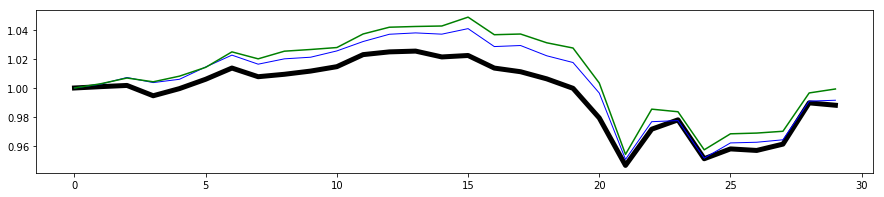

2017-02-06 00:00:00 2018-02-01 00:00:00
2018-02-05 00:00:00 2018-03-19 00:00:00
['TLT', 'TWTR', 'RF', 'SBAC', 'GLD', 'SO', 'KIM', 'REGN', 'MYL', 'KO']


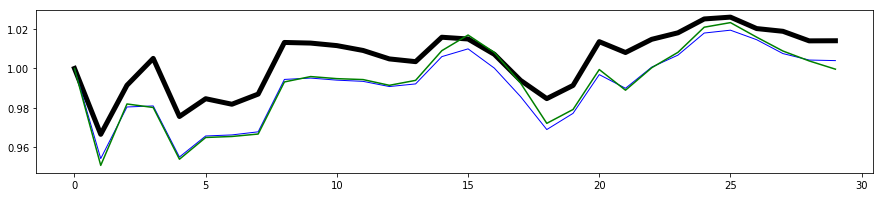

2017-03-07 00:00:00 2018-03-02 00:00:00
2018-03-06 00:00:00 2018-04-17 00:00:00
['TLT', 'CMG', 'CBOE', 'USO', 'MKTX', 'K', 'REGN', 'WYNN', 'ULTA', 'EIX']


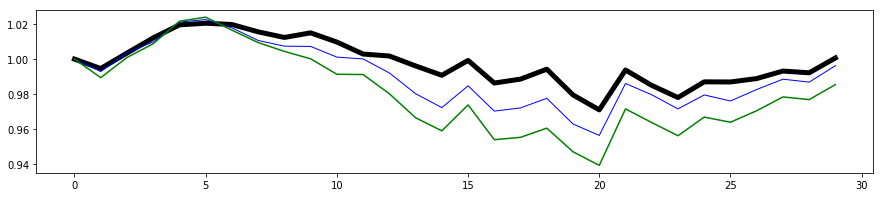

2017-04-04 00:00:00 2018-04-02 00:00:00
2018-04-04 00:00:00 2018-05-15 00:00:00
['TLT', 'EIX', 'USO', 'CBOE', 'CMG', 'REGN', 'MKTX', 'GPS', 'TWTR', 'GLD']


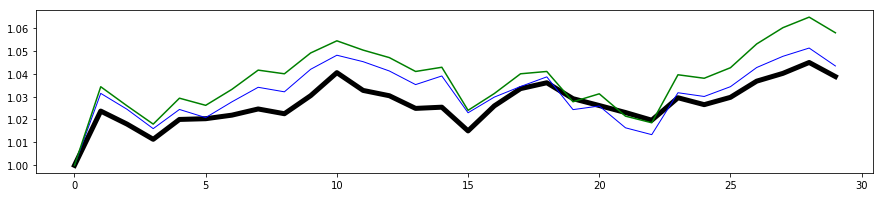

2017-05-03 00:00:00 2018-04-30 00:00:00
2018-05-02 00:00:00 2018-06-13 00:00:00
['TLT', 'GLD', 'EIX', 'RF', 'USO', 'TWTR', 'CBOE', 'RE', 'JBHT', 'WYNN']


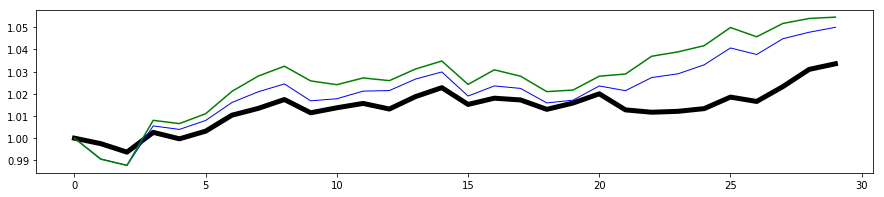

2017-06-01 00:00:00 2018-05-29 00:00:00
2018-05-31 00:00:00 2018-07-12 00:00:00
['TLT', 'EIX', 'CBOE', 'GLD', 'CMG', 'USO', 'RE', 'NKTR', 'RF', 'WYNN']


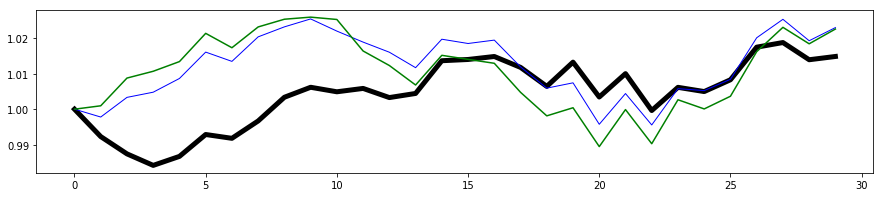

2017-06-29 00:00:00 2018-06-26 00:00:00
2018-06-28 00:00:00 2018-08-09 00:00:00
['TLT', 'AMCR', 'EIX', 'GLD', 'CBOE', 'NKTR', 'RE', 'ULTA', 'CMG', 'HRB']


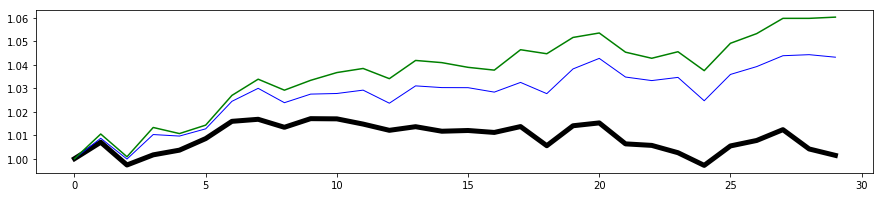

2017-07-28 00:00:00 2018-07-25 00:00:00
2018-07-27 00:00:00 2018-09-07 00:00:00
['TLT', 'GLD', 'EIX', 'CBOE', 'NKTR', 'WYNN', 'SO', 'RE', 'ULTA', 'MKTX']


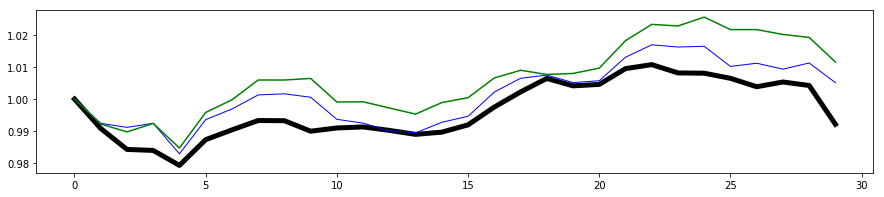

2017-08-25 00:00:00 2018-08-22 00:00:00
2018-08-24 00:00:00 2018-10-05 00:00:00
['TLT', 'GLD', 'EIX', 'CBOE', 'WYNN', 'RF', 'NKTR', 'CI', 'CMG', 'NOC']


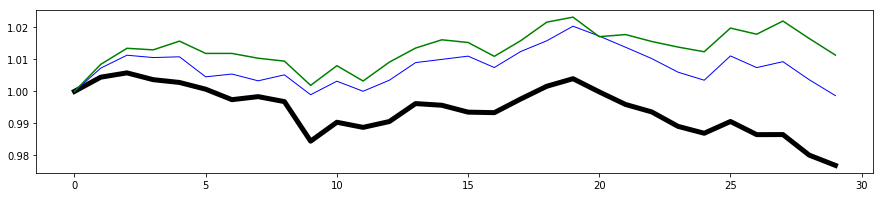

2017-09-25 00:00:00 2018-09-20 00:00:00
2018-09-24 00:00:00 2018-11-02 00:00:00
['TLT', 'GLD', 'EIX', 'NKTR', 'CI', 'CBOE', 'WYNN', 'SO', 'RF', 'ULTA']


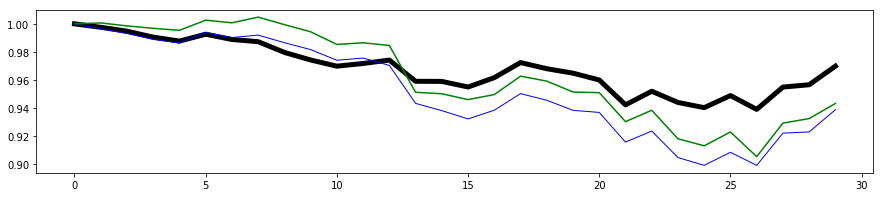

2017-10-23 00:00:00 2018-10-18 00:00:00
2018-10-22 00:00:00 2018-12-03 00:00:00
['TLT', 'GLD', 'EIX', 'CI', 'NKTR', 'CBOE', 'MKTX', 'SO', 'WYNN', 'RF']


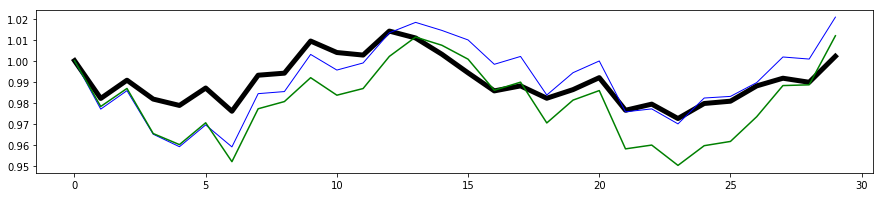

2017-11-20 00:00:00 2018-11-15 00:00:00
2018-11-19 00:00:00 2019-01-03 00:00:00
['TLT', 'GLD', 'EIX', 'ULTA', 'MKTX', 'NKTR', 'CBOE', 'USO', 'RF', 'SO']


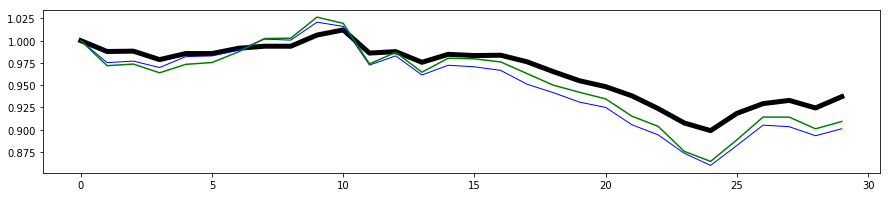

2017-12-19 00:00:00 2018-12-17 00:00:00
2018-12-19 00:00:00 2019-02-01 00:00:00
['TLT', 'GLD', 'MKTX', 'NKTR', 'RF', 'ULTA', 'HAS', 'EIX', 'USO', 'XEL']


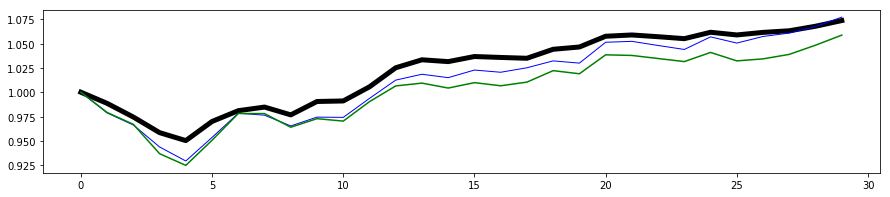

2018-01-19 00:00:00 2019-01-16 00:00:00
2019-01-18 00:00:00 2019-03-04 00:00:00
['TLT', 'GLD', 'RF', 'HAS', 'MKTX', 'NKTR', 'UHS', 'CBOE', 'NEM', 'ULTA']


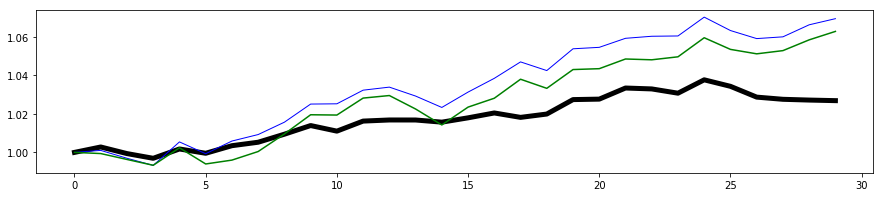

2018-02-16 00:00:00 2019-02-14 00:00:00
2019-02-19 00:00:00 2019-04-01 00:00:00
['TLT', 'AMCR', 'GLD', 'RF', 'NEM', 'CBOE', 'MKTX', 'HAS', 'NKTR', 'MO']


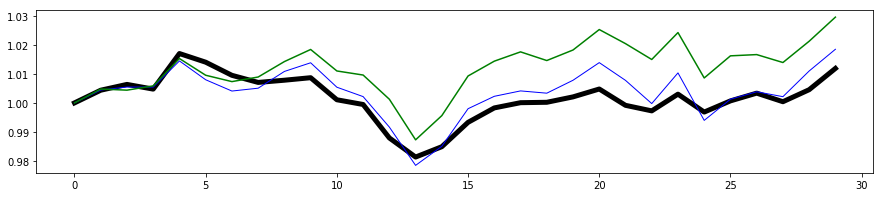

2018-03-19 00:00:00 2019-03-15 00:00:00
2019-03-19 00:00:00 2019-04-30 00:00:00
['TLT', 'GLD', 'RF', 'HAS', 'CME', 'NEM', 'D', 'KR', 'UHS', 'MO']


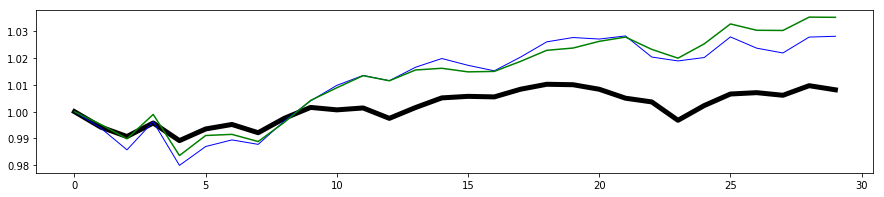

2018-04-17 00:00:00 2019-04-12 00:00:00
2019-04-16 00:00:00 2019-05-29 00:00:00
['TLT', 'GLD', 'CME', 'RF', 'NEM', 'HAS', 'KR', 'AAL', 'XRAY', 'NI']


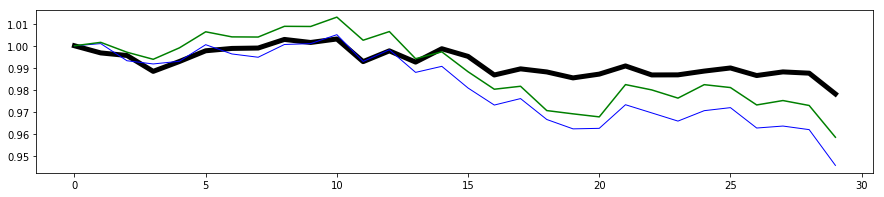

2018-05-15 00:00:00 2019-05-13 00:00:00
2019-05-15 00:00:00 2019-06-26 00:00:00
['TLT', 'GLD', 'NEM', 'CME', 'HAS', 'BHGE', 'HBAN', 'KR', 'KMB', 'MKTX']


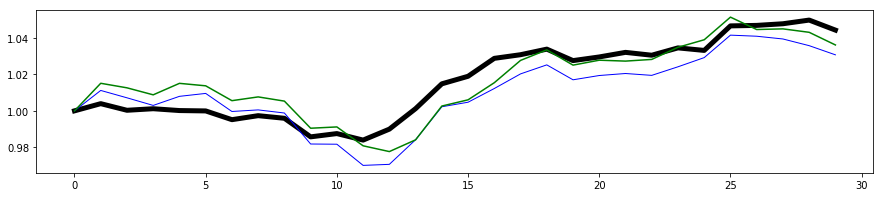

2018-06-13 00:00:00 2019-06-11 00:00:00
2019-06-13 00:00:00 2019-07-25 00:00:00
['TLT', 'AMCR', 'GLD', 'CME', 'KSS', 'NEM', 'KR', 'USO', 'HBAN', 'BHGE']


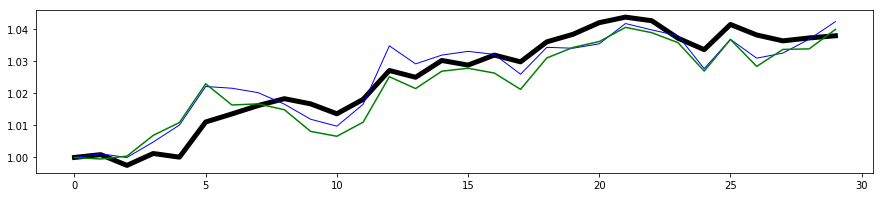

2018-07-12 00:00:00 2019-07-10 00:00:00
2019-07-12 00:00:00 2019-08-22 00:00:00
['TLT', 'BHGE', 'GLD', 'NEM', 'USO', 'CME', 'KSS', 'KR', 'LW', 'KMB']


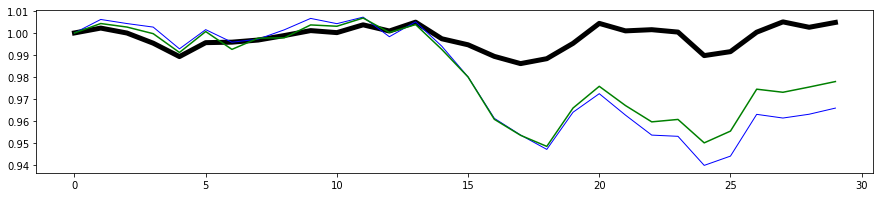

2018-08-09 00:00:00 2019-08-07 00:00:00
2019-08-09 00:00:00 2019-09-20 00:00:00
['TLT', 'USO', 'NEM', 'KSS', 'HBAN', 'LW', 'GLD', 'BHGE', 'HAS', 'KR']


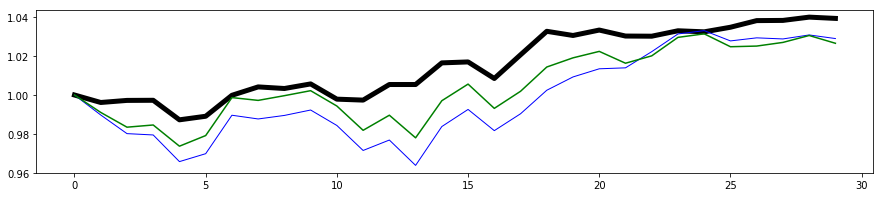

2018-09-07 00:00:00 2019-09-05 00:00:00
2019-09-09 00:00:00 2019-10-18 00:00:00
['TLT', 'USO', 'HBAN', 'NEM', 'GLD', 'HAS', 'BHGE', 'LW', 'KSS', 'MKTX']


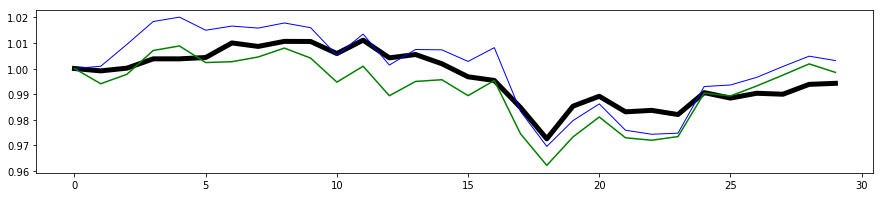

2018-10-05 00:00:00 2019-10-03 00:00:00
2019-10-07 00:00:00 2019-10-30 00:00:00
['TLT', 'USO', 'NEM', 'KR', 'HAS', 'GLD', 'BHGE', 'LW', 'ETR', 'HBAN']


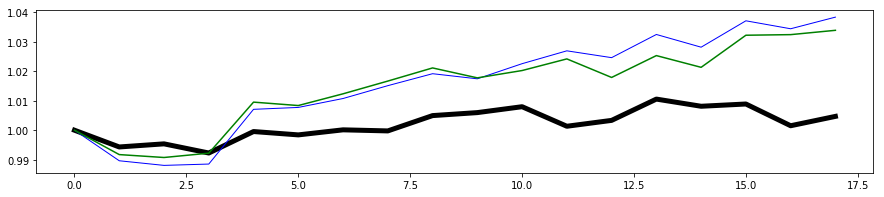

2018-11-02 00:00:00 2019-10-30 00:00:00


IndexError: index 0 is out of bounds for axis 0 with size 0

In [15]:
for i in range(300):
    end = i*20+250
    show = end+1
    
    data = pickle.load(open( "data2007.pickle", "rb" ))[max(0,end-250):end]
    print(data.index[0],data.index[-1])
    data = data # subset
    data = data.clip(upper=.05) # bounding single day gain
    data = data.clip(lower=-.05) # bounding single day loss
    data = data.replace([np.inf, -np.inf], np.nan) # removing any inf value
    data = data.dropna(axis='columns') # dropping any columns with nan

    ######

    for x in list(data): # removing columns without starting data
        if data.iloc[0][x] == 0 and data.iloc[1][x] == 0  and data.iloc[1][x] == 0:
            data = data.drop(x,axis=1)

    ########        

    roll = data + 1

    ########

    tickers = list(roll)

    # applying fixvar to all stocks
    rollvar = pd.DataFrame()
    for x in tickers:
        rollvar[x] = fixvar(list(roll[x]))

    ########

    A = np.array(rollvar)
    A[np.isnan(A)]=1
    b = np.array([len(A[0]) for i in range(len(rollvar))])

    vals = np.array(scipy.optimize.nnls(A, b)[0])
    v = [x/len(list(roll)) for x in np.dot(A,vals)]

    ########

    weights = pd.DataFrame()
    weights['Stock'] = list(rollvar)
    weights['Weight'] = vals
    weights = weights.sort_values(by='Weight',ascending=False)

    weights = weights[weights['Weight'] > 0]
    
    ########

    test = pickle.load(open( "data2007_real.pickle", "rb" ))[show:show+30]
    print(test.index[0],test.index[-1])
    test = test.replace(0, np.nan)
    test = test.replace([np.inf, -np.inf], np.nan)
    test = test.dropna(axis='columns')
    dfm = test.apply(lambda x: x/list(x)[0], axis=0)

    ########

    portfolio = pd.DataFrame()
    for i in range(len(weights)):
        try:
            portfolio[weights.iloc[i]['Stock']] = [weights.iloc[i]['Weight']*x for x in dfm[weights.iloc[i]['Stock']]]
        except:
            pass
    portfolio = portfolio.dropna(axis=0)

    dfm = dfm.clip(upper=5)
    dfm = dfm.clip(lower=.2)
    evaluation = portfolio.sum(axis=1)
    evaluation = [x/evaluation[0] for x in evaluation]

    plt.figure(figsize=(15,3))
    plt.plot(evaluation,linewidth=5,color='black')
    plt.plot(list(dfm.mean(axis=1)),color='blue',linewidth=1)
    plt.plot(list(dfm['SPY']),color='g')
    print(list(weights['Stock'][:10]))
    plt.show()
    